<h1 align="center">Phase 1: Initial Data Cleaning</h1>  
<h3 align="center"> Basic data cleaning before eda</h3>  
<h3 align="center">Fixing column names, handling duplicate records</h3>  

In [1]:
# import requried libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('../data/data.csv')
df_copy = df.copy()

df_copy.head()

,Company Name,Company Rating,Job Title,Location,Description,Salary Range,Median Salary
0,Optum,3.5,Senior Data Scientist,Noida,Optum is a global organization that delivers c...,₹2L – ₹9L/yr (Glassdoor Est.),₹4L/yr Median
1,Optum,3.5,Senior Data Scientist - AIML,Gurgaon,Optum is a global organization that delivers c...,₹2L – ₹9L/yr (Glassdoor Est.),₹4L/yr Median
2,Optum,3.5,Director AI/ML Engineer,Bengaluru,Optum is a global organization that delivers c...,₹3L – ₹7L/yr (Glassdoor Est.),₹5L/yr Median
3,BP Energy,3.9,Data Scientist Manager,Pune,Entity:\nFinance\n\nJob Family Group:\nSubsurf...,₹7L – ₹9L/yr (Glassdoor Est.),₹8L/yr Median
4,Zelis,3.7,Data Science Engineer / Healthcare Data Analyst,Hyderābād,About Us\nZelis is modernizing the healthcare ...,₹2L – ₹7L/yr (Glassdoor Est.),₹3L/yr Median


## Target variable and independent variables

In [5]:
for col in df_copy.columns:
    print(col)

Company Name
Company Rating
Job Title
Location
Description
Salary Range
Median Salary


#### Target variable: 

- Salary Range column contains the range of salary i.e minimum and maximum salary of the job posting. 
- Median Salary column contains only the median/average salary of the job posting. 
- Therefore we cannot use Salary Range column as a target varible.
- We can either use Median Salary column as a target variable or create an average/Median salary for each job postings using the Salary Range column (bycalculating the average from Salary Range column).


#### Independent variables:
- Company_Rating, Location, Job_title columns can be used as independent varibles.
- During data transformaton and preprocessing phase we can explore on creating new features from the available information of Description, Job title, Location columns. 

## 1. Data Overview

In [8]:
df_copy.shape

(835, 7)

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company Name    835 non-null    object 
 1   Company Rating  717 non-null    float64
 2   Job Title       835 non-null    object 
 3   Location        835 non-null    object 
 4   Description     834 non-null    object 
 5   Salary Range    601 non-null    object 
 6   Median Salary   517 non-null    object 
dtypes: float64(1), object(6)
memory usage: 45.8+ KB


- Our dataset contains 834 rows and 7 columns which is relatively a small dataset, therefore we cannot afford to remove any rows from the dataset.
- Out of the 7 columnes only one column is numerical i.e Company Rating and the rest are categorical columns which tells us intensive data preprocessing is required. 
- Null values are found in Company Rating, Description, Salary Range, Median Salary, columns we cannot drop the null values therefore we have to find a strategic way to impute the null values. 
- Salary Range, Median Salary columns require preprocessing as the data type should be numerical. 

In [11]:
df_copy['Company Rating'].describe()

count    717.000000
mean       3.887169
std        0.486353
min        1.000000
25%        3.600000
50%        3.900000
75%        4.200000
max        5.000000
Name: Company Rating, dtype: float64

In [12]:
df_copy.nunique()

Company Name      579
Company Rating     28
Job Title         372
Location           40
Description       753
Salary Range      155
Median Salary      57
dtype: int64

## 2. Fixing columns names

In [14]:
df_copy.columns

Index(['Company Name', 'Company Rating', 'Job Title', 'Location',
       'Description', 'Salary Range', 'Median Salary'],
      dtype='object')

In [15]:
df_copy = df_copy.rename(columns={'Company Name': 'Company_Name',
                          'Company Rating': 'Company_Rating',
                          'Job Title': 'Job_Title',
                          'Salary Range': 'Salary_Range',
                          'Median Salary': 'Median_Salary'})

In [16]:
df_copy.columns

Index(['Company_Name', 'Company_Rating', 'Job_Title', 'Location',
       'Description', 'Salary_Range', 'Median_Salary'],
      dtype='object')

## 2. Handling Duplicate records

In [18]:
df_copy_dupli = df_copy[df_copy.duplicated(keep='first')]
df_copy_dupli = df_copy_dupli.sort_values(by=df_copy.columns.tolist())

In [19]:
df_copy_dupli.shape

(60, 7)

In [20]:
df_copy_dupli[:10]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
212,BP Energy,3.9,Data Scientist Manager,Pune,Entity:\nFinance\n\nJob Family Group:\nSubsurf...,₹7L – ₹9L/yr (Glassdoor Est.),₹8L/yr Median
90,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Gurgaon,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
240,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Gurgaon,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
360,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Gurgaon,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
421,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Gurgaon,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
541,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Gurgaon,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
633,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Gurgaon,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
153,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Mumbai,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
274,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Mumbai,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
332,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Mumbai,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN


- There are totally 60 duplicates and all 60 are **Exact Duplicate**.
- **Exact Duplcates** are those duplicate rows where the values are exactly the same in all of the 7 columns.
- Since our project is a regression problem and regression algorithms are prone to bias therefore its best to remove the duplicates, as duplicates (especially exact duplicates) leads to overfitting / bias.  

In [22]:
def remove_duplicates(df):
    print(f"Before removing duplicate rows: {df.shape}")
    df.drop_duplicates(subset=None, keep='first', inplace=True)   # removing duplicate rows except the first occurrence 
    print(f"After removing duplicate rows: {df.shape}") 

In [23]:
remove_duplicates(df_copy)

Before removing duplicate rows: (835, 7)
After removing duplicate rows: (775, 7)


<h1 align="center">Phase 2: Light EDA</h1>  
<h3 align="center"> Understanding the data before advanced data cleaning</h3>  

# 1. Company Name

In [26]:
df_copy.head()

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
0,Optum,3.5,Senior Data Scientist,Noida,Optum is a global organization that delivers c...,₹2L – ₹9L/yr (Glassdoor Est.),₹4L/yr Median
1,Optum,3.5,Senior Data Scientist - AIML,Gurgaon,Optum is a global organization that delivers c...,₹2L – ₹9L/yr (Glassdoor Est.),₹4L/yr Median
2,Optum,3.5,Director AI/ML Engineer,Bengaluru,Optum is a global organization that delivers c...,₹3L – ₹7L/yr (Glassdoor Est.),₹5L/yr Median
3,BP Energy,3.9,Data Scientist Manager,Pune,Entity:\nFinance\n\nJob Family Group:\nSubsurf...,₹7L – ₹9L/yr (Glassdoor Est.),₹8L/yr Median
4,Zelis,3.7,Data Science Engineer / Healthcare Data Analyst,Hyderābād,About Us\nZelis is modernizing the healthcare ...,₹2L – ₹7L/yr (Glassdoor Est.),₹3L/yr Median


In [27]:
df_copy['Company_Name'].nunique()

579

In [28]:
df_copy['Company_Name'].value_counts().sort_values(ascending=False).head(25)

Company_Name
Boston Consulting Group               9
Optum                                 8
Microsoft                             7
Maruti Suzuki India Ltd               7
LSEG (London Stock Exchange Group)    6
EY                                    5
Amazon.com                            5
Apple                                 4
Kinaxis Inc.                          4
Barclays                              4
Mastercard                            4
Accenture                             4
Citi                                  4
Michelin                              4
Natwest                               4
JPMorganChase                         4
Analytics Vidhya                      4
Optimspace                            3
Hitachi Solutions                     3
KPMG                                  3
Rockwell Automation                   3
Brillio                               3
Kraft Heinz Company                   3
SigTuple Technologies                 3
Bosch Group                

- There are 579 unique company names in the dataset.
- Since the objective is to predict the salary for data science roles, company name feature may not significantly contribute to the model's predictive powers.
- Therefore we can drop this column. 

# 2. Company rating

In [31]:
df_copy['Company_Rating'].describe()

count    657.000000
mean       3.879756
std        0.499391
min        1.000000
25%        3.600000
50%        3.900000
75%        4.100000
max        5.000000
Name: Company_Rating, dtype: float64

In [32]:
df_copy['Company_Rating'].mode()

0    3.8
Name: Company_Rating, dtype: float64

In [33]:
df_copy['Company_Rating'].var()

0.24939140401677992

In [34]:
df_copy['Company_Rating'].std()

0.49939103317618744

In [35]:
df_copy['Company_Rating'].value_counts().sort_index(ascending=False)

Company_Rating
5.0    19
4.9     3
4.8     5
4.7    11
4.6     6
4.5    16
4.4    16
4.3    30
4.2    51
4.1    73
4.0    62
3.9    51
3.8    82
3.7    63
3.6    51
3.5    33
3.4    34
3.3    12
3.2     7
3.1     8
3.0     5
2.9     6
2.8     2
2.7     2
2.6     2
2.3     1
2.1     1
1.0     5
Name: count, dtype: int64

Text(0.5, 0, 'Company Rating')

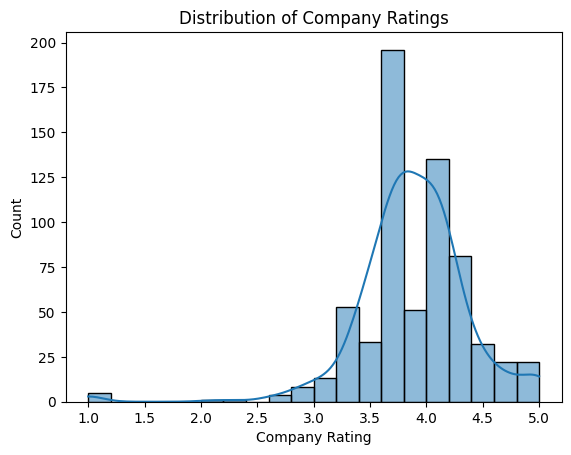

In [36]:
sns.histplot(df_copy['Company_Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Company Ratings')
plt.xlabel('Company Rating')

<Axes: xlabel='Company_Rating'>

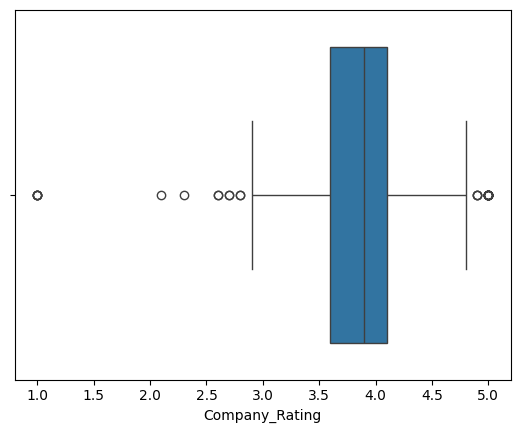

In [37]:
sns.boxplot(x=df_copy['Company_Rating'])

In [38]:
df_copy['Company_Rating'].isnull().sum()

118

In [39]:
df_copy[df_copy['Company_Rating'].isnull()][:10]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
8,Optimspace,NaN,Data Analyst Intern,Remote,Data Analyst Intern (Remote) – Optimspace\nAbo...,NaN,NaN
9,Vcars auto private limited,NaN,Data Scientist Intern,Chennai,Data Collection and Preparation:\nInterns help...,₹6L – ₹19L/yr (Employer provided),₹12L/yr Median
10,Optimspace,NaN,Data Science Intern,Remote,Data Science Intern (Remote) – Optimspace\nAbo...,NaN,NaN
13,Predigle-An Esper Group Company,NaN,Data Scientist,Remote,"As part of our new AI team, you will have the ...",₹5L – ₹10L/yr (Employer provided),₹8L/yr Median
22,Optimspace,NaN,Machine Learning intern,Remote,Machine Learning Intern (Remote) – Optimspace\...,NaN,NaN
28,Phenomenal HR,NaN,Data Scientist,Remote,We’re looking for a hands-on Data Scientist or...,₹6L – ₹12L/yr (Employer provided),₹9L/yr Median
45,Digitalxc.com,NaN,Data Analysts,Bengaluru,Job Description: Data Analyst role\nPosition O...,₹6L – ₹15L/yr (Employer provided),₹11L/yr Median
49,Aligned Automation,NaN,Data Scientist,India,"Key Responsibilities:\nBuild, train, and valid...",₹8L – ₹30L/yr (Employer provided),₹19L/yr Median
57,Infolexus Solutions,NaN,Data Scientist,India,We are seeking a highly motivated and analytic...,₹4L – ₹10L/yr (Employer provided),₹7L/yr Median
58,DIATOZ Solutions,NaN,Junior Data Scientist,Gurgaon,We are seeking a highly motivated Junior Data ...,₹60K – ₹1L/mo (Employer provided),₹80K/mo Median


- Overview of company rating:
    - The mean company rating is 3.8 and the median is 3.9 and the mode is 3.8.
    - So the average company rating across all companies is 3.8 out of 5, suggesting that most companies are rated moderately well. 

- Distribution of company rating:
    - The minimum/lowest company rating is 1.0 and the maximum/highest company rating is 5.0. 
    - The variance of 0.24 is relatively low, which means that most of the data points are close to the mean, there is less variability in company rating column 
    - The standard deviation of company rating is 0.49 which is again relatively low, this confirms -most ratings are close to the mean. Most company ratings fall within ±0.5 of the average rating of 3.8 — so between 3.3 and 4.3.

# 3. Job title

In [42]:
df_copy['Job_Title'].nunique()

372

## Different types of job titles 
1. Intern
2. Data Analyst
3. Data Scientist

In [44]:
df_copy_intern = df_copy[df_copy['Job_Title'].str.contains('Intern', case=False)]
print(df_copy_intern.shape)
df_copy_intern.head(10)

(41, 7)


,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
8,Optimspace,NaN,Data Analyst Intern,Remote,Data Analyst Intern (Remote) – Optimspace\nAbo...,NaN,NaN
9,Vcars auto private limited,NaN,Data Scientist Intern,Chennai,Data Collection and Preparation:\nInterns help...,₹6L – ₹19L/yr (Employer provided),₹12L/yr Median
10,Optimspace,NaN,Data Science Intern,Remote,Data Science Intern (Remote) – Optimspace\nAbo...,NaN,NaN
18,TECACS IT GROUP PVT LTD,5.0,Internships in AI & Data Science,Cochin,An internship in Artificial Intelligence (AI) ...,NaN,NaN
22,Optimspace,NaN,Machine Learning intern,Remote,Machine Learning Intern (Remote) – Optimspace\...,NaN,NaN
24,Hypersonix,4.8,Data Science - Intern,Remote,"About Us\nJoin Hypersonix, the premier AI-driv...",NaN,NaN
42,Amazon.com,3.6,"Applied Scientist I, International Machine Lea...",Gurgaon,DESCRIPTION\nAmazon is looking for a passionat...,₹3L/yr (Glassdoor Est.),NaN
70,Augusta Hitech Soft Solutions,NaN,Intern Data Scientist,Coimbatore,Industry: IT\nQualification: PhD\nRequired Ski...,NaN,NaN
81,Beckman Coulter Life Sciences,3.4,Data Science - Intern,Bengaluru,Bring more to life.\nAre you ready to accelera...,NaN,NaN
98,Houlihan Lokey,4.0,Data Science Intern,Mumbai,Business Unit:\nFinancial and Valuation Adviso...,NaN,NaN


In [45]:
df_copy_DA = df_copy[
    df_copy['Job_Title'].str.contains('Data Analyst', case=False) & 
    ~df_copy['Job_Title'].str.contains('Intern', case=False)
]
print(df_copy_DA.shape)
df_copy_DA.head(10)

(16, 7)


,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
4,Zelis,3.7,Data Science Engineer / Healthcare Data Analyst,Hyderābād,About Us\nZelis is modernizing the healthcare ...,₹2L – ₹7L/yr (Glassdoor Est.),₹3L/yr Median
45,Digitalxc.com,NaN,Data Analysts,Bengaluru,Job Description: Data Analyst role\nPosition O...,₹6L – ₹15L/yr (Employer provided),₹11L/yr Median
67,Tecvesten Consulting,NaN,Data Scientist / Data Analyst / BI,India,"About Us\nTecvesten Consulting, a collective y...",NaN,NaN
208,Virtusa,3.7,Brand Analytics – Data Analyst,Chennai,You will develop a deep understanding of inter...,₹4L – ₹6L/yr (Glassdoor Est.),₹5L/yr Median
226,Splashgain,3.7,Data Scientist/ Data Analyst,Gujarat,Working Experience: 0 to 5 Years\nAny candidat...,NaN,NaN
237,Indium Software,4.0,Data Scientist/Data Engineer/Data Analyst,Chennai,Job Information\nDate Opened\n04/10/2025\nJob ...,₹5L – ₹8L/yr (Glassdoor Est.),₹6L/yr Median
278,MidTown Software,5.0,DATA ANALYST/ SCIENTIST,Mohali,"Our new Data Analyst will help us grow, engage...",₹2L – ₹6L/yr (Glassdoor Est.),₹3L/yr Median
284,JSG Consulting,NaN,Data Analyst,Bengaluru,Overview\nWe are seeking a skilled and analyti...,₹95K – ₹98K/mo (Employer provided),₹97K/mo Median
319,coolboots,2.6,Junior Data Analyst (F),Gurgaon,Job Title: Junior Data Analyst -DOOH and CTV A...,₹3L – ₹8L/yr (Glassdoor Est.),₹5L/yr Median
326,Infolexus Solutions,NaN,Data Analyst,India,Job Description:\nWe are seeking a highly moti...,₹20K – ₹40K/mo (Employer provided),₹30K/mo Median


In [46]:
df_copy_DS = df_copy[
    df_copy['Job_Title'].str.contains('Data Scientist', case=False) & 
    ~df_copy['Job_Title'].str.contains('Intern', case=False)
]
print(df_copy_DS.shape)
df_copy_DS.head(10)

(564, 7)


,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
0,Optum,3.5,Senior Data Scientist,Noida,Optum is a global organization that delivers c...,₹2L – ₹9L/yr (Glassdoor Est.),₹4L/yr Median
1,Optum,3.5,Senior Data Scientist - AIML,Gurgaon,Optum is a global organization that delivers c...,₹2L – ₹9L/yr (Glassdoor Est.),₹4L/yr Median
3,BP Energy,3.9,Data Scientist Manager,Pune,Entity:\nFinance\n\nJob Family Group:\nSubsurf...,₹7L – ₹9L/yr (Glassdoor Est.),₹8L/yr Median
11,Ericsson,4.0,Data Scientist - Gen AI,Chennai,Join our Team\nAbout this opportunity:\nWe are...,₹4L – ₹9L/yr (Glassdoor Est.),₹6L/yr Median
12,PayPal,3.7,Data Scientist,Chennai,The Company\nPayPal has been revolutionizing c...,NaN,NaN
13,Predigle-An Esper Group Company,NaN,Data Scientist,Remote,"As part of our new AI team, you will have the ...",₹5L – ₹10L/yr (Employer provided),₹8L/yr Median
14,QuantumBricks,4.7,Data Scientist with Machine Learning specializ...,Remote,"Key Responsibilities:\nDesign, develop, and de...",₹8L – ₹18L/yr (Employer provided),₹13L/yr Median
15,Maruti Suzuki India Ltd,3.8,DATA SCIENTIST,Gurgaon,About the Company:\nMaruti Suzuki India Limite...,₹3L – ₹10L/yr (Glassdoor Est.),₹6L/yr Median
16,"Arch Systems, LLC",4.2,Data Scientist/ Data Specialist,Remote,Role: Senior Data Scientist / Data Specialist\...,₹1.20K – ₹2.00K/hr (Employer provided),₹1.60K/hr Median
17,Intellion Technologies Pvt Ltd,5.0,Part-Time Freelance Data Scientist (Remote),Remote,Job Title: Part-Time Freelance Data Scientist ...,₹25K – ₹30K/mo (Employer provided),₹28K/mo Median


## Seniority Levels
1. Junior
2. Senior

In [48]:
df_copy_Ju = df_copy[df_copy['Job_Title'].str.contains('Junior', case=False)]
print(df_copy_Ju.shape)
df_copy_Ju.head(10)

(17, 7)


,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
19,Cravita Technologies India,4.1,Junior Data Scientist,India,Strong proficiency in programming languages su...,NaN,NaN
20,LSEG (London Stock Exchange Group),3.7,Junior Data Scientist,Bengaluru,We are looking for a skilled Data Scientist to...,₹10L/yr (Glassdoor Est.),NaN
58,DIATOZ Solutions,NaN,Junior Data Scientist,Gurgaon,We are seeking a highly motivated Junior Data ...,₹60K – ₹1L/mo (Employer provided),₹80K/mo Median
66,Marktine Technology Solutions,4.2,Junior Data Scientist,Jaipur,Job Information\nDate Opened\n07/12/2024\nJob ...,₹3L – ₹5L/yr (Glassdoor Est.),₹4L/yr Median
140,Global scientific company,NaN,Junior Machine Learning Engineer,India,"Chennai location only, tamil candidates\nFresh...",NaN,NaN
163,Imurgence,4.0,Junior Data Science Team Member,India,Duties & Responsibilities:\n1. Work closely wi...,NaN,NaN
181,DAZN,2.9,Junior Data Scientist,Hyderābād,Description\n\nWe are seeking a passionate and...,NaN,NaN
183,DAZN,NaN,Junior Data Scientist,Hyderābād,Description\n\nWe are seeking a passionate and...,₹6L – ₹9L/yr (Glassdoor Est.),₹7L/yr Median
189,CIS,1.0,Junior Data Scientist,Indore,Department\nArtificial Intelligence Jobs - AI ...,₹2L – ₹10L/yr (Glassdoor Est.),₹4L/yr Median
265,Sri Sathya Sai Sanjeevani Hospital,3.4,Junior Data Scientist,India,Qualification: M.Sc/ MTech in any Biological S...,NaN,NaN


In [49]:
df_copy_Si = df_copy[df_copy['Job_Title'].str.contains('Senior', case=False)]
print(df_copy_Si.shape)
df_copy_Si.head(10)

(105, 7)


,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
0,Optum,3.5,Senior Data Scientist,Noida,Optum is a global organization that delivers c...,₹2L – ₹9L/yr (Glassdoor Est.),₹4L/yr Median
1,Optum,3.5,Senior Data Scientist - AIML,Gurgaon,Optum is a global organization that delivers c...,₹2L – ₹9L/yr (Glassdoor Est.),₹4L/yr Median
6,Boston Consulting Group,4.2,Global Cybersecurity Senior Manager - AI Archi...,Gurgaon,Who We Are\nBoston Consulting Group partners w...,₹6L – ₹8L/yr (Glassdoor Est.),₹7L/yr Median
7,Kinaxis Inc.,4.1,"Senior Software Developer, Machine Learning",India,About Kinaxis:\nAbout Kinaxis\nElevate your ca...,NaN,NaN
33,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Gurgaon,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
34,Optum,3.5,Senior AI or ML Engineer,Bengaluru,Optum is a global organization that delivers c...,₹3L – ₹7L/yr (Glassdoor Est.),₹5L/yr Median
43,QuantumBricks,4.7,Senior Data Scientist,Remote,Job Summary:\nWe are seeking a highly motivate...,₹9L – ₹23L/yr (Employer provided),₹16L/yr Median
46,Mastercard,4.2,Senior Data Scientist,Gurgaon,Our Purpose\nMastercard powers economies and e...,₹2L/yr (Glassdoor Est.),NaN
63,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Mumbai,Locations: Mumbai | Gurgaon\n\nWho We Are\n\nB...,NaN,NaN
97,5x Data,4.8,Senior Data Scientist,Remote,"At 5X, we help companies organize their data a...",NaN,NaN


# 4. Location
- Location with highest number of job postings 
- Correlation between location and salary, does location of the company influence salary range?
- Correlation between location and rating of the company, does companies in better cities have high ratings?  

In [51]:
df_copy['Location'].nunique()

40

In [52]:
df_copy['Location'].value_counts().sort_values(ascending=False).head(25)

Location
Bengaluru             249
India                  85
Gurgaon                65
Chennai                63
Hyderābād              62
Pune                   58
Remote                 51
Mumbai                 28
Noida                  22
Ahmedabad              14
Delhi                   9
Cochin                  8
Mohali                  7
Coimbatore              7
Gujarat                 4
Karnataka               4
Indore                  4
Vadodara                4
Thiruvananthapuram      3
Navi Mumbai             3
Jamshedpur              2
Calcutta                2
Chandigarh              2
Bhubaneshwar            2
Kālkāji Devi            2
Name: count, dtype: int64

# 5. Description

In [54]:
df_copy['Description'].info()

<class 'pandas.core.series.Series'>
Index: 775 entries, 0 to 834
Series name: Description
Non-Null Count  Dtype 
--------------  ----- 
774 non-null    object
dtypes: object(1)
memory usage: 12.1+ KB


In [55]:
df_copy[df_copy['Description'].isnull()]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
721,Invokhr,4.0,Data Scientist- Chennai,Chennai,NaN,₹3L – ₹5L/yr (Glassdoor Est.),₹4L/yr Median


- Handling missing value in description column:
    - There is only one row with missing value in description column.
    - While the primary purpose of this column is to extract valuable insights (eg., skills, experience,), this particular row contains salary-related information which is crucial for our analysis.
    - Therefore removing this row is not a better decision given its importance. 

# 6. Salary range

In [58]:
df_copy['Salary_Range'].value_counts().sort_values(ascending=False).head(25)

Salary_Range
₹3L – ₹8L/yr (Glassdoor Est.)     31
₹4L – ₹8L/yr (Glassdoor Est.)     24
₹10L/yr (Glassdoor Est.)          21
₹4L – ₹10L/yr (Glassdoor Est.)    20
₹7L – ₹10L/yr (Glassdoor Est.)    18
₹3L – ₹5L/yr (Glassdoor Est.)     18
₹5L – ₹10L/yr (Glassdoor Est.)    17
₹5L – ₹8L/yr (Glassdoor Est.)     16
₹8L – ₹10L/yr (Glassdoor Est.)    15
₹7L – ₹9L/yr (Glassdoor Est.)     14
₹3L – ₹10L/yr (Glassdoor Est.)    13
₹5L – ₹9L/yr (Glassdoor Est.)     13
₹5L – ₹7L/yr (Glassdoor Est.)     12
₹6L – ₹7L/yr (Glassdoor Est.)     12
₹6L – ₹10L/yr (Glassdoor Est.)    11
₹2L – ₹8L/yr (Glassdoor Est.)     11
₹2L – ₹6L/yr (Glassdoor Est.)     10
₹2L – ₹9L/yr (Glassdoor Est.)     10
₹2L – ₹10L/yr (Glassdoor Est.)     9
₹3L – ₹6L/yr (Glassdoor Est.)      9
₹6L – ₹8L/yr (Glassdoor Est.)      9
₹1L – ₹10L/yr (Glassdoor Est.)     9
₹6L – ₹9L/yr (Glassdoor Est.)      9
₹4L – ₹9L/yr (Glassdoor Est.)      9
₹4L – ₹7L/yr (Glassdoor Est.)      8
Name: count, dtype: int64

In [59]:
df_copy[df_copy['Salary_Range'].isnull()][:5]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
7,Kinaxis Inc.,4.1,"Senior Software Developer, Machine Learning",India,About Kinaxis:\nAbout Kinaxis\nElevate your ca...,NaN,NaN
8,Optimspace,NaN,Data Analyst Intern,Remote,Data Analyst Intern (Remote) – Optimspace\nAbo...,NaN,NaN
10,Optimspace,NaN,Data Science Intern,Remote,Data Science Intern (Remote) – Optimspace\nAbo...,NaN,NaN
12,PayPal,3.7,Data Scientist,Chennai,The Company\nPayPal has been revolutionizing c...,NaN,NaN
18,TECACS IT GROUP PVT LTD,5.0,Internships in AI & Data Science,Cochin,An internship in Artificial Intelligence (AI) ...,NaN,NaN


# 7. Median Salary

In [61]:
df_copy['Median_Salary'].value_counts().sort_values(ascending=False).head(25)

Median_Salary
₹6L/yr Median     89
₹4L/yr Median     75
₹5L/yr Median     69
₹7L/yr Median     66
₹8L/yr Median     48
₹9L/yr Median     29
₹3L/yr Median     23
₹10L/yr Median     8
₹2L/yr Median      6
₹13L/yr Median     6
₹12L/yr Median     4
₹16L/yr Median     3
₹18L/yr Median     3
₹30K/mo Median     3
₹45K/mo Median     2
₹80K/mo Median     2
₹1L/mo Median      2
₹11L/yr Median     2
₹28L/yr Median     2
₹20K/mo Median     2
₹24L/yr Median     2
₹15L/yr Median     2
₹25L/yr Median     2
₹23K/mo Median     1
₹9K/mo Median      1
Name: count, dtype: int64

In [62]:
df_copy[df_copy['Median_Salary'].isnull()][:10]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
7,Kinaxis Inc.,4.1,"Senior Software Developer, Machine Learning",India,About Kinaxis:\nAbout Kinaxis\nElevate your ca...,NaN,NaN
8,Optimspace,NaN,Data Analyst Intern,Remote,Data Analyst Intern (Remote) – Optimspace\nAbo...,NaN,NaN
10,Optimspace,NaN,Data Science Intern,Remote,Data Science Intern (Remote) – Optimspace\nAbo...,NaN,NaN
12,PayPal,3.7,Data Scientist,Chennai,The Company\nPayPal has been revolutionizing c...,NaN,NaN
18,TECACS IT GROUP PVT LTD,5.0,Internships in AI & Data Science,Cochin,An internship in Artificial Intelligence (AI) ...,NaN,NaN
19,Cravita Technologies India,4.1,Junior Data Scientist,India,Strong proficiency in programming languages su...,NaN,NaN
20,LSEG (London Stock Exchange Group),3.7,Junior Data Scientist,Bengaluru,We are looking for a skilled Data Scientist to...,₹10L/yr (Glassdoor Est.),NaN
21,Sumeru,3.3,Data Scientist/Analyst,Remote,Job Title:- Data Scientist/Data Analyst\nJob L...,NaN,NaN
22,Optimspace,NaN,Machine Learning intern,Remote,Machine Learning Intern (Remote) – Optimspace\...,NaN,NaN
23,Immersive Infotech Pvt. Ltd,4.9,Data Scientist,Remote,Data Scientist (2–4 Years Exp) | AI & Optimiza...,₹12L/yr (Employer provided),NaN


In [63]:
df_copy[df_copy['Median_Salary'].isnull() & df_copy['Salary_Range'].notnull()][:10]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
20,LSEG (London Stock Exchange Group),3.7,Junior Data Scientist,Bengaluru,We are looking for a skilled Data Scientist to...,₹10L/yr (Glassdoor Est.),NaN
23,Immersive Infotech Pvt. Ltd,4.9,Data Scientist,Remote,Data Scientist (2–4 Years Exp) | AI & Optimiza...,₹12L/yr (Employer provided),NaN
42,Amazon.com,3.6,"Applied Scientist I, International Machine Lea...",Gurgaon,DESCRIPTION\nAmazon is looking for a passionat...,₹3L/yr (Glassdoor Est.),NaN
46,Mastercard,4.2,Senior Data Scientist,Gurgaon,Our Purpose\nMastercard powers economies and e...,₹2L/yr (Glassdoor Est.),NaN
47,Volvo Group,4.1,Specialist Data Scientist - TM,Bengaluru,Transport is at the core of modern society. Im...,₹10L/yr (Glassdoor Est.),NaN
54,Volvo Group,4.1,Excelher -Data Scientist,Bengaluru,Transport is at the core of modern society. Im...,₹10L/yr (Glassdoor Est.),NaN
62,Boston Consulting Group,4.2,Data Engineer - Global People Analytics,Gurgaon,Who We Are\nBoston Consulting Group partners w...,₹5L/yr (Glassdoor Est.),NaN
74,Futuremug,NaN,Data Scientist,Remote,Full-Time Experience - 3 - 5 Years Location: R...,₹60K/mo (Employer provided),NaN
89,Radioso Resources,NaN,"Data / ML Scientist (Clustering, Trends & Root...",Remote,Qualifications\n● 4 + years in data science or...,₹20L/yr (Employer provided),NaN
112,Visa,3.8,Data Scientist (BI Engineer),Bengaluru,Company Description\n\nVisa is a world leader ...,₹3L/yr (Glassdoor Est.),NaN


- Handling missing values in Median Salary column:
    - There are totally 291 missing values in the median salary column.
    - we can use salary related information present in Description and Salary Range columns to impute these missing values.
    - Or we can totally remove the Median Salary column and create a new feature by calculating the average from Salary Range column. By this way we can focus only on imputing the missing values in Salary Range column and create a new feature for Median Salary by calculating the average. 

<h1 align="center">Phase 3: Advanced Data Cleaning / Feature Engineering</h1>    
<h3 align="center">Handling missing values, parsing columns, removing unwanted characters, creating new features</h3>  

# 1. Handling Missing Values

In [67]:
df_copy.isnull().sum()

Company_Name        0
Company_Rating    118
Job_Title           0
Location            0
Description         1
Salary_Range      209
Median_Salary     291
dtype: int64

# Handle missing values in Company Rating
- Impute missing values in company rating column:
    - Since multiple job posting often exist for the same company, we can leverage this by imputing missing company ratings with the available rating of other job posting from the same company. 
    - By doing so we preserve the integrity of company-level information without introducing external assumptions or generic averages.  

In [69]:
df_copy[df_copy['Company_Rating'].isnull()][:20].sort_values(by='Company_Name')

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
49,Aligned Automation,NaN,Data Scientist,India,"Key Responsibilities:\nBuild, train, and valid...",₹8L – ₹30L/yr (Employer provided),₹19L/yr Median
143,Application Square Infotech Pvt Ltd,NaN,Data Scientist,India,Job Summary:\nWe are seeking a skilled Data Sc...,NaN,NaN
70,Augusta Hitech Soft Solutions,NaN,Intern Data Scientist,Coimbatore,Industry: IT\nQualification: PhD\nRequired Ski...,NaN,NaN
58,DIATOZ Solutions,NaN,Junior Data Scientist,Gurgaon,We are seeking a highly motivated Junior Data ...,₹60K – ₹1L/mo (Employer provided),₹80K/mo Median
45,Digitalxc.com,NaN,Data Analysts,Bengaluru,Job Description: Data Analyst role\nPosition O...,₹6L – ₹15L/yr (Employer provided),₹11L/yr Median
106,ESJ Asthra Edutech Pvt Ltd,NaN,Data Scientist,Coimbatore,Job Title: Data Scientist\nJob Type: Full-Time...,NaN,NaN
74,Futuremug,NaN,Data Scientist,Remote,Full-Time Experience - 3 - 5 Years Location: R...,₹60K/mo (Employer provided),NaN
140,Global scientific company,NaN,Junior Machine Learning Engineer,India,"Chennai location only, tamil candidates\nFresh...",NaN,NaN
57,Infolexus Solutions,NaN,Data Scientist,India,We are seeking a highly motivated and analytic...,₹4L – ₹10L/yr (Employer provided),₹7L/yr Median
113,Jabit Soft,NaN,Sr. Data Scientist,India,We are hiring a Senior Data Scientist with str...,₹15L – ₹20L/yr (Employer provided),₹18L/yr Median


In [70]:
#### Company names where ratings are null 
rating_company_null = df_copy[df_copy['Company_Rating'].isnull()]['Company_Name'].unique()

In [71]:
rating_company_null[:10]

array(['Optimspace', 'Vcars auto private limited',
       'Predigle-An Esper Group Company', 'Phenomenal HR',
       'Digitalxc.com', 'Aligned Automation', 'Infolexus Solutions',
       'DIATOZ Solutions', 'Tecvesten Consulting',
       'Augusta Hitech Soft Solutions'], dtype=object)

In [72]:
len(rating_company_null)

109

In [73]:
# company names where ratings are not null
rating_company_not_null = df_copy[df_copy['Company_Rating'].notnull()]['Company_Name'].unique()

In [74]:
rating_company_not_null[:10]

array(['Optum', 'BP Energy', 'Zelis', 'Navodaya Education Trust',
       'Boston Consulting Group', 'Kinaxis Inc.', 'Ericsson', 'PayPal',
       'QuantumBricks', 'Maruti Suzuki India Ltd'], dtype=object)

In [75]:
len(rating_company_not_null)

471

In [76]:
# common companies
common_companies = list(set(rating_company_null) & set(rating_company_not_null))

In [77]:
common_companies

['DAZN']

In [78]:
df_copy[df_copy['Company_Name'].str.contains("DAZN")]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
181,DAZN,2.9,Junior Data Scientist,Hyderābād,Description\n\nWe are seeking a passionate and...,NaN,NaN
183,DAZN,NaN,Junior Data Scientist,Hyderābād,Description\n\nWe are seeking a passionate and...,₹6L – ₹9L/yr (Glassdoor Est.),₹7L/yr Median
201,DAZN,2.9,Data Scientist,Hyderābād,We are seeking a passionate and experienced Da...,₹6L – ₹9L/yr (Glassdoor Est.),₹7L/yr Median


In [79]:
print(df_copy['Description'][181])
print(df_copy['Description'][183])

Description

We are seeking a passionate and experienced Data Scientist / Machine Learning Engineer with a strong foundation in Machine Learning, Deep Learning, and Generative AI (GenAI). The ideal candidate will have hands-on experience with modern AI frameworks and libraries, a proven ability to design, develop, and deploy scalable ML solutions, and expertise in working with Large Language Models (LLMs).
You will leverage your skills to drive impactful solutions, staying at the forefront of advancements in ML, DL, and GenAI. You will work on cutting-edge projects, incorporating the latest technologies into production-ready systems. If you are excited about advancing your career in a dynamic, innovation-driven environment, we invite you to join us!
Description

We are seeking a passionate and experienced Data Scientist / Machine Learning Engineer with a strong foundation in Machine Learning, Deep Learning, and Generative AI (GenAI). The ideal candidate will have hands-on experience wi

- We tried to find those records which has both null values and not null values in company_rating with the same company name (same job posting), but suprisingly we found that there is a duplicate record with the company name 'DAZN' and we missed the duplicate record in initial data cleaning because one record has a rating value and the other record has a missing value in the rating column.
- We can drop 181-th row, as there are missing values present in Salary_Range, Median_Salary column and keep the 183-rd row as it has salary values in Salary_Range and Median_Salary columns. 

In [81]:
# impute the rating value in 183-rd row with 2.9 (derived from 181-th job posting)
df_copy.loc[183, 'Company_Rating'] = 2.9

In [82]:
df_copy.loc[181:183]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
181,DAZN,2.9,Junior Data Scientist,Hyderābād,Description\n\nWe are seeking a passionate and...,NaN,NaN
182,Macquarie Group Limited,3.8,Data Scientist,Gurgaon,"In this role, you will leverage your expertise...",₹4L – ₹9L/yr (Glassdoor Est.),₹6L/yr Median
183,DAZN,2.9,Junior Data Scientist,Hyderābād,Description\n\nWe are seeking a passionate and...,₹6L – ₹9L/yr (Glassdoor Est.),₹7L/yr Median


In [83]:
# now we can remove the 181-th row 
df_copy.drop(181, axis=0, inplace=True)

In [84]:
df_copy.loc[180:183]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary
180,Optum,3.5,Associate Data Scientist,Noida,Optum is a global organization that delivers c...,₹2L – ₹9L/yr (Glassdoor Est.),₹4L/yr Median
182,Macquarie Group Limited,3.8,Data Scientist,Gurgaon,"In this role, you will leverage your expertise...",₹4L – ₹9L/yr (Glassdoor Est.),₹6L/yr Median
183,DAZN,2.9,Junior Data Scientist,Hyderābād,Description\n\nWe are seeking a passionate and...,₹6L – ₹9L/yr (Glassdoor Est.),₹7L/yr Median


In [85]:
df_copy.shape

(774, 7)

 - There are some outliers present in the company_rating column and company_rating column does not follow a normal distribution, therefore we cannot use mean which is biased.
- Lets use median (more robust to outliers) to impute the missing values in company rating column.

In [87]:
df_copy['Company_Rating'].mean()

3.8797564687975648

In [88]:
df_copy['Company_Rating'].mode()

0    3.8
Name: Company_Rating, dtype: float64

In [89]:
rating_median = df_copy['Company_Rating'].median()
rating_median

3.9

In [90]:
df_copy['Company_Rating'] = df_copy['Company_Rating'].fillna(rating_median)

In [91]:
df_copy['Company_Rating'].isnull().sum()

0

# Handle missing values in Salary Range
- Handling missing values in Salary Range column:
    - The missing values in Salary range column do not appear to follow any specific pattern.
    - However, based on observations during data collection phase, description column often contains salary-related information as well. 
    - Therefore we can explore extracting salary details from the description column to impute the missing values in salary range column.

## Extracting salary-related information from description column

In [94]:
df_copy['Desc-salary'] = df_copy[df_copy['Salary_Range'].isnull()]['Description']

In [95]:
df_copy['Desc-salary'].head(20)

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7     About Kinaxis:\nAbout Kinaxis\nElevate your ca...
8     Data Analyst Intern (Remote) – Optimspace\nAbo...
9                                                   NaN
10    Data Science Intern (Remote) – Optimspace\nAbo...
11                                                  NaN
12    The Company\nPayPal has been revolutionizing c...
13                                                  NaN
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

In [96]:
df_copy['Desc-salary'].notnull().sum()

208

In [97]:
def extract_salary_info_fixed(text):
    if not isinstance(text, str):
        return None

    patterns = [
        r'(?:salary|pay|ctc|compensation)[:\s-]*₹?\s?\d{1,3}(?:,\d{3})*(?:\.\d+)?\s*[-to–]\s*₹?\s?\d{1,3}(?:,\d{3})*(?:\.\d+)?\s*(?:per\s?(month|year|annum))',
        r'(?:salary|pay|ctc|compensation)[:\s-]*Rs\.?\s?\d{1,3}(?:,\d{3})*(?:\.\d+)?(?:\s*[-to–]\s*Rs\.?\s?\d{1,3}(?:,\d{3})*(?:\.\d+)?)?\s*(?:per\s?(month|year|annum))?',
        r'(?:salary|pay|ctc|compensation)[:\s-]*INR\s?\d{1,3}(?:,\d{3})+(?:\s*[-to–]\s*INR\s?\d{1,3}(?:,\d{3})+)?\s*(?:per\s?(month|year|annum))?',
        r'(?:salary|pay|ctc|compensation)[:\s-]*\d+(?:\.\d+)?\s?(?:lpa|lakh|lakhs)\s*(?:per\s?(month|year|annum))?',
        r'\b₹\s?\d{1,3}(?:,\d{3})+(?:\.\d+)?\s*[-to–]\s*₹?\s?\d{1,3}(?:,\d{3})+(?:\.\d+)?\s*(?:per\s?(month|year|annum))',
        r'\b\d{2,3}K\s*(?:per\s?(month|year|annum))',
        r'\b\d+(?:\.\d+)?\s?(?:lpa|lakh|lakhs)\b',
    ]

    # Combine and search entire phrases, not fragments
    full_pattern = '|'.join(f'(?:{p})' for p in patterns)
    match = re.search(full_pattern, text, flags=re.IGNORECASE)

    return match.group(0).strip() if match else None


In [98]:
df_copy['salary info'] = df_copy['Desc-salary'].apply(extract_salary_info_fixed)

In [99]:
mask = (df_copy['salary info'] != 'None') & (df_copy['salary info'].notna())
df_copy[mask]['salary info']

18         Pay: ₹8,086.00 - ₹59,064.56 per month
140    Pay: ₹244,623.13 - ₹1,415,105.56 per year
148    Pay: ₹266,866.36 - ₹1,794,918.81 per year
268         Pay: ₹8,000.00 - ₹10,000.00 per year
365    Pay: ₹568,752.26 - ₹3,519,554.93 per year
704         Pay: ₹1,000.00 - ₹2,000.00 per month
Name: salary info, dtype: object

In [100]:
print(df_copy['salary info'].shape)
print(df_copy['salary info'].isnull().sum())

(774,)
768



- From performing text extraction on Description column on those rows where there are missing values in Salary Range column, we were able to find the salary for 6 rows only.  
- Out of 209 missing values, we now have 6 salary values to impute in the missing fields.   
- lets clean and impute those values respectively.  

## Cleaning the extracted salary information

In [103]:
# remove 'Pay: ' from the values in salary info column 
df_copy['salary info'] = df_copy['salary info'].str.replace('Pay:', '', regex=False).str.strip()

In [104]:
df_copy['salary info'].unique()

array([None, '₹8,086.00 - ₹59,064.56 per month',
       '₹244,623.13 - ₹1,415,105.56 per year',
       '₹266,866.36 - ₹1,794,918.81 per year',
       '₹8,000.00 - ₹10,000.00 per year',
       '₹568,752.26 - ₹3,519,554.93 per year',
       '₹1,000.00 - ₹2,000.00 per month'], dtype=object)

In [105]:
# remove 'per year' from the values 
df_copy['salary info'] = df_copy['salary info'].str.replace(" per year", "", regex=False)
df_copy['salary info'].unique()

array([None, '₹8,086.00 - ₹59,064.56 per month',
       '₹244,623.13 - ₹1,415,105.56', '₹266,866.36 - ₹1,794,918.81',
       '₹8,000.00 - ₹10,000.00', '₹568,752.26 - ₹3,519,554.93',
       '₹1,000.00 - ₹2,000.00 per month'], dtype=object)

In [106]:
# convert monthly values to yearly by multiplying them with 12 
def convert_mthly_to_yrly(val):
    if pd.isna(val) or val is None:
        return val

    if 'per month' in val:
        clean_val = val.replace(' per month', '')

        # split the range and convert each part
        if ' - ' in clean_val:
            parts = clean_val.split(' - ')
            # remove ₹ and , then multiple with 12 and convert to float
            min_val = float(parts[0].replace('₹', '').replace(',', '')) * 12
            max_val = float(parts[1].replace('₹', '').replace(',', '')) * 12

            return f'₹{min_val:,.2f} - ₹{max_val:,.2f}'
        else:
            clean_num = float(clean_val.replace('₹', '')) * 12
            return f'₹{clean_num:,.2f}'

    else:
        return val

In [107]:
df_copy['salary info'] = df_copy['salary info'].apply(convert_mthly_to_yrly)

In [108]:
df_copy['salary info'].unique()

array([None, '₹97,032.00 - ₹708,774.72', '₹244,623.13 - ₹1,415,105.56',
       '₹266,866.36 - ₹1,794,918.81', '₹8,000.00 - ₹10,000.00',
       '₹568,752.26 - ₹3,519,554.93', '₹12,000.00 - ₹24,000.00'],
      dtype=object)

In [109]:
# round decimal values in salary info columns

def round_salary_values(val):
    if pd.isna(val) or val is None:
        return val
    
    # Split on ' - ' to handle ranges
    parts = val.split(' - ')
    rounded_parts = []
    
    for part in parts:
        if '₹' in part and '.' in part:
            # Remove currency symbol and commas BEFORE converting to float
            number_str = part.replace('₹', '').replace(',', '')
            rounded_number = int(round(float(number_str)))
            rounded_part = f'₹{rounded_number:,}'
            rounded_parts.append(rounded_part)
        else:
            rounded_parts.append(part)
    
    return ' - '.join(rounded_parts)

In [110]:
df_copy['salary info'] = df_copy['salary info'].apply(round_salary_values)

In [111]:
df_copy['salary info'].unique()

array([None, '₹97,032 - ₹708,775', '₹244,623 - ₹1,415,106',
       '₹266,866 - ₹1,794,919', '₹8,000 - ₹10,000',
       '₹568,752 - ₹3,519,555', '₹12,000 - ₹24,000'], dtype=object)

## Impute the missing values 

In [113]:
df_copy['Salary_Range'].isnull().sum()

208

In [114]:
# Impute salary_range with salary_info where salary_range is NaN
df_copy['Salary_Range'] = df_copy['Salary_Range'].fillna(df_copy['salary info'])

In [115]:
df_copy['Salary_Range'].isnull().sum()

202

In [116]:
# remove unwanted columns
df_copy.drop(['salary info', 'Desc-salary'], axis=1, inplace=True)

In [117]:
df_copy.columns

Index(['Company_Name', 'Company_Rating', 'Job_Title', 'Location',
       'Description', 'Salary_Range', 'Median_Salary'],
      dtype='object')

## Clean Salary_Range column 
- Removing salary source details and storing them in a separate column

In [119]:
# clean Salary_Range column 
df_copy['Salary_Range'].head(10)

0        ₹2L – ₹9L/yr (Glassdoor Est.)
1        ₹2L – ₹9L/yr (Glassdoor Est.)
2        ₹3L – ₹7L/yr (Glassdoor Est.)
3        ₹7L – ₹9L/yr (Glassdoor Est.)
4        ₹2L – ₹7L/yr (Glassdoor Est.)
5     ₹1L – ₹2L/mo (Employer provided)
6        ₹6L – ₹8L/yr (Glassdoor Est.)
7                                 None
8                                 None
9    ₹6L – ₹19L/yr (Employer provided)
Name: Salary_Range, dtype: object

In [120]:
# Extract salary source label
df_copy['Salary_Source'] = df_copy['Salary_Range'].str.extract(r'\((.*?)\)', expand=False)

# Remove label from salary range
df_copy['Salary_Range'] = df_copy['Salary_Range'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip()

In [121]:
df_copy['Salary_Range'].head(10)

0     ₹2L – ₹9L/yr
1     ₹2L – ₹9L/yr
2     ₹3L – ₹7L/yr
3     ₹7L – ₹9L/yr
4     ₹2L – ₹7L/yr
5     ₹1L – ₹2L/mo
6     ₹6L – ₹8L/yr
7             None
8             None
9    ₹6L – ₹19L/yr
Name: Salary_Range, dtype: object

In [122]:
df_copy['Salary_Source'].unique()

array(['Glassdoor Est.', 'Employer provided', None, nan], dtype=object)

### Handling yearly, monthly, hourly estimations

In [124]:
df_copy['Salary_Range'].str.extract(r'(/[^,\s)]+)')[0].dropna().unique()

array(['/yr', '/mo', '/hr'], dtype=object)

In [125]:
df_copy['Salary_Range'].str.extract(r'/(\w+)')[0].value_counts()

0
yr    516
mo     44
hr      6
Name: count, dtype: int64

### Converting monthly to yearly

In [127]:
monthly_salary = df_copy[df_copy['Salary_Range'].str.contains('/mo', regex=False, na=False) ]['Salary_Range']
monthly_index = monthly_salary.index

In [128]:
monthly_index

Index([  5,  17,  58,  74, 157, 238, 259, 264, 283, 284, 306, 307, 315, 326,
       329, 456, 467, 469, 492, 503, 504, 507, 510, 514, 526, 546, 573, 587,
       611, 620, 672, 710, 725, 726, 759, 770, 773, 775, 787, 789, 790, 799,
       806, 816],
      dtype='int64')

In [129]:
len(monthly_index)

44

In [130]:
monthly_salary.head(10)

5        ₹1L – ₹2L/mo
17     ₹25K – ₹30K/mo
58      ₹60K – ₹1L/mo
74            ₹60K/mo
157            ₹2L/mo
238    ₹45K – ₹55K/mo
259           ₹90K/mo
264           ₹10K/mo
283            ₹5K/mo
284    ₹95K – ₹98K/mo
Name: Salary_Range, dtype: object

In [131]:
def normalize_salary_value(s):
    s = s.lower().strip()
    if 'k' in s:
        return float(s.replace('k', '').replace('₹', '').strip()) * 1_000
    elif 'l' in s:
        return float(s.replace('l', '').replace('₹', '').strip()) * 100_000
    else:
        return float(s.replace('₹', '').replace(',', '').strip())


def convert_monthly_to_yearly(salary):
    if not isinstance(salary, str) or '/mo' not in salary.lower():
        return salary  # Leave other formats untouched

    # Clean text
    salary_clean = salary.lower().replace('/mo', '').strip()

    # Split ranges (supports hyphen or en dash) 
    # there are values with '-'    and    without '-' but with '/' 
    # ₹60K – ₹1L/mo             &      ₹60K/mo 
    parts = re.split(r'–|-', salary_clean)

    try:
        if len(parts) == 2:
            min_val = normalize_salary_value(parts[0])
            max_val = normalize_salary_value(parts[1])
            return f"₹{int(min_val*12):,} – ₹{int(max_val*12):,}/yr"
        else:
            single_val = normalize_salary_value(parts[0])
            return f"₹{int(single_val*12):,}/yr"
    except:
        return None  # Return None if parsing fails

In [132]:
df_copy['Salary_Range_Standardized'] = df_copy['Salary_Range'].apply(convert_monthly_to_yearly)

In [133]:
df_copy.loc[monthly_index[:10], ['Salary_Range', 'Salary_Range_Standardized']]

,Salary_Range,Salary_Range_Standardized
5,₹1L – ₹2L/mo,"₹1,200,000 – ₹2,400,000/yr"
17,₹25K – ₹30K/mo,"₹300,000 – ₹360,000/yr"
58,₹60K – ₹1L/mo,"₹720,000 – ₹1,200,000/yr"
74,₹60K/mo,"₹720,000/yr"
157,₹2L/mo,"₹2,400,000/yr"
238,₹45K – ₹55K/mo,"₹540,000 – ₹660,000/yr"
259,₹90K/mo,"₹1,080,000/yr"
264,₹10K/mo,"₹120,000/yr"
283,₹5K/mo,"₹60,000/yr"
284,₹95K – ₹98K/mo,"₹1,140,000 – ₹1,176,000/yr"


In [134]:
df_copy['Salary_Range_Standardized'].isnull().sum()

202

In [135]:
df_copy['Salary_Range_Standardized'].str.extract(r'(/[^,\s)]+)')[0].dropna().unique()

array(['/yr', '/hr'], dtype=object)

**As we can see that all the 44 records with monthly salary Range has been converted to yearly salary range**

### Converting hourly to yearly 

In [138]:
df_copy['Salary_Range_Standardized'].str.extract(r'/(\w+)')[0].value_counts()

0
yr    560
hr      6
Name: count, dtype: int64

In [139]:
hourly_salary = df_copy[df_copy['Salary_Range_Standardized'].str.contains('/hr', regex=False, na=False)]['Salary_Range_Standardized']

In [140]:
len(hourly_salary)

6

In [141]:
hourly_salary

16       ₹1.20K – ₹2.00K/hr
166      ₹25.00 – ₹35.00/hr
414    ₹700.00 – ₹900.00/hr
470    ₹500.00 – ₹700.00/hr
476              ₹250.00/hr
610              ₹250.00/hr
Name: Salary_Range_Standardized, dtype: object

In [142]:
def convert_hr_to_yr(salary_str):
    if not isinstance(salary_str, str) or '/hr' not in salary_str:
        return salary_str  # Return unchanged

    # Extract numeric range (handles ₹ and K)
    pattern = r'₹?\s?([\d,.]+(?:K)?)\s*(?:–|-to-)\s*₹?\s?([\d,.]+(?:K)?)|₹?\s?([\d,.]+(?:K)?)'
    match = re.search(pattern, salary_str)

    def parse_amount(val):
        if not val:
            return None
        val = val.replace(',', '').strip().upper()
        if 'K' in val:
            return float(val.replace('K', '')) * 1000
        return float(val)

    if match:
        if match.group(1) and match.group(2):  # Range case
            low = parse_amount(match.group(1))
            high = parse_amount(match.group(2))
            if low and high: 
                return f"₹{int(low * 2080):,} – ₹{int(high * 2080):,}/yr"      # 8 hrs per day, 5 days per week, 52 weeks per year = 2080
        elif match.group(3):  # Single value case                              # hourly wage * 2080 = yearly salary
            val = parse_amount(match.group(3))
            if val:
                return f"₹{int(val * 2080):,}/yr"

    return salary_str  # fallback if nothing matched

In [143]:
df_copy['Salary_Range_Standardized'] = df_copy['Salary_Range_Standardized'].apply(convert_hr_to_yr)

In [144]:
df_copy['Salary_Range_Standardized'].str.contains('/hr', regex=False, na=False).sum()

0

In [145]:
hourly_index = hourly_salary.index
hourly_index

Index([16, 166, 414, 470, 476, 610], dtype='int64')

In [146]:
df_copy.loc[hourly_index, ['Salary_Range', 'Salary_Range_Standardized']]

,Salary_Range,Salary_Range_Standardized
16,₹1.20K – ₹2.00K/hr,"₹2,496,000 – ₹4,160,000/yr"
166,₹25.00 – ₹35.00/hr,"₹52,000 – ₹72,800/yr"
414,₹700.00 – ₹900.00/hr,"₹1,456,000 – ₹1,872,000/yr"
470,₹500.00 – ₹700.00/hr,"₹1,040,000 – ₹1,456,000/yr"
476,₹250.00/hr,"₹520,000/yr"
610,₹250.00/hr,"₹520,000/yr"


In [147]:
df_copy['Salary_Range_Standardized'].str.extract(r'/(\w+)')[0].value_counts()

0
yr    566
Name: count, dtype: int64

In [148]:
total_index = hourly_index.append(monthly_index)  
total_index

Index([ 16, 166, 414, 470, 476, 610,   5,  17,  58,  74, 157, 238, 259, 264,
       283, 284, 306, 307, 315, 326, 329, 456, 467, 469, 492, 503, 504, 507,
       510, 514, 526, 546, 573, 587, 611, 620, 672, 710, 725, 726, 759, 770,
       773, 775, 787, 789, 790, 799, 806, 816],
      dtype='int64')

In [149]:
df_copy.loc[total_index, ['Salary_Range', 'Salary_Range_Standardized']]

,Salary_Range,Salary_Range_Standardized
16,₹1.20K – ₹2.00K/hr,"₹2,496,000 – ₹4,160,000/yr"
166,₹25.00 – ₹35.00/hr,"₹52,000 – ₹72,800/yr"
414,₹700.00 – ₹900.00/hr,"₹1,456,000 – ₹1,872,000/yr"
470,₹500.00 – ₹700.00/hr,"₹1,040,000 – ₹1,456,000/yr"
476,₹250.00/hr,"₹520,000/yr"
610,₹250.00/hr,"₹520,000/yr"
5,₹1L – ₹2L/mo,"₹1,200,000 – ₹2,400,000/yr"
17,₹25K – ₹30K/mo,"₹300,000 – ₹360,000/yr"
58,₹60K – ₹1L/mo,"₹720,000 – ₹1,200,000/yr"
74,₹60K/mo,"₹720,000/yr"


**All the records with hourly and monthly salary range has been converted to yearly salary range**  
**Now lets clean the 'Salary_Range_Standardized' column further more**  

In [151]:
df_copy['Salary_Range_Standardized'].head(20)

0                   ₹2L – ₹9L/yr
1                   ₹2L – ₹9L/yr
2                   ₹3L – ₹7L/yr
3                   ₹7L – ₹9L/yr
4                   ₹2L – ₹7L/yr
5     ₹1,200,000 – ₹2,400,000/yr
6                   ₹6L – ₹8L/yr
7                           None
8                           None
9                  ₹6L – ₹19L/yr
10                          None
11                  ₹4L – ₹9L/yr
12                          None
13                 ₹5L – ₹10L/yr
14                 ₹8L – ₹18L/yr
15                 ₹3L – ₹10L/yr
16    ₹2,496,000 – ₹4,160,000/yr
17        ₹300,000 – ₹360,000/yr
18            ₹97,032 - ₹708,775
19                          None
Name: Salary_Range_Standardized, dtype: object

In [152]:
df_copy['Salary_Range_Standardized'].tail(20)

815             None
816      ₹180,000/yr
817    ₹6L – ₹10L/yr
818     ₹4L – ₹8L/yr
819    ₹3L – ₹10L/yr
820             None
821             None
822    ₹8L – ₹10L/yr
823     ₹3L – ₹8L/yr
824     ₹6L – ₹7L/yr
825          ₹10L/yr
826     ₹2L – ₹8L/yr
827             None
828     ₹2L – ₹9L/yr
829             None
830    ₹4L – ₹10L/yr
831             None
832     ₹4L – ₹9L/yr
833    ₹3L – ₹13L/yr
834     ₹6L – ₹7L/yr
Name: Salary_Range_Standardized, dtype: object

In [153]:
# convert L to actual lakhs 

def convert_lakh_to_number(val):
    if not isinstance(val, str) or 'L' not in val:
        return val    # return the value unchanged

    pattern = r'(\d+(?:\.\d+)?)L(?:\s*[-–to]+\s*(\d+(?:\.\d+)?)L)?'

    def replace(match):
        val1 = float(match.group(1)) * 100000
        val2 = match.group(2)
        if val2:
            val2 = float(val2) * 100000
            return f"{int(val1)} - {int(val2)}"
        return f"{int(val1)}"

    return re.sub(pattern, replace, val)

In [154]:
df_copy['Salary_Range_Standardized'] = df_copy['Salary_Range_Standardized'].apply(convert_lakh_to_number)

In [155]:
df_copy['Salary_Range_Standardized'].head(10)

0          ₹200000 – ₹900000/yr
1          ₹200000 – ₹900000/yr
2          ₹300000 – ₹700000/yr
3          ₹700000 – ₹900000/yr
4          ₹200000 – ₹700000/yr
5    ₹1,200,000 – ₹2,400,000/yr
6          ₹600000 – ₹800000/yr
7                          None
8                          None
9         ₹600000 – ₹1900000/yr
Name: Salary_Range_Standardized, dtype: object

In [156]:
# remove '/yr' from Salary_Range_Standardized' 

df_copy['Salary_Range_Standardized'] = (
    df_copy['Salary_Range_Standardized']
    .str.replace('/yr', '', regex=False)
    .str.replace('₹', '', regex=False)
    .str.strip()
)

In [157]:
pattern = r'[^0-9,\-\s–]+'
df_copy[df_copy['Salary_Range_Standardized'].str.contains(pattern, na=False)]['Salary_Range_Standardized']

621    50K – 800000
655       68K – 86K
678    40K – 900000
771    72K – 100000
Name: Salary_Range_Standardized, dtype: object

In [158]:
# convert the "K" to actual thousands

def convert_K_to_numbers(val):
    if not isinstance(val, str) or 'K' not in val:
        return val

    pattern = r'(\d+(?:\.\d+)?)K'
    return re.sub(pattern, lambda m: str(int(float(m.group(1)) * 1000)), val)

In [159]:
df_copy['Salary_Range_Standardized'] = df_copy['Salary_Range_Standardized'].apply(convert_K_to_numbers)

In [160]:
pattern = r'[^0-9,\-\s–]+'
df_copy[df_copy['Salary_Range_Standardized'].str.contains(pattern, na=False)]['Salary_Range_Standardized']

Series([], Name: Salary_Range_Standardized, dtype: object)

In [161]:
df_copy['Salary_Range_Standardized'].loc[[621, 655, 678, 771]]

621    50000 – 800000
655     68000 – 86000
678    40000 – 900000
771    72000 – 100000
Name: Salary_Range_Standardized, dtype: object

In [162]:
df_copy['Salary_Range_Standardized'].head(20)

0           200000 – 900000
1           200000 – 900000
2           300000 – 700000
3           700000 – 900000
4           200000 – 700000
5     1,200,000 – 2,400,000
6           600000 – 800000
7                      None
8                      None
9          600000 – 1900000
10                     None
11          400000 – 900000
12                     None
13         500000 – 1000000
14         800000 – 1800000
15         300000 – 1000000
16    2,496,000 – 4,160,000
17        300,000 – 360,000
18         97,032 - 708,775
19                     None
Name: Salary_Range_Standardized, dtype: object

In [163]:
# remove all ',' from the values
df_copy['Salary_Range_Standardized'] = df_copy['Salary_Range_Standardized'].str.replace(',', '', regex=False)

In [164]:
df_copy['Salary_Range_Standardized'].head(20)

0       200000 – 900000
1       200000 – 900000
2       300000 – 700000
3       700000 – 900000
4       200000 – 700000
5     1200000 – 2400000
6       600000 – 800000
7                  None
8                  None
9      600000 – 1900000
10                 None
11      400000 – 900000
12                 None
13     500000 – 1000000
14     800000 – 1800000
15     300000 – 1000000
16    2496000 – 4160000
17      300000 – 360000
18       97032 - 708775
19                 None
Name: Salary_Range_Standardized, dtype: object

In [165]:
df_copy[['Salary_Range_Standardized', 'Median_Salary']].isnull().sum()

Salary_Range_Standardized    202
Median_Salary                290
dtype: int64

# Handle missing values in Median Salary
## Cleaning Median_Salary columns
### Handling monthly, hourly estimations

In [167]:
df_copy['Median_Salary'].str.extract(r'(/[^,\s)]+)')[0].dropna().unique()

array(['/yr', '/mo', '/hr'], dtype=object)

In [168]:
df_copy['Median_Salary'].str.extract(r'/(\w+)')[0].value_counts()

0
yr    452
mo     28
hr      4
Name: count, dtype: int64

### Converting monthly to yearly

In [170]:
median_monthly = df_copy[df_copy['Median_Salary'].str.contains('mo', na=False)]['Median_Salary']

In [171]:
median_monthly

5       ₹1L/mo Median
17     ₹28K/mo Median
58     ₹80K/mo Median
238    ₹50K/mo Median
284    ₹97K/mo Median
306    ₹15K/mo Median
326    ₹30K/mo Median
456    ₹20K/mo Median
469     ₹9K/mo Median
503    ₹45K/mo Median
507    ₹33K/mo Median
510    ₹30K/mo Median
514    ₹10K/mo Median
546    ₹45K/mo Median
573    ₹23K/mo Median
611    ₹30K/mo Median
672    ₹95K/mo Median
710    ₹40K/mo Median
725    ₹66K/mo Median
726    ₹25K/mo Median
759     ₹2L/mo Median
770    ₹20K/mo Median
773    ₹18K/mo Median
775     ₹1L/mo Median
787    ₹41K/mo Median
790    ₹55K/mo Median
799    ₹60K/mo Median
806    ₹80K/mo Median
Name: Median_Salary, dtype: object

In [172]:
print(len(median_monthly))

28


In [173]:
# convert monthly to yearly and clean the value (remove unwanted characters)

def median_mon_to_year(val):
    if not isinstance(val, str) or 'mo' not in val:
        return val

    # remove unwanted characters
    val = val.replace('₹', '').replace('/mo', '').replace('Median', '').strip()

    # handle K and L 
    if 'K' in val:
        val = val.replace('K', '')
        try:
            return f"{int(float(val) * 1000 * 12):,}"
        except valueError:
            return None
    
    elif 'L' in val:
        val = val.replace('L', '')
        try:
            return f"{int(float(val) * 100000 * 12):,}"
        except ValueError:
            return None

    # handle plain number 
    try:
        return f"{int(float(val) * 12):,}"
    except ValueError:
        return None

In [174]:
df_copy['Median_Salary_Standardized'] = df_copy['Median_Salary'].apply(median_mon_to_year)

In [175]:
df_copy.loc[[5, 17, 58, 238, 306, 326, 456, 469, 503], ['Median_Salary', 'Median_Salary_Standardized']]

,Median_Salary,Median_Salary_Standardized
5,₹1L/mo Median,"1,200,000"
17,₹28K/mo Median,"336,000"
58,₹80K/mo Median,"960,000"
238,₹50K/mo Median,"600,000"
306,₹15K/mo Median,"180,000"
326,₹30K/mo Median,"360,000"
456,₹20K/mo Median,"240,000"
469,₹9K/mo Median,"108,000"
503,₹45K/mo Median,"540,000"


In [176]:
df_copy['Median_Salary_Standardized'].str.extract(r'/(\w+)')[0].value_counts()

0
yr    452
hr      4
Name: count, dtype: int64

### Convert hourly to yearly estimation

In [178]:
df_copy[df_copy['Median_Salary_Standardized'].str.contains('/hr', regex=False, na=False)]['Median_Salary']

16      ₹1.60K/hr Median
166     ₹30.00/hr Median
414    ₹800.00/hr Median
470    ₹600.00/hr Median
Name: Median_Salary, dtype: object

In [179]:
# convert hourly wages to yearly and clean the values 

def median_hr_to_yr(val):
    if not isinstance(val, str) or 'hr' not in val:
        return val

    val = val.replace('/hr', '').replace('₹', '').replace('Median', '').strip()

    # there are only 'K' in hourly Median_Salary
    try: 
        if 'K' in val:
            val = val.replace('K', '')
            hourly = float(val) * 1000
        else:                                  
            hourly = float(val)

        yearly = int(hourly * 2080)           # 8 hrs a day, 5 days a week, 52 weeks a year (8 * 5 * 52 = 2080)
        return f"{yearly:,}"         # with commmas
    except ValueError:
        return val

In [180]:
df_copy['Median_Salary_Standardized'] = df_copy['Median_Salary_Standardized'].apply(median_hr_to_yr)

In [181]:
df_copy['Median_Salary_Standardized'].str.extract(r'/(\w+)')[0].value_counts()

0
yr    452
Name: count, dtype: int64

In [182]:
df_copy['Median_Salary_Standardized'].head(10)

0     ₹4L/yr Median
1     ₹4L/yr Median
2     ₹5L/yr Median
3     ₹8L/yr Median
4     ₹3L/yr Median
5         1,200,000
6     ₹7L/yr Median
7               NaN
8               NaN
9    ₹12L/yr Median
Name: Median_Salary_Standardized, dtype: object

### Convert L & K to numbers 

In [184]:
num_k = df_copy['Median_Salary_Standardized'].str.contains('K', na=False).sum()
num_l = df_copy['Median_Salary_Standardized'].str.contains('L', na=False).sum()

print(f"Rows containing 'K': {num_k}")
print(f"Rows containing 'L': {num_l}")

Rows containing 'K': 2
Rows containing 'L': 450


In [185]:
df_copy[df_copy['Median_Salary_Standardized'].str.contains('K', na=False)]['Median_Salary_Standardized']

655    ₹77K/yr Median
771    ₹93K/yr Median
Name: Median_Salary_Standardized, dtype: object

In [186]:
# convert L & K to numbers

def median_normalize(val):
    if not isinstance(val, str) or ('K' not in val and 'L' not in val):
        return val

    clean_val = val.replace('₹', '').replace('/yr', '').replace('Median', '').strip()

    try:
        if 'K' in clean_val:
            raw_val = clean_val.replace('K', '')
            return int(float(raw_val) * 1000)
            
        elif 'L' in clean_val:
            raw_val = clean_val.replace('L', '')
            return int(float(raw_val) * 100000)
    
    except ValueError:
        return val

In [187]:
df_copy['Median_Salary_Standardized'] = df_copy["Median_Salary_Standardized"].apply(median_normalize)

In [188]:
df_copy[['Median_Salary_Standardized', 'Median_Salary']].head(10)

,Median_Salary_Standardized,Median_Salary
0,400000,₹4L/yr Median
1,400000,₹4L/yr Median
2,500000,₹5L/yr Median
3,800000,₹8L/yr Median
4,300000,₹3L/yr Median
5,"1,200,000",₹1L/mo Median
6,700000,₹7L/yr Median
7,NaN,NaN
8,NaN,NaN
9,1200000,₹12L/yr Median


In [189]:
# Pattern to match anything except digits and spaces
pattern = r'[^0-9\s]'
df_copy[df_copy['Median_Salary_Standardized'].str.contains(pattern, regex=True, na=False)]['Median_Salary_Standardized']

5      1,200,000
16     3,328,000
17       336,000
58       960,000
166       62,400
238      600,000
284    1,164,000
306      180,000
326      360,000
414    1,664,000
456      240,000
469      108,000
470    1,248,000
503      540,000
507      396,000
510      360,000
514      120,000
546      540,000
573      276,000
611      360,000
672    1,140,000
710      480,000
725      792,000
726      300,000
759    2,400,000
770      240,000
773      216,000
775    1,200,000
787      492,000
790      660,000
799      720,000
806      960,000
Name: Median_Salary_Standardized, dtype: object

In [190]:
df_copy['Median_Salary_Standardized'].head(20)

0        400000
1        400000
2        500000
3        800000
4        300000
5     1,200,000
6        700000
7           NaN
8           NaN
9       1200000
10          NaN
11       600000
12          NaN
13       800000
14      1300000
15       600000
16    3,328,000
17      336,000
18          NaN
19          NaN
Name: Median_Salary_Standardized, dtype: object

In [191]:
df_copy['Median_Salary_Standardized'].dtype

dtype('O')

In [192]:
# values with ',' are strings and without ',' are numeric therefore we have to apply the code only to string values

df_copy['Median_Salary_Standardized'] = df_copy['Median_Salary_Standardized'].apply(lambda x: str(x).replace(',', '') 
                                                                                    if isinstance(x, str) else x)

In [193]:
df_copy['Median_Salary_Standardized'].head(20)

0      400000
1      400000
2      500000
3      800000
4      300000
5     1200000
6      700000
7         NaN
8         NaN
9     1200000
10        NaN
11     600000
12        NaN
13     800000
14    1300000
15     600000
16    3328000
17     336000
18        NaN
19        NaN
Name: Median_Salary_Standardized, dtype: object

In [194]:
# Pattern to match anything except digits 
pattern = r'[^0-9]'
df_copy[df_copy['Median_Salary_Standardized'].str.contains(pattern, regex=True, na=False)]['Median_Salary_Standardized']

Series([], Name: Median_Salary_Standardized, dtype: object)

In [195]:
df_copy[['Median_Salary_Standardized', 'Median_Salary']].head(30)

,Median_Salary_Standardized,Median_Salary
0,400000,₹4L/yr Median
1,400000,₹4L/yr Median
2,500000,₹5L/yr Median
3,800000,₹8L/yr Median
4,300000,₹3L/yr Median
5,1200000,₹1L/mo Median
6,700000,₹7L/yr Median
7,NaN,NaN
8,NaN,NaN
9,1200000,₹12L/yr Median


## Strategy to Imputing missing values 

In [197]:
df_copy['Median_Salary_Standardized'].notnull().sum()

484

In [198]:
df_copy['Median_Salary_Standardized'].isnull().sum()

290

In [199]:
290+484

774

In [200]:
print(df_copy[['Salary_Range_Standardized', 'Median_Salary_Standardized']].isnull().sum())
print(df_copy[['Salary_Range_Standardized', 'Median_Salary_Standardized']].notnull().sum())

Salary_Range_Standardized     202
Median_Salary_Standardized    290
dtype: int64
Salary_Range_Standardized     572
Median_Salary_Standardized    484
dtype: int64


In [201]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 0 to 834
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company_Name                774 non-null    object 
 1   Company_Rating              774 non-null    float64
 2   Job_Title                   774 non-null    object 
 3   Location                    774 non-null    object 
 4   Description                 773 non-null    object 
 5   Salary_Range                572 non-null    object 
 6   Median_Salary               484 non-null    object 
 7   Salary_Source               566 non-null    object 
 8   Salary_Range_Standardized   572 non-null    object 
 9   Median_Salary_Standardized  484 non-null    object 
dtypes: float64(1), object(9)
memory usage: 82.7+ KB


In [202]:
df_copy['Salary_Range_Standardized'].value_counts().sort_values(ascending=False).head(20)

Salary_Range_Standardized
300000 – 800000     31
400000 – 800000     24
1000000             23
400000 – 1000000    21
500000 – 1000000    21
700000 – 1000000    20
500000 – 800000     18
300000 – 500000     18
800000 – 1000000    15
700000 – 900000     14
300000 – 1000000    14
500000 – 900000     13
600000 – 700000     12
500000 – 700000     12
200000 – 800000     11
600000 – 1000000    11
200000 – 900000     10
200000 – 600000     10
100000 – 1000000     9
400000 – 700000      9
Name: count, dtype: int64

## Imputing missing values of Median_Salary_Standardized column of 'Intern' job postings

In [204]:
pattern = r'\bIntern(?:s|ship|ships)?\b'

In [205]:
# Intern jobs with missing Salary_Range_Standardized

df_copy[df_copy['Salary_Range_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)].shape[0]

21

In [206]:
# Intern jobs with missing Median_Salary_Standardized

df_copy[df_copy['Median_Salary_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)].shape[0]

32

In [207]:
df_copy[df_copy['Salary_Range_Standardized'].notnull() & 
        df_copy['Median_Salary_Standardized'].isnull() & 
        df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)].shape[0]

11

- There are 21 intern job postings with missing values in Salary_Range_Standardized column.

- There are 32 intern job postings with missing values in Median_Salary_Standardized column. 

- There are 11 intern job postings with recorded values in Salary_Range_Standardized & missing values in Median_Salary_Standardized.

- We shall impute the missing values in 'Median_Salary_Standardized' column of 11 intern job postings by calculating the average salary from the recorded values in 'Salary_Range_Standardized' column


### Imputing missing values of Median_Salary_Standardized by calculating avg 
**Using average salary from Salary_Range_Standardized**

In [210]:
# Intern jobs with missing Salary_Range_Standardized & missing Median_Salary_Standardized 

intern_missing = df_copy[df_copy['Salary_Range_Standardized'].notnull() & 
                        df_copy['Median_Salary_Standardized'].isnull() & 
                        df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)] \
                        [['Salary_Range_Standardized', 'Median_Salary_Standardized']]

intern_missing

,Salary_Range_Standardized,Median_Salary_Standardized
18,97032 - 708775,NaN
264,120000,NaN
268,8000 - 10000,NaN
315,180000,NaN
329,120000,NaN
447,500000,NaN
461,200000,NaN
504,120000,NaN
526,120000,NaN
704,12000 - 24000,NaN


In [211]:
def avg_sal(val):
    if not isinstance(val, str) or pd.isna(val):
        return np.nan
        
    if '-' in val or '–' in val:  
        parts = re.split(r'[–-]', val)
        try:
            return(int(parts[0].strip()) + int(parts[1].strip())) // 2
        except:
            return np.nan

    try:
        return int(val.strip())
    except:
        return np.nan

In [212]:
# find the average salary 

pattern = r'\bIntern(?:s|ship|ships)?\b'

intern_mask = df_copy['Job_Title'].str.contains(pattern, regex=True, na=False) & \
              df_copy['Salary_Range_Standardized'].notna() & df_copy['Median_Salary_Standardized'].isna()

df_copy.loc[intern_mask, 'avg_sal'] = df_copy.loc[intern_mask, 'Salary_Range_Standardized'].apply(avg_sal)

In [213]:
intern_missing_index = intern_missing.index
intern_missing_index

Index([18, 264, 268, 315, 329, 447, 461, 504, 526, 704, 789], dtype='int64')

In [214]:
df_copy.loc[intern_missing_index, ['Salary_Range_Standardized', 'Median_Salary_Standardized', 'avg_sal']]

,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
18,97032 - 708775,NaN,402903.0
264,120000,NaN,120000.0
268,8000 - 10000,NaN,9000.0
315,180000,NaN,180000.0
329,120000,NaN,120000.0
447,500000,NaN,500000.0
461,200000,NaN,200000.0
504,120000,NaN,120000.0
526,120000,NaN,120000.0
704,12000 - 24000,NaN,18000.0


In [215]:
# impute the missing values in median_salary_standardized with the average salary 

df_copy.loc[intern_mask, 'Median_Salary_Standardized'] = df_copy.loc[intern_mask, 'Median_Salary_Standardized'].fillna(
                                                            df_copy.loc[intern_mask, 'avg_sal'])

In [216]:
df_copy.loc[intern_missing_index, ['Salary_Range_Standardized','Median_Salary_Standardized', 'avg_sal']]

,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
18,97032 - 708775,402903.0,402903.0
264,120000,120000.0,120000.0
268,8000 - 10000,9000.0,9000.0
315,180000,180000.0,180000.0
329,120000,120000.0,120000.0
447,500000,500000.0,500000.0
461,200000,200000.0,200000.0
504,120000,120000.0,120000.0
526,120000,120000.0,120000.0
704,12000 - 24000,18000.0,18000.0


In [217]:
# round the values

df_copy.loc[intern_missing_index, 'Median_Salary_Standardized'] = (
    pd.to_numeric(df_copy.loc[intern_missing_index, 'Median_Salary_Standardized'], errors='coerce')
    .round()
)

In [218]:
df_copy.loc[intern_missing_index, ['Salary_Range_Standardized','Median_Salary_Standardized', 'avg_sal']]

,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
18,97032 - 708775,402903.0,402903.0
264,120000,120000.0,120000.0
268,8000 - 10000,9000.0,9000.0
315,180000,180000.0,180000.0
329,120000,120000.0,120000.0
447,500000,500000.0,500000.0
461,200000,200000.0,200000.0
504,120000,120000.0,120000.0
526,120000,120000.0,120000.0
704,12000 - 24000,18000.0,18000.0


In [219]:
df_copy.columns

Index(['Company_Name', 'Company_Rating', 'Job_Title', 'Location',
       'Description', 'Salary_Range', 'Median_Salary', 'Salary_Source',
       'Salary_Range_Standardized', 'Median_Salary_Standardized', 'avg_sal'],
      dtype='object')

In [220]:
df_copy['Median_Salary_Standardized'].dtype

dtype('O')

In [221]:
# Rest of Intern jobs with missing Median_Salary_Standardized

df_copy[df_copy['Median_Salary_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)].shape[0]

21

In [222]:
df_copy[df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)] \
        [['Company_Rating', 'Salary_Range_Standardized', 'Median_Salary_Standardized', 'avg_sal']] \
        .sort_values(by='Median_Salary_Standardized', key=lambda x: x.isna(), ascending=False)

,Company_Rating,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
8,3.9,None,NaN,NaN
409,4.6,None,NaN,NaN
687,3.2,None,NaN,NaN
640,3.9,None,NaN,NaN
638,4.5,None,NaN,NaN
551,4.1,None,NaN,NaN
547,4.1,None,NaN,NaN
536,3.9,None,NaN,NaN
491,3.0,None,NaN,NaN
446,4.4,None,NaN,NaN


In [223]:
df_copy.loc[22]

Company_Name                                                         Optimspace
Company_Rating                                                              3.9
Job_Title                                               Machine Learning intern
Location                                                                 Remote
Description                   Machine Learning Intern (Remote) – Optimspace\...
Salary_Range                                                               None
Median_Salary                                                               NaN
Salary_Source                                                              None
Salary_Range_Standardized                                                  None
Median_Salary_Standardized                                                  NaN
avg_sal                                                                     NaN
Name: 22, dtype: object

In [224]:
df_copy[df_copy['Company_Name'].str.contains('Optimspace')][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Salary_Range_Standardized', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Salary_Range_Standardized,Median_Salary_Standardized
8,Optimspace,Data Analyst Intern,3.9,None,NaN
10,Optimspace,Data Science Intern,3.9,None,NaN
22,Optimspace,Machine Learning intern,3.9,None,NaN


In [225]:
df_copy.loc[22, 'Median_Salary_Standardized'] = 120000

In [226]:
df_copy.loc[22]

Company_Name                                                         Optimspace
Company_Rating                                                              3.9
Job_Title                                               Machine Learning intern
Location                                                                 Remote
Description                   Machine Learning Intern (Remote) – Optimspace\...
Salary_Range                                                               None
Median_Salary                                                               NaN
Salary_Source                                                              None
Salary_Range_Standardized                                                  None
Median_Salary_Standardized                                               120000
avg_sal                                                                     NaN
Name: 22, dtype: object

In [227]:
df_copy[['Median_Salary_Standardized', 'Salary_Range_Standardized']].isna().sum()

Median_Salary_Standardized    278
Salary_Range_Standardized     202
dtype: int64

## Imputing missing values of Median_Salary_Standardized 
**Using Company_Rating and Location**

In [229]:
df_copy[
    df_copy['Salary_Range_Standardized'].isna() & 
    df_copy['Median_Salary_Standardized'].isna() & 
    df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)
]['Company_Rating'].sort_values().unique()

array([3. , 3.2, 3.4, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.4, 4.5, 4.6, 4.8])

In [230]:
df_copy[
    df_copy['Salary_Range_Standardized'].notna() & 
    df_copy['Median_Salary_Standardized'].notna() & 
    df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)
]['Company_Rating'].sort_values().unique()

array([3.4, 3.7, 3.9, 5. ])

In [231]:
df_copy[df_copy['Salary_Range_Standardized'].notna() & 
        df_copy['Median_Salary_Standardized'].notna() & 
        df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)
       ][['Job_Title', 'Company_Rating', 'Location', 'Salary_Range_Standardized', 'Median_Salary_Standardized', 'avg_sal']].sort_values(
        by=['Company_Rating', 'Location'])

,Job_Title,Company_Rating,Location,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
447,AI/ML Engineering Intern – Intern-to-Hire,3.4,Bengaluru,500000,500000.0,500000.0
469,Data Science Intern,3.7,Delhi,96000 – 120000,108000,NaN
510,Machine Learning Intern,3.9,Bengaluru,240000 – 480000,360000,NaN
789,Data Science Intern,3.9,Chandigarh,300000,300000.0,300000.0
9,Data Scientist Intern,3.9,Chennai,600000 – 1900000,1200000,NaN
504,Data Science Intern,3.9,Cochin,120000,120000.0,120000.0
526,Data Science Intern,3.9,Cochin,120000,120000.0,120000.0
461,Data Science Intern,3.9,Coimbatore,200000,200000.0,200000.0
264,Data Science Internship,3.9,India,120000,120000.0,120000.0
306,Data Science Intern,3.9,India,120000 – 240000,180000,NaN


In [232]:
df_copy[
    df_copy['Salary_Range_Standardized'].isna() & 
    df_copy['Median_Salary_Standardized'].isna() & 
    df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)
][['Job_Title', 'Company_Rating', 'Location', 'Salary_Range_Standardized', 'Median_Salary_Standardized']].sort_values(
        by=['Company_Rating', 'Location'])

,Job_Title,Company_Rating,Location,Salary_Range_Standardized,Median_Salary_Standardized
491,AI/ML Intern,3.0,Bengaluru,None,NaN
687,AI/ML/DL Intern,3.2,India,None,NaN
81,Data Science - Intern,3.4,Bengaluru,None,NaN
425,AI/ML & Generative AI Intern (6-Month Internship),3.7,Gujarat,None,NaN
415,Intern-Data Science,3.8,Bengaluru,None,NaN
536,AI - Interns,3.9,Cochin,None,NaN
70,Intern Data Scientist,3.9,Coimbatore,None,NaN
640,Machine Learning Intern,3.9,Delhi,None,NaN
8,Data Analyst Intern,3.9,Remote,None,NaN
10,Data Science Intern,3.9,Remote,None,NaN


- Rows 504, 526 contains the same rating, location, and salary, we can use that information to impute row 536 which again contains the same rating, location
  
- The intern job postings (rows: 264, 306, 329, 514, 704) which are located in 'India' contains either 1,20,000 or 1,80,000 as the salary, we can use this information to impute row 687.  
- However the rating differs, which for recorded salary values it is 3.9 (on rows 264,.. probably imputed by me using global median) and for missing salary value (on row 687) the rating is 3.2. Lets reduce the salary values of rows with rating 3.9 (rows 264,..) and use that to fill row with rating 3.2 (row 687). Lets use the value 96,000 (8K a month) to impute. 

- We can use row 461 to impute missing value in row 70 as they have the same company rating, job title, location.

- To fill the intern job postings with location bengaluru we only have row 510 to use as row 447 is baised (job title: intern to hire). Row 510 has company rating of 3.9 and salary of 3,60,000 and job title 'Machine Learning Intern', we can use that information to fill row 415 which has the same rating and location. 

- From our observation rows 268, 704 has very low salary which mighty be in monthly estimation and from further analysis they are indeed yearly salary values.

In [234]:
df_copy.loc[[504, 526, 536, 547]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
504,RP2,3.9,Data Science Intern,Cochin,Job Title: Data Science Intern\nLocation: Erna...,₹10K/mo,NaN,Employer provided,120000,120000.0,120000.0
526,iDataLytics,3.9,Data Science Intern,Cochin,Job Title: Data Science Intern\nLocation: Info...,₹10K/mo,NaN,Employer provided,120000,120000.0,120000.0
536,ALIGNMINDS TECHNOLOGIES PRIVATE LIMITED,3.9,AI - Interns,Cochin,"Job Title: AI Intern\nLocation: Kochi, Kerala\...",None,NaN,None,None,NaN,NaN
547,AlignMinds,4.1,AI - Interns,Cochin,"Job Title: AI Intern\nLocation: Kochi, Kerala\...",None,NaN,None,None,NaN,NaN


In [235]:
# fill row 536 with the value of row 526

if pd.isna(df_copy.loc[536, 'Median_Salary_Standardized']):
    df_copy.loc[536, 'Median_Salary_Standardized'] = df_copy.loc[526, 'Median_Salary_Standardized']

In [236]:
# fill row 547 with the value of row 526

df_copy.loc[547, 'Median_Salary_Standardized'] = 1200000

In [237]:
# impute row 687 with salary of 96,000  

df_copy.loc[687, 'Median_Salary_Standardized'] = 96000

In [238]:
df_copy.loc[[461, 70]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
461,Profenaa technologies,3.9,Data Science Intern,Coimbatore,Company Name: profenaa Technologies OMR center...,₹2L/yr,NaN,Employer provided,200000,200000.0,200000.0
70,Augusta Hitech Soft Solutions,3.9,Intern Data Scientist,Coimbatore,Industry: IT\nQualification: PhD\nRequired Ski...,None,NaN,None,None,NaN,NaN


In [239]:
# fill row 70 with value from row 461

df_copy.loc[70, 'Median_Salary_Standardized'] = 200000

In [240]:
# fill row 415 with value from row 510

df_copy.loc[415, 'Median_Salary_Standardized'] = 360000

In [241]:
# convert salaries of row 268, 704

In [242]:
df_copy[df_copy['Median_Salary_Standardized'].isna() & df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)][
'Median_Salary_Standardized'].isna().sum()

16

In [243]:
df_copy[df_copy['Median_Salary_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)][[
                    'Job_Title', 'Company_Rating', 'Location', 'Salary_Range_Standardized', 'Median_Salary_Standardized'
]].sort_values(by='Location')

,Job_Title,Company_Rating,Location,Salary_Range_Standardized,Median_Salary_Standardized
81,Data Science - Intern,3.4,Bengaluru,None,NaN
253,AI Engineering Intern,4.2,Bengaluru,None,NaN
409,AI Engineer Intern,4.6,Bengaluru,None,NaN
491,AI/ML Intern,3.0,Bengaluru,None,NaN
638,Data Science Intern,4.5,Bengaluru,None,NaN
417,Data Science Intern,4.5,Chennai,None,NaN
640,Machine Learning Intern,3.9,Delhi,None,NaN
425,AI/ML & Generative AI Intern (6-Month Internship),3.7,Gujarat,None,NaN
249,Data Science Intern,4.1,Gurgaon,None,NaN
551,AI Intern,4.1,Gurgaon,None,NaN


- We have used company_rating, location to impute missing values of records which meets our stragtegy, now lets try to use measures of central tendency to impute missing values.
- The average salary of intern job posting is between 1,20,000 - 1,80,000, we can use average salary to impute missing values but there are few outlier in the salary values which will skew the average value therefore we can use mode as more than half the records of intern job posting has a salary of 1,20,000.

In [245]:
# fill the rest of missing value of intern jobs with 1,20,000

intern_missing_rest = df_copy['Job_Title'].str.contains(pattern, regex=True, na=False) & \
                      df_copy['Median_Salary_Standardized'].isna()

In [246]:
df_copy.loc[intern_missing_rest, 'Median_Salary_Standardized'] = 120000

In [247]:
df_copy[df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)]['Median_Salary_Standardized'].isna().sum()

0

In [248]:
df_copy[df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)][[
        'Job_Title', 'Company_Rating', 'Description', 'Salary_Range_Standardized', 'Median_Salary_Standardized']]

,Job_Title,Company_Rating,Description,Salary_Range_Standardized,Median_Salary_Standardized
8,Data Analyst Intern,3.9,Data Analyst Intern (Remote) – Optimspace\nAbo...,None,120000
9,Data Scientist Intern,3.9,Data Collection and Preparation:\nInterns help...,600000 – 1900000,1200000
10,Data Science Intern,3.9,Data Science Intern (Remote) – Optimspace\nAbo...,None,120000
18,Internships in AI & Data Science,5.0,An internship in Artificial Intelligence (AI) ...,97032 - 708775,402903.0
24,Data Science - Intern,4.8,"About Us\nJoin Hypersonix, the premier AI-driv...",None,120000
70,Intern Data Scientist,3.9,Industry: IT\nQualification: PhD\nRequired Ski...,None,200000
81,Data Science - Intern,3.4,Bring more to life.\nAre you ready to accelera...,None,120000
98,Data Science Intern,4.0,Business Unit:\nFinancial and Valuation Adviso...,None,120000
249,Data Science Intern,4.1,About Analytics Vidhya\nAnalytics Vidhya is on...,None,120000
253,AI Engineering Intern,4.2,AEREO (earlier known as Aarav Unmanned Systems...,None,120000


In [249]:
df_copy[df_copy['Job_Title'].str.contains(pattern, regex=True, na=False)][[
        'Job_Title', 'Company_Rating', 'Description', 'Salary_Range_Standardized', 'Median_Salary_Standardized']].shape

(37, 5)

## Imputing missing values of Median_Salary of all job postings
**using average salary from 'Salary_Range_Standardized' column**

In [251]:
df_copy.isna().sum()

Company_Name                    0
Company_Rating                  0
Job_Title                       0
Location                        0
Description                     1
Salary_Range                  202
Median_Salary                 290
Salary_Source                 208
Salary_Range_Standardized     202
Median_Salary_Standardized    257
avg_sal                       763
dtype: int64

In [252]:
df_copy[df_copy['Median_Salary_Standardized'].isna() & df_copy['Salary_Range_Standardized'].notna()]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
20,LSEG (London Stock Exchange Group),3.7,Junior Data Scientist,Bengaluru,We are looking for a skilled Data Scientist to...,₹10L/yr,NaN,Glassdoor Est.,1000000,NaN,NaN
23,Immersive Infotech Pvt. Ltd,4.9,Data Scientist,Remote,Data Scientist (2–4 Years Exp) | AI & Optimiza...,₹12L/yr,NaN,Employer provided,1200000,NaN,NaN
42,Amazon.com,3.6,"Applied Scientist I, International Machine Lea...",Gurgaon,DESCRIPTION\nAmazon is looking for a passionat...,₹3L/yr,NaN,Glassdoor Est.,300000,NaN,NaN
46,Mastercard,4.2,Senior Data Scientist,Gurgaon,Our Purpose\nMastercard powers economies and e...,₹2L/yr,NaN,Glassdoor Est.,200000,NaN,NaN
47,Volvo Group,4.1,Specialist Data Scientist - TM,Bengaluru,Transport is at the core of modern society. Im...,₹10L/yr,NaN,Glassdoor Est.,1000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
758,Target,4.2,Lead Data Scientist- Operations Research,Bengaluru,About Us:\nAs a Fortune 50 company with more t...,₹4L/yr,NaN,Glassdoor Est.,400000,NaN,NaN
760,Hilabs,4.3,Senior Data Scientist,Bengaluru,The HiLabs Story\nHiLabs is a leading provider...,₹10L/yr,NaN,Glassdoor Est.,1000000,NaN,NaN
785,Ideas2IT Technologies,3.8,Data Scientist,Chennai,"In this role, you'll tackle advanced machine l...",₹10L/yr,NaN,Glassdoor Est.,1000000,NaN,NaN
816,SeerTech Systems,3.9,AI/ML Engineer,Remote,Junior AI Solutions Developer (Remote | Full-T...,₹15K/mo,NaN,Employer provided,180000,NaN,NaN


In [253]:
df_copy[df_copy['Median_Salary_Standardized'].isna() & df_copy['Salary_Range_Standardized'].notna()].shape

(78, 11)

In [254]:
median_ind = df_copy[df_copy['Median_Salary_Standardized'].isna() & df_copy['Salary_Range_Standardized'].notna()].index
len(median_ind)

78

In [255]:
median_ind

Index([ 20,  23,  42,  46,  47,  54,  62,  74,  89, 112, 124, 125, 140, 141,
       146, 148, 157, 173, 174, 178, 209, 231, 236, 246, 250, 259, 269, 283,
       293, 307, 314, 335, 343, 365, 412, 426, 430, 433, 445, 448, 464, 467,
       476, 486, 492, 497, 524, 525, 544, 553, 579, 586, 587, 599, 606, 609,
       610, 615, 618, 620, 622, 647, 660, 674, 682, 686, 694, 699, 707, 731,
       735, 741, 748, 758, 760, 785, 816, 825],
      dtype='int64')

- There are 78 rows which has missing values in 'Median_Salary_Standardized' column and recorded values in 'Salary_Range_Standardized' column.

- Lets fill those 78 rows with the average salary from 'Salary_Range_Standardized' column 

In [257]:
def avg_sal(val):
    if not isinstance(val, str) or pd.isna(val):
        return np.nan

    # Range values
    if '-' in val or '–' in val:  
        parts = re.split(r'[–-]', val)
        try:
            return(int(parts[0].strip()) + int(parts[1].strip())) // 2
        except:
            return np.nan

    # single values 
    try:
        return int(val.strip())
    except:
        return np.nan

In [258]:
df_copy.drop('avg_sal', axis=1, inplace=True)

In [259]:
df_copy.columns

Index(['Company_Name', 'Company_Rating', 'Job_Title', 'Location',
       'Description', 'Salary_Range', 'Median_Salary', 'Salary_Source',
       'Salary_Range_Standardized', 'Median_Salary_Standardized'],
      dtype='object')

In [260]:
median_mask = df_copy['Median_Salary_Standardized'].isna() & df_copy['Salary_Range_Standardized'].notna()

df_copy.loc[median_mask, 'avg_sal'] = df_copy.loc[median_mask, 'Salary_Range_Standardized'].apply(avg_sal)

In [261]:
df_copy.loc[[20,  23,  42,  46,  47,  54,  62,  74,  89, 112, 124, 125, 140, 141], ['Salary_Range_Standardized', 'Median_Salary_Standardized', 'avg_sal']]

,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
20,1000000,NaN,1000000.0
23,1200000,NaN,1200000.0
42,300000,NaN,300000.0
46,200000,NaN,200000.0
47,1000000,NaN,1000000.0
54,1000000,NaN,1000000.0
62,500000,NaN,500000.0
74,720000,NaN,720000.0
89,2000000,NaN,2000000.0
112,300000,NaN,300000.0


In [262]:
df_copy.loc[median_mask, 'Median_Salary_Standardized'] = df_copy.loc[median_mask, 'Median_Salary_Standardized'].fillna(
                                                            df_copy.loc[median_mask, 'avg_sal'])

In [263]:
df_copy.loc[[20,  23,  42,  46,  47,  54,  62,  74,  89, 112, 124, 125, 140, 141], ['Salary_Range_Standardized', 'Median_Salary_Standardized', 'avg_sal']]

,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
20,1000000,1000000.0,1000000.0
23,1200000,1200000.0,1200000.0
42,300000,300000.0,300000.0
46,200000,200000.0,200000.0
47,1000000,1000000.0,1000000.0
54,1000000,1000000.0,1000000.0
62,500000,500000.0,500000.0
74,720000,720000.0,720000.0
89,2000000,2000000.0,2000000.0
112,300000,300000.0,300000.0


In [264]:
df_copy.isna().sum()

Company_Name                    0
Company_Rating                  0
Job_Title                       0
Location                        0
Description                     1
Salary_Range                  202
Median_Salary                 290
Salary_Source                 208
Salary_Range_Standardized     202
Median_Salary_Standardized    179
avg_sal                       696
dtype: int64

## Imputing missing values of Median_Salary of 'Junior/Associate' job postings

In [266]:
df_copy[df_copy['Job_Title'].str.contains('Junior|Associate', regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].isna()].shape[0]

10

In [267]:
df_copy[df_copy['Job_Title'].str.contains('Junior|Associate', regex=True, na=False) &\
        df_copy['Median_Salary_Standardized'].notna()].shape[0]

40

In [268]:
df_copy[df_copy['Job_Title'].str.contains('Junior|Associate', regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].isna()][[
'Job_Title', 'Company_Rating', 'Location', 'Salary_Range_Standardized', 'Median_Salary_Standardized']].sort_values(by='Company_Rating')

,Job_Title,Company_Rating,Location,Salary_Range_Standardized,Median_Salary_Standardized
709,Associate Consultant - Data Science,3.3,Remote,None,NaN
265,Junior Data Scientist,3.4,India,None,NaN
549,Associate Data Scientist,3.4,Mumbai,None,NaN
245,Associate Data Scientist,3.5,Bengaluru,None,NaN
570,"Associate Data Scientist - AI or ML, SQL, Pyth...",3.5,Gurgaon,None,NaN
50,Associate Data Scientist,3.7,Bengaluru,None,NaN
762,"Associate Scientist, Data Sourcing & Solutions",3.8,India,None,NaN
163,Junior Data Science Team Member,4.0,India,None,NaN
19,Junior Data Scientist,4.1,India,None,NaN
460,Associate Data Scientists,4.1,India,None,NaN


In [269]:
df_copy[df_copy['Job_Title'].str.contains('Junior|Associate', regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].notna()][[
    'Job_Title', 'Company_Rating', 'Location', 'Salary_Range_Standardized', 'Median_Salary_Standardized']].sort_values(by='Company_Rating')

,Job_Title,Company_Rating,Location,Salary_Range_Standardized,Median_Salary_Standardized
189,Junior Data Scientist,1.0,Indore,200000 – 1000000,400000
319,Junior Data Analyst (F),2.6,Gurgaon,300000 – 800000,500000
183,Junior Data Scientist,2.9,Hyderābād,600000 – 900000,700000
217,Associate Data Scientist,3.1,Gurgaon,300000 – 600000,400000
416,Associate Machine Learning Scientist,3.2,Kālkāji Devi,100000 – 600000,300000
672,Machine Learning Associate,3.4,Remote,1080000 – 1200000,1140000
711,Data Science Associate,3.4,Gurgaon,700000 – 1000000,900000
671,Data Scientist Associate Manager,3.4,Bengaluru,900000 – 1000000,900000
180,Associate Data Scientist,3.5,Noida,200000 – 900000,400000
755,"Machine Learning Data Associate II, North Amer...",3.6,Bengaluru,300000 – 500000,300000


In [270]:
pd.set_option('display.max_colwidth', None)

In [271]:
df_copy.loc[709]

Company_Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Trinity Life Sciences
Company_Rating                                                                                                                                                                                                                                                                                                                                                                                       

In [272]:
df_copy.loc[[307, 140, 265]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
307,Kainskep Solutions,3.9,Junior Associate - Data Scientist,India,"Our Culture & Values:\nWe’d describe our culture as human, friendly, engaging, supportive, agile, and super collaborative.\nAt Kainskep Solutions, our five values underpin everything we do, from how we work to how we delight and deliver to our customers.\nOur values are #TeamMember, #Ownership, #Innovation, #Challenge, and #Collaboration.\nWhat makes a great team? A Diverse Team!\nDon’t be put off if you don’t tick all the boxes; we know from research that candidates may not apply if they don’t feel they are 100% there yet; the essential experience we need is the ability to engage clients and build strong, effective relationships. If you don’t tick the rest, we would still love to talk.\nWe’re committed to creating a diverse and inclusive.\nWhat you’ll bring:",₹10K/mo,NaN,Employer provided,120000,120000.0,120000.0
140,Global scientific company,3.9,Junior Machine Learning Engineer,India,"Chennai location only, tamil candidates\nFreshers only immediate joiners\nA Junior Machine Learning Engineer typically assists in the development, implementation, and maintenance of machine learning models and systems.\nThis role involves working with data, building and optimizing models, and deploying them for use in applications.\nCollaboration with other engineers and data scientists is crucial for success.\nJob Types: Full-time, Permanent, Fresher\nPay: ₹244,623.13 - ₹1,415,105.56 per year\nBenefits:\nHealth insurance\nPaid time off\nProvident Fund\nSchedule:\nDay shift\nMorning shift\nWork Location: In person","₹244,623 - ₹1,415,106",NaN,NaN,244623 - 1415106,829864.0,829864.0
265,Sri Sathya Sai Sanjeevani Hospital,3.4,Junior Data Scientist,India,"Qualification: M.Sc/ MTech in any Biological Sciences\nExperience: Minimum 2 years’ experience in computational biology post MSc\nLocation: Kharghar, Navi Mumbai, Interested candidates may send CV to kharghar@ssssrf.org",None,NaN,None,None,NaN,NaN


In [273]:
df_copy.loc[[352, 549]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
352,Avalon Global Research,3.7,Junior Data Scientist | AGR Knowledge Services Pvt Ltd,Mumbai,"Responsibilities :\nManipulate and preprocess structured and unstructured data to prepare datasets for analysis and model training.\nUtilize Python libraries like PyTorch, Pandas, and NumPy for data analysis, model development, and implementation.\nFine-tune large language models (LLMs) to meet specific use cases and enterprise requirements.\nCollaborate with cross-functional teams to experiment with AI/ML models and iterate quickly on prototypes.\nOptimize workflows to ensure fast experimentation and deployment of models to production environments.",₹3L – ₹6L/yr,₹4L/yr Median,Glassdoor Est.,300000 – 600000,400000,NaN
549,Pivotree,3.4,Associate Data Scientist,Mumbai,"Introduction:\nOur goal at Pivotree is to help accelerate the future of frictionless commerce. We will help lead this change over the next decade because we believe a future where technology is embedded intimately into all aspects of our everyday lives can benefit everyone and will shape the interactions with the brands we love. We will help shape the future of frictionless commerce by working together with some of the best brands in the world and some of the best people in the industry to leverage converging technologies that will make it possible to accelerate frictionless commerce faster than ever.\n\nPivotree provides services focused on the design, implementation, management, and maintenance of complex ecommerce solutions for large enterprises. We provide the technical skills necessary to enable the effective use of technologies combined with the business context to leverage a solution to solve our clients' business challenges. We strive to fill the gaps in available technology with our own IP to reduce the barriers to adoption.\n\nWe enable inclusive, immersive and highly personalized experiences for our clients and their customers. We build our products with a view to productizing and scaling technology to lower the costs and reduce the risks of implementing and managing our integrated solutions. Each of our solutions starts with reliable and reputable e-commerce and MDM platforms, which run on enterprise grade infrastructure that are customized to meet a variety of client needs, situations, and budgets. Over the next 10 years we will add new categories and capabilities that will define frictionless commerce ecosystems.\n\nThis is a journey of technology acceleration combined with consumer readiness and adoption. We are looking for people capable of adapting relentlessly to the rapidly evolving world around us.\n\n\nThe Junior Data Scientist will be a member of our Data Automation, Machine Learning, and AI Practice, which reports to Pivotree’s Director of Research and Development. The Junior Data Scientist will contribute to:\n\n\n\nPivotree is an equal opportunity employer. We celebrate diversity and are committed to creating an inclusive and accessible workplace.\n\nPivotree is an equal opportunity employer. We celebrate diversity and are committed to creating an inclusive and accessible workplace.",None,NaN,None,None,NaN,NaN


In [274]:
df_copy.loc[[755, 245]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
755,Amazon.com,3.6,"Machine Learning Data Associate II, North America Customer Fulfillment (NACF)",Bengaluru,"DESCRIPTION\nAmazon is a global leader in e-commerce and cloud computing, headquartered in Seattle, Washington. Since its inception in 1995, Amazon has strived to be the world's most customer-centric company, catering to a global customer base, which includes not only consumers but also our sellers and vendors (selling partners). Our platform empowers world-class retail brands and individual sellers to increase sales and reach new customers.\n\nThe North America Customer Fulfillment (NACF) team is dedicated to effectively network labor planning for optimizing customer experience and enhancing productivity. The successful execution of the network depends on well-defined roles and responsibilities. The AI Ops MLDA (Machine Learning Data Associate) team is dedicated to implementing GenAI solutions to automate and augment tasks across North America Supply Chain (NASC) and Global Services Risk & Compliance (GSRC) teams. The team focuses on expanding use-case portfolios and accelerating the automation lifecycle through internal GenAI products for workflow automation.\n\nKey job responsibilities\nmanaging process recordings and converting them into detailed written documentation\ngenerative AI tools, while gathering diverse work samples for comprehensive coverage\noutput validation and issue resolution\nautomation best practices\nprocess improvement",₹3L – ₹5L/yr,₹3L/yr Median,Glassdoor Est.,300000 – 500000,300000,NaN
245,BirlaSoft,3.5,Associate Data Scientist,Bengaluru,Country/Region: IN\nRequisition ID: 27163\nWork Model:\nPosition Type:\nSalary Range:\nLocation: INDIA - BENGALURU - BIRLASOFT OFFICE\nTitle: Associate Data Scientist\nDescription:\nArea(s) of responsibility\nJob Title: Dataiku Developer\nLocation:,None,NaN,None,None,NaN,NaN


In [275]:
df_copy.loc[[711, 217, 570]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
711,Metyis AG,3.4,Data Science Associate,Gurgaon,"Metyis is growing! We are looking for a Data Science Associate with 3+ years of experience to join our Data and Analytics team in Gurgaon, India.\n\nWho we are\nThe next step of your career starts here, where you can bring your own unique mix of skills and perspectives to a fast-growing team.\nMetyis is a global and forward-thinking firm operating across a wide range of industries, developing and delivering AI & Data, Digital Commerce, Marketing & Design solutions and Advisory services. At Metyis, our long-term partnership model brings long-lasting impact and growth to our business partners and clients through extensive execution capabilities.\nWith our team, you can experience a collaborative environment with highly skilled multidisciplinary experts, where everyone has room to build bigger and bolder ideas. Being part of Metyis means you can speak your mind and be creative with your knowledge. Imagine the things you can achieve with a team that encourages you to be the best version of yourself.",₹7L – ₹10L/yr,₹9L/yr Median,Glassdoor Est.,700000 – 1000000,900000,NaN
217,Circle K,3.1,Associate Data Scientist,Gurgaon,"Job Description\nAlimentation Couche-Tard Inc., (ACT) is a global Fortune 200 company. A leader in the convenience store and fuel space, it has footprint across 31 countries and territories. The India Data & Analytics Global Capability Centre is an integral part of ACT’s Global Data & Analytics Team and the Associate Data Scientist will be a key player on this team that will help grow analytics globally at ACT.\nAbout the Role\nThe hired candidate will partner with multiple departments, including Global Marketing, Merchandising, Global Technology, and Business Units. The incumbent will be responsible for delivering advanced analytics projects that drive business results including interpreting business, selecting the appropriate methodology, data cleaning, exploratory data analysis, model building, and creation of polished deliverables.\nResponsibilities",₹3L – ₹6L/yr,₹4L/yr Median,Glassdoor Est.,300000 – 600000,400000,NaN
570,Optum,3.5,"Associate Data Scientist - AI or ML, SQL, Python, Snowflake",Gurgaon,"Optum is a global organization that delivers care, aided by technology to help millions of people live healthier lives. The work you do with our team will directly improve health outcomes by connecting people with the care, pharmacy benefits, data and resources they need to feel their best. Here, you will find a culture guided by inclusion, talented peers, comprehensive benefits and career development opportunities. Come make an impact on the communities we serve as you help us advance health optimization on a global scale. Join us to start Caring. Connecting. Growing together.\n\nPrimary Responsibilities:\nConducting data analysis using SQL and Python to extract insights from large data sets\nConducting exploratory data analysis to identify trends, patterns, and insights from data",None,NaN,None,None,NaN,NaN


In [276]:
df_copy.loc[[706, 115, 660, 20, 50]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
706,WeWork India Management,3.7,"Associate, Business Intelligence & Analytics",Bengaluru,"About us\nWeWork India is one of India’s leading flexible workspace operators – ‘Great Place To Work’ certified (Nov 2024 – Nov 2025), aimed at creating flexible workspace solutions for company of all sizes.\nSince its inception in India in 2016, WeWork India has expanded across 68 operational centres in Chennai, New Delhi, Gurugram, Noida, Mumbai, Bengaluru, Pune, and Hyderabad. WeWork India meets distinct workspace needs, for various businesses. WeWork India strives to provide customised and curated solutions for various office space needs through its products and solutions. At WeWork India, we’re driven by collaboration, creativity, and a shared vision to redefine the future of work.\nIf you're looking to be part of a dynamic, fast-growing organisation that values talent and fosters growth, join us and build your future with WeWork India.\nFor more information, please visit our website https://wework.co.in/",₹10L – ₹11L/yr,₹10L/yr Median,Glassdoor Est.,1000000 – 1100000,1000000,NaN
115,Rockwell Automation,3.7,Associate Data Scientist - AzureML/SageMaker,Bengaluru,"Rockwell Automation is a global technology leader focused on helping the world’s manufacturers be more productive, sustainable, and agile. With more than 28,000 employees who make the world better every day, we know we have something special. Behind our customers - amazing companies that help feed the world, provide life-saving medicine on a global scale, and focus on clean water and green mobility - our people are energized problem solvers that take pride in how the work we do changes the world for the better.\nWe welcome all makers, forward thinkers, and problem solvers who are looking for a place to do their best work. And if that’s you we would love to have you join us!\nJob Description\nSummary:\nCollaborate with engineers, product managers, and operations leaders to build predictive maintenance models, improve manufacturing throughput, and drive cost savings.",₹3L – ₹8L/yr,₹5L/yr Median,Glassdoor Est.,300000 – 800000,500000,NaN
660,LSEG (London Stock Exchange Group),3.7,Junior Data Scientist,Bengaluru,"Job description:\nESG Specialist team are set of skilled and domain knowledge individuals who build and maintain the content currently covered on existing databases and test future database, tools and systems. The Specialist team drives automation and simplification to bring in efficient processes and quality of updates within ESG Operations.\nThe successful applicant will be working in an agile environment and will work on projects to deliver automation and process simplifications solutions.\nRoles, Responsibilities & Key Accountabilities:\nDevelop and deploy machine learning and deep learning models to solve complex problems.\nConduct statistical analysis to identify trends, patterns, and insights.",₹10L/yr,NaN,Glassdoor Est.,1000000,1000000.0,1000000.0
20,LSEG (London Stock Exchange Group),3.7,Junior Data Scientist,Bengaluru,"We are looking for a skilled Data Scientist to join our dynamic Analytics Centre of Excellence team. This role combines Data Science, Python development, and business analysis to deliver actionable insights and solutions that drive strategic decisions. Knowledge and experience will be put into practice to Quantitative Engineering, financial instrument pricing, and analytics to shape the direction of our technology and tools, impacting both internal and external customers.\nThis position offers a unique opportunity to work on Data Science projects, Python applications, and requirement analysis, based on your strengths and interests. Whether developing ML models, writing Python code, or collaborating with business partners, playing a key role in the successful delivery of projects.\nKey res

In [277]:
df_copy.loc[[762, 163, 19, 460]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,avg_sal
762,AXA XL,3.8,"Associate Scientist, Data Sourcing & Solutions",India,"Outer Ring Road, Devarabisanahalli Vlg Varthur Hobli, Bldg 2A, Twr 3, Phs 1, BANGALORE, IN, 560103\nDATA AND AI\n5467\nBand B\n\nJob Description\nAssociate Scientist - Data Sourcing & Solutions\nGurgaon/Bangalore, India\n\n\nAXA XL recognises data and information as critical business assets, both in terms of managing risk and enabling new business opportunities. This data should not only be high quality, but also actionable - enabling AXA XL's executive leadership team to maximise benefits and facilitate sustained enterprise advantage. Our Innovation, Data, and Analytics Office (IDA) is focused on driving innovation by optimizing how we leverage data to drive strategy and create a new business model - disrupting the insurance market. As we develop an enterprise-wide data and digital strategy that moves us toward a greater focus on the use of data and data-driven insights, we are seeking an Associate Scientist for our Data Sourcing & Solutions team. The role sits across the IDA Department to make sure customer requirements are properly captured and transformed into actionable data specifications. Success in the role will require a focus on proactive management of the sourcing and management of data from source through usage.\n\nAccountable for documenting data requirements (Business and Function Requirements) and assessing the reusability of Axiom assets.\nBuild processes to simplify and expedite data sourcing to focus on delivering data to AXA XL business stakeholders frequently.\n\n\n\n\nInstill a customer-first attitude, prioritizing service for our business stakeholders above all else.",None,NaN,None,None,NaN,NaN
163,Imurgence,4.0,Junior Data Science Team Member,India,"Duties & Responsibilities:\n1. Work closely with business analysts, product managers and domain experts to decide on the product road map\n2. Do extensive primary and secondary research to help enhance the product road map\n3. Discuss, brainstorm on new modules with the senior team, write business logic with clarity and purpose that helps in reducing turnaround times for new project development\n4. Co-ordinate with the technology team and assist them to ensure timely execution of new projects\n5. Lead initiatives like ""automating scoring using machine learning techniques”, ""build asset allocation models"", ""build algorithms for automating financial planning framework"", “build recommendation systems”, “build system for automated fraud detection”, etc\n6. Analyse data to help in better descision making",None,NaN,None,None,NaN,NaN
19,Cravita Technologies India,4.1,Junior Data Scientist,India,"Strong proficiency in programming languages such as Python and R.\nExpertise in sentiment analysis, NER, and other natural language processing techniques is a must.\nExperience in MLOps, Machine Learning, Statistical Modeling, and Data Visualization.\nExcellent leadership, communication, and interpersonal skills.\nNumber of Openings : 3",None,NaN,None,None,NaN,NaN
460,DeepTek,4.1,Associate Data Scientists,India,"Job Description\nWe are looking for an entry-level Associate Data Scientist who is passionate about working in the healthcare AI domain. This role will involve collaborating with cross-functional teams, including senior data scientists, application developers, and radiology experts, to develop and refine AI solutions for medical imaging. You will gain hands-on experience working on advanced projects in Computer Vision and LLM finetuning.\nExperience\nFresher: (up to 1 year experience can be considered)\nSkills Required\nStrong programming skills in Python and familiarity with data science libraries (e.g., NumPy, pandas, scikit-learn).",None,NaN,None,None,NaN,NaN


- The job posting of row 265 require a minimum of 2 years experience in computational biology, junior level jobs that require min of 2 years experience would normally tend to pay more than the market salary of a junior data scientist.
- The average salary range for a junior level job is 3,00,000 to 8,00,000 , lets use the maximum salary of 8,00,000 to impute in the missing value of row 265.
<br>  
- From reading the job description of rows 352 and 549 we can conclude that both the roles are similar to each other, even though the ratings are 3.7 and 3.4 since the job role looks the same we can use row 352 to fill the missing value in 549.  
<br>
  
- We can use row 755 to impute row 245 as the rating, location, job title, role are similar to each other.  
<br>
 - We cannot use row 711 to fill row 570 as row 711 is a manager level job however we can use row 217 to fill rows 570. Row 570 looks like a regular junior level data scientist job which involves performing data analysis, eda etc and also the job does not require prior experience therefore we can use the average salary of 4,00,000 to fill the missing value which again the same salary mentioned in row 217.
<br>    
 - Job postings of rows 706, 115, 660, 20 are all located in Bengaluru with a rating of 3.7 and the salary is either 10,00,000 or 5,00,000 and interestingly the job postings with salary of 10,00,000 is a foriegn based company and the job posting with salary of 5,00,000 is an Indian company.  
 - Row 50 which we want to fill is a US based company and generally US based companies pay higher and from the above observation, we can finalize to use 10,00,000 to impute the missing value in row 50.  
<br>    
- Job postings of rows 762, 163, 19, 460 has a rating between 3.8, 4.0, 4.1 and location is India.
- From analyzing the job description of row 460 we found that it is an entry level role absolutely for freshers and the required skills are some comman teck stacks of data science, we shall impute the salary with 3,00,000.
- From analyzing job posting 19, the role requires experience in MLOps, sentiment analysis, NER and natural language processing , these skills are usually possesed by an experience candidate which tells us that this role requires prior experience. Roles that requires deep and advanced skills such as NLP, MLOps tend to pay a little more than the basic salary of 3,00,000 , we shall impute the salary with 5,00,000.
- Job posting of row 163 involves some sophesticated responsibilities such as "automating scoring using machine learning techniques”, "build asset allocation models", "build algorithms for automating financial planning framework", “build recommendation systems”, therefore we can assume that even though the role is a Junior level but the responsibilites included can only be gained from prior experience with another company. We can impute the salary with 4,00,000
- Finally the job posting of row 762 involves only Data such as data collection, cleaning , data driven insights which tells us the role specifically is all about data which only a part of the responsibility of a data scientist. We can fill the missing value with 3,00,000.
<br>
- Job posting 709 seems like a regular entry level position therefore we can use 3,00,000 to fill the missing value. 

In [279]:
df_copy.loc[265, 'Median_Salary_Standardized'] = 800000

df_copy.loc[549, 'Median_Salary_Standardized'] = df_copy.loc[352, 'Median_Salary_Standardized']

df_copy.loc[245, 'Median_Salary_Standardized'] = df_copy.loc[755, 'Median_Salary_Standardized']

df_copy.loc[570, 'Median_Salary_Standardized'] = 400000

df_copy.loc[50, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[460, 'Median_Salary_Standardized'] = 300000

df_copy.loc[19, 'Median_Salary_Standardized'] = 500000

df_copy.loc[163, 'Median_Salary_Standardized'] = 400000

df_copy.loc[762, 'Median_Salary_Standardized'] = 300000

df_copy.loc[709, 'Median_Salary_Standardized'] = 300000 

In [280]:
df_copy[df_copy['Job_Title'].str.contains('Junior|Associate', regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].isna()].shape[0]

0

In [281]:
df_copy.drop('avg_sal', axis=1, inplace=True)

In [282]:
df_copy.isna().sum()

Company_Name                    0
Company_Rating                  0
Job_Title                       0
Location                        0
Description                     1
Salary_Range                  202
Median_Salary                 290
Salary_Source                 208
Salary_Range_Standardized     202
Median_Salary_Standardized    169
dtype: int64

In [283]:
df_copy[df_copy['Job_Title'].str.contains(r'\bJr\b', regex=True, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
53,Veracity Software,4.3,Jr Data Scientist,India,"What makes us special\nWelcome to Veracity life! Here work is more than just a task; it's a vibrant tapestry woven with passion, collaboration, and endless opportunities. At Veracity, we believe that a fulfilling career is not just about what you do but also about the environment in which you thrive. Dive into a glimpse of life within our dynamic organization as we look forward to hearing from you.\n\nExperience Life at Veracity Software Private Limited\nCultivating Collaboration\nAt Veracity, collaboration isn't just encouraged; it's ingrained in our DNA. Step into an environment where teamwork is more than just a buzzword; it's the cornerstone of our success. From brainstorming sessions to cross-departmental projects, every interaction fosters connections that fuel innovation",None,NaN,None,None,NaN
171,Sciera,4.4,Jr Data Scientist,Chennai,"Sciera Inc. is an Atlanta based Data & Technology company with 12 years’ experience of driving business results of Fortune 500 companies with unparalleled computing power and advanced data science capabilities. Sciera is focused on how we deal with petabyte-scale data and our applications' ability to respond to consumers in milliseconds. As a result, our technologies and solutions assist businesses in turning Big Data into actionable insights — and insights into business success.\nAt Sciera, our employees and their families are important to us. We seek individuals who are self-motivated, dependable, and who are equally productive while working alone or in a group. We expect candidates to contribute to the culture, diversity, and autonomy in which we thrive.\nSo, if you love challenges, a fast paced environment and being on the cutting edge of technology - this could very well be the opportunity for you.\nJob Location: Chennai",₹7L – ₹10L/yr,₹8L/yr Median,Glassdoor Est.,700000 – 1000000,800000


In [284]:
df_copy.loc[53, 'Median_Salary_Standardized'] = 400000

## Imputing missing values of Median_Salary of 'Senior' level job postings

In [286]:
df_copy[df_copy['Salary_Range_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False)].shape[0]

43

In [287]:
df_copy[df_copy['Salary_Range_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False)][[
   'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Salary_Range_Standardized', 'Median_Salary_Standardized'
]].sort_values(by='Location')

,Company_Name,Job_Title,Company_Rating,Location,Salary_Range_Standardized,Median_Salary_Standardized
675,Kraft Heinz Company,Senior Data Scientist,3.6,Ahmedabad,None,NaN
715,o9 Solutions,"Data Scientist, Senior",3.8,Bengaluru,None,NaN
705,Nestlé IT,Senior Data Scientist - Supply Chain,4.1,Bengaluru,None,NaN
203,KPMG,Senior - Data Science,3.7,Bengaluru,None,NaN
337,Rockwell Automation,Senior Data Scientist- AzureML/SageMaker,3.7,Bengaluru,None,NaN
395,Kinaxis Inc.,"Staff Software Developer, Machine Learning",4.1,Bengaluru,None,NaN
523,JioStar,Staff Data Scientist- Subs & Pay,3.9,Bengaluru,None,NaN
520,Mico,Senior Data Scientist,3.3,Bengaluru,None,NaN
535,EY,Digital-Staff-Machine Learning Developer,3.7,Chennai,None,NaN
33,Boston Consulting Group,"AI Engineer / Senior AI Engineer, India - BCG X",4.2,Gurgaon,None,NaN


In [288]:
df_copy[df_copy['Median_Salary_Standardized'].notna() &
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False)].shape[0]

85

In [289]:
df_copy[df_copy['Salary_Range_Standardized'].notna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False)].shape[0]

85

In [290]:
df_copy[df_copy['Median_Salary_Standardized'].notna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Median_Salary_Standardized'
]].sort_values(by='Location')[40:]

,Company_Name,Job_Title,Company_Rating,Location,Median_Salary_Standardized
463,Hitachi Solutions Ltd,Senior AI Data Scientist,3.8,Chennai,600000
769,Sciera,Senior Data Scientist,4.4,Chennai,800000
218,Hitachi Solutions,Senior AI Data Scientist,3.4,Chennai,700000
135,ZF,Senior Data Scientist - AI/ML,3.8,Chennai,500000
392,Boston Consulting Group,Global Audience Analytics Senior Manager,4.2,Gurgaon,800000
775,DIATOZ Solutions,Senior Data Scientist,3.9,Gurgaon,1200000
330,OSRAM India Pvt. Limited,Senior Data Scientist,3.7,Gurgaon,500000
271,Boston Consulting Group,"Data Scientist / Senior Data Scientist, India - BCG X",4.2,Gurgaon,700000
817,Zinnia,Senior Data Scientist (5+ Years),3.6,Gurgaon,800000
46,Mastercard,Senior Data Scientist,4.2,Gurgaon,200000.0


### Imputing missing values of jobs located in 'Bengaluru'

In [292]:
df_copy[df_copy['Location'].str.contains('Bengaluru', regex=False, na=False) & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Median_Salary_Standardized'
]].sort_values(by='Company_Rating')

,Company_Name,Job_Title,Company_Rating,Location,Median_Salary_Standardized
625,Singular Intelligence,Senior Data Scientist,2.1,Bengaluru,500000
188,Valuebound,Senior Data Scientist,2.8,Bengaluru,5000000
764,John Crane,Staff Data Scientist,3.1,Bengaluru,800000
520,Mico,Senior Data Scientist,3.3,Bengaluru,NaN
411,New Relic,Senior Data Scientist - Product - Bangalore - FY26|R&D|#7210,3.4,Bengaluru,700000
604,AT&T,Sr Specialist Data Scientist (ML/AI & Databricks),3.4,Bengaluru,600000
334,First Advantage,Senior Data Scientist,3.4,Bengaluru,600000
34,Optum,Senior AI or ML Engineer,3.5,Bengaluru,500000
737,Fastenal India,Senior Data Scientist,3.5,Bengaluru,400000
227,Verve,Staff Data Scientist,3.6,Bengaluru,500000


In [293]:
df_copy.loc[520, ['Job_Title', 'Company_Rating', 'Description', 'Median_Salary_Standardized']]

Job_Title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Senior Data Scientist
Company_Rating                                                                                                              

In [294]:
df_copy.loc[[337, 203], ['Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Median_Salary_Standardized']]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
337,Rockwell Automation,Senior Data Scientist- AzureML/SageMaker,3.7,"Rockwell Automation is a global technology leader focused on helping the world’s manufacturers be more productive, sustainable, and agile. With more than 28,000 employees who make the world better every day, we know we have something special. Behind our customers - amazing companies that help feed the world, provide life-saving medicine on a global scale, and focus on clean water and green mobility - our people are energized problem solvers that take pride in how the work we do changes the world for the better.\nWe welcome all makers, forward thinkers, and problem solvers who are looking for a place to do their best work. And if that’s you we would love to have you join us!\nJob Description\nSummary:\nData Scientist at Rockwell Automation, you'll join an analytics team of engineers, product managers, and partners that's driving the next wave of AI-powered features for our platform.",Bengaluru,NaN
203,KPMG,Senior - Data Science,3.7,"JOB DESCRIPTION\n\nAbout KPMG in India\nKPMG entities in India are professional services firm(s). These Indian member firms are affiliated with KPMG International Limited. KPMG was established in India in August 1993. Our professionals leverage the global network of firms, and are conversant with local laws, regulations, markets and competition. KPMG has offices across India in Ahmedabad, Bengaluru, Chandigarh, Chennai, Gurugram, Jaipur, Hyderabad, Jaipur, Kochi, Kolkata, Mumbai, Noida, Pune, Vadodara and Vijayawada.\nKPMG entities in India offer services to national and international clients in India across sectors. We strive to provide rapid, performance-based, industry-focused and technology-enabled services, which reflect a shared knowledge of global and local industries and our experience of the Indian business environment.\nData Science\n\n\n\n\nQUALIFICATIONS\n\nB.E",Bengaluru,NaN


In [295]:
df_copy.loc[[715, 613, 830, 530], ['Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Median_Salary_Standardized']]

,Company_Name,Job_Title,Company_Rating,Description,Median_Salary_Standardized
715,o9 Solutions,"Data Scientist, Senior",3.8,"Transforming the Future of Enterprise Planning\nAt o9, our mission is to be the Most Value-Creating Platform for enterprises by transforming decision-making through our AI-first approach. By integrating siloed planning capabilities and capturing millions—even billions—in value leakage, we help businesses plan smarter and faster.\nThis not only enhances operational efficiency but also reduces waste, leading to better outcomes for both businesses and the planet. Global leaders like Google, PepsiCo, Walmart, T-Mobile, AB InBev, and Starbucks trust o9 to optimize their supply chains.\nBe part of something revolutionary\nWe have a vision. Our Digital Brain, o9’s AI-powered platform, is being used by global enterprises to\ndrive their digital transformations. The integrated planning and operational efficiencies we provide is\nhelping businesses do more, be more and mean more to the world at large. Because businesses that\nplan better, reduce waste, creating value for themselves and the planet.\nBut we also have a vision for our people. We want the most talented, committed anddriven people\nto power our transformative approach. In return, we’ll provide a nurturing environment where you\ncan be a part of something special.\n\nproblems\n(Heuristic, LP, GA etc), Anomaly detection, Simulation and stochastic models, Market Intelligence etc.\nConsultants and Data Engineers to ensure successful delivery of o9 projects\nheuristic-based hierarchical best-fit models using algorithms like exponential\nsmoothing, ARIMA, prophet and custom parameter tuning.\nassortments/pricing/inventory etc.\nactivities like Social Fridays. If you’re in the office, feel free to join these events in person.\npolitics).",NaN
613,Zebra Technologies,"Data Scientist, Senior",3.8,"Remote Work: Hybrid\n\nOverview:\nAt Zebra, we are a community of innovators who come together to create new ways of working to make everyday life better. United by curiosity and care, we develop dynamic solutions that anticipate our customer’s and partner’s needs and solve their challenges.\n\nBeing a part of Zebra Nation means being seen, heard, valued, and respected. Drawing from our diverse perspectives, we collaborate to deliver on our purpose. Here you are a part of a team pushing boundaries to redefine the work of tomorrow for organizations, their employees, and those they serve.",600000
830,Dell,"Senior Advisor, Data Science (I8)",3.8,"Data Science is all about breaking new ground to enable businesses to answer their most urgent questions. Pioneering massively parallel data-intensive analytic processing, our mission is to develop a whole new approach to generating meaning and value from petabyte-scale data sets and shape brand new methodologies, tools, statistical methods, and models. What’s more, we are in collaboration with leading academics, industry experts and highly skilled engineers to equip our customers to generate sophisticated new insights from the biggest of big data.\nJoin us as a Senior Advisor on our Data Science team in Bangalore to do the best work of your career and make a profound social impact.\nWhat you’ll achieve\nData Science is all about breaking new ground to enable businesses to answer their most urgent questions. Pioneering massively parallel data-intensive analytic processing, our mission is to develop a whole new approach to generating meaning and value from petabyte-scale data sets and shape brand new methodologies, tools, statistical methods, and models. What’s more, we are in collaboration with leading academics, industry experts and highly skilled engineers to equip our customers to generate sophisticated new insights from the biggest of big data.\n\n\n\n\n\n\n\nR274037",600000
530,Truecaller,Senior Data Scientist,3.8,"Hello, Truecaller is calling you from Bangalore, India! Ready to pick up?\nOur goal is to make communication sm

In [296]:
df_copy.loc[[523, 705, 395, 35], ['Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Median_Salary_Standardized']]

,Company_Name,Job_Title,Company_Rating,Description,Median_Salary_Standardized
523,JioStar,Staff Data Scientist- Subs & Pay,3.9,"Job Summary: With a mission to accelerate user acquisition through data-driven intelligence, as a Staff Data Scientist, you will design and deploy machine learning models and decision systems that drive subscription growth via direct-to-consumer (D2C) and B2B/partner channels. You’ll collaborate closely with Product, Engineering, Growth, and Marketing teams to power personalized user journeys, scale experiments, and shape acquisition, retention strategy through insights and automation. If you thrive at the intersection of data, product, and impact — and want to shape how millions of users subscribe — this is the role for you\n\nAbout the team: Subscriptions and Payments Team powers the end-to-end direct monetization engine for India’s largest subscription platform, with over 250M+ subscriptions. We build scalable, multi-tenant systems for acquiring users via D2C and partner channels, reducing churn through intelligent renewal and retry mechanisms, and integrating deeply with global and local payment ecosystems like UPI Autopay and card mandates. Our platform drives seamless onboarding, high retention, and reliable payments at scale—enabling frictionless subscription experiences across geographies and devices.",NaN
705,Nestlé IT,Senior Data Scientist - Supply Chain,4.1,"About IT in Nestlé\nWe are a team of IT professionals from diverse cultures, genders and age groups in the world’s largest food and beverage company. We innovate every day through forward-looking technologies to create opportunities for Nestlé’s digital challenges with our consumers, customers and employees.\nWe have exciting positions in our new Nestlé global services operations based in Bangalore, which works alongside our Regional IT Hub in Sydney and Global IT hubs to provide technology services. This set up will design, implement and maintain IT solutions and sharpen Nestlé’s focus in the growing areas of digital, analytics and innovation to support changing customer, consumer and shopper focus.\nWhen you join our IT team, you’ll have the opportunity to collaborate across local and global Nestlé teams and external partners to deliver innovative technologies that create tangible business value and contribute proactively to our sustainability goals. Our diversity brings fresh and innovative thinking to how we approach new and existing challenges while embracing different cultures, genders, sexual orientation, abilities and flexible ways of working.",NaN
395,Kinaxis Inc.,"Staff Software Developer, Machine Learning",4.1,"About Kinaxis:\nAbout Kinaxis\nElevate your career journey by embracing a new challenge with Kinaxis. We are experts in tech, but it’s really our people who give us passion to always seek ways to do things better. As such, we’re serious about your career growth and professional development, because People matter at Kinaxis.\n\nIn 1984, we started out as a team of three engineers based in Ottawa, Canada. Today, we have grown to become a global organization with over 2000 employees around the world, and support 40,000+ users in over 100 countries. As a global leader in end-to-end supply chain management, we enable supply chain excellence for all industries. We are expanding our team in Chennai and around the world as we continue to innovate and revolutionize how we support our customers.\n\nAbout the team:\nAbout the role:\n\nWhy join Kinaxis?:",NaN
35,Kinaxis Inc.,"Staff Software Developer, Machine Learning",4.1,"About Kinaxis:\nAbout Kinaxis\nElevate your career journey by embracing a new challenge with Kinaxis. We are experts in tech, but it’s really our people who give us passion to always seek ways to do things better. As such, we’re serious about your career growth and professional development, because People matter at Kinaxis.\n\nIn 1984, we started out as a team of three engineers based in Ottawa, Canada. Today, 

- The salary range for Senior level roles location in bengaluru with company rating of 3 - 3.4 is between 4,00,000 to 8,00,000 and the most common salary is 6,00,000. From anaylzing row 520, the roles and responsibility of the job looks pretty common, a typical Data Science job role therefore we can use 6,00,000 to impute the value
<br>
  
- The salary range of jobs with company ratings between 3.6 - 3.8 is 6,00,000 - 10,00,000. 
- From analyzing job 337, as the title mentions the roles involves MLOps i.e AzureML/Sagemaker, therefore the salary provided might be around 8,00,000 (avg salary).
- From analyzing job 203, we cannot extract any information about the role, we can fill in the missing value with 7,00,000 , to maintain variance (there are a lot of values with 6,00,000 we don't want to skew the values).
<br>
- Job posting 715 involves Anomaly detection, Simulation and stochastic models, Market Intelligence which are some advanced data science skills therefore the pay will be at higher end of the salary range, lets fill the value with 7,00,000.
<br>
- The common salary range of job posting with rating of 3.9 - 4.3 are 8,00,000 - 10,00,000
- Row 523 involves training, deploying ML models and decision for acurring new users which is a very important job in the company and the job title is staff level therefore the salary must be at the higher end, lets impute the missing value with 10,00,000
- Row 705 looks like a regular data science role nothing advanced or fancy, lets impute the missing value with the average salary of 8,00,000.
<br>
- Drop row 395 as it is the duplicate of row 35.

In [298]:
df_copy.loc[520, 'Median_Salary_Standardized'] = 600000

df_copy.loc[337, 'Median_Salary_Standardized'] = 800000

df_copy.loc[203, 'Median_Salary_Standardized'] = 700000

df_copy.loc[715, 'Median_Salary_Standardized'] = 700000

df_copy.loc[523, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[705, 'Median_Salary_Standardized'] = 800000

df_copy.drop(395, axis=0, inplace=True)

In [299]:
df_copy[df_copy['Median_Salary_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Location'].str.contains('Bengaluru', regex=False, na=False)].shape[0]

0

### Imputing missing values of jobs located in 'Chennai'

In [301]:
df_copy.loc[535]

Company_Name                                                                                                                                                                                                                                                                                                                                                                                                                                EY
Company_Rating                                                                                                                                                                                                                                                                                                                                                                                                                             3.7
Job_Title                                                                                                                                 

In [302]:
df_copy[df_copy['Median_Salary_Standardized'].notna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Location'].str.contains('Chennai', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
135,ZF,3.8,Senior Data Scientist - AI/ML,Chennai,"Become our next FutureStarter\nAre you ready to make an impact? ZF is looking for talented individuals to join our team. As a FutureStarter, you’ll have the opportunity to shape the future of mobility. Join us and be part of something extraordinary!\nSenior Data Scientist - AI/ML\nCountry/Region: IN\nLocation: Chennai, TN, IN, 600116\nReq ID 79914 | GEC Chennai, India, ZF Commercial Vehicle Control Systems India Limited\n\nSenior Data Scientist - AI/ML\nAbout the Team:\nZF COE Team is effectively communicate complex technical concepts related to AI, ML, DL, and RL to both technical and non-technical audiences. This might involve presenting research findings at conferences or writing papers for academic journals.",₹3L – ₹8L/yr,₹5L/yr Median,Glassdoor Est.,300000 – 800000,500000
139,Pfizer,3.8,Senior Statistical Data Scientist,Chennai,"An Individual Contributor role\nProductive hands on programming, supporting deliverables in the study/project/portfolio/standards team, of medium – high complex statistical programming deliverables to support assets and study teams\nPerforms tasks with limited supervision early in role and independently later in role.\nIs capable of handling standards/study programming specific activities independently including collaboration across stakeholders at various timezones\nEnsures adherence to high quality programming standards in their daily work\nEnsure the tasks are completed on time with quality and are compliant to the process at Pfizer with needed guidance.\nWork collaboratively with study teams and stakeholders such as clinicians and statisticians on milestones and deliverables.\n\n\nWork Location Assignment: Flexible\n\nWork Location Assignment: Hybrid\n\nMedical\n#LI-PFE",₹5L – ₹7L/yr,₹6L/yr Median,Glassdoor Est.,500000 – 700000,600000
218,Hitachi Solutions,3.4,Senior AI Data Scientist,Chennai,"Company Description\n\nAbout Hitachi Solutions India Pvt Ltd:\nHitachi Solutions, Ltd., headquartered in Tokyo, Japan, is a core member of Information & Telecommunication Systems Company of Hitachi Group and a recognized leader in delivering proven business and IT strategies and solutions to companies across many industries. The company provides value-driven services throughout the IT life cycle from systems planning to systems integration, operation and maintenance. Hitachi Solutions delivers products and services of superior value to customers worldwide through key subsidiaries in the United States, Europe, China and India. The flagship company in the Hitachi Group's information and communication system solutions business, Hitachi Solutions also offers solutions for social innovation such as smart cities.\nOur Competitive Edge",₹6L – ₹9L/yr,₹7L/yr Median,Glassdoor Est.,600000 – 900000,700000
463,Hitachi Solutions Ltd,3.8,Senior AI Data Scientist,Chennai,"Company Description\n\nAbout Hitachi Solutions India Pvt Ltd:\n\nHitachi Solutions, Ltd., headquartered in Tokyo, Japan, is a core member of Information & Telecommunication Systems Company of Hitachi Group and a recognized leader in delivering proven business and IT strategies and solutions to companies across many industries. The company provides value-driven services throughout the IT life cycle from systems planning to systems integration, operation and maintenance. Hitachi Solutions delivers products and services of superior value to customers worldwide through key subsidiaries in the United States, Europe, China and India. The flagship company in the Hitachi Group's information and communication system solutions business, Hitachi Solutions also offers solutions for social innovation such as smart cities.\n\n\n\nWe work together in a dynamic and rewarding work environment. We have an experienced leadership team, excellent technology and product exp

- We don't have much details about row 535 except the role looks like a regular ML role and the company EY is one of the big 4 firms, just because its a well known company that doesn't mean the pay will be higher, lets fill the missing value with 6,00,000 (avg sal).

In [304]:
df_copy.loc[535, 'Median_Salary_Standardized'] = 600000

### Imputing missing values of jobs located in 'Gurgaon'

In [306]:
df_copy.loc[[33, 700, 820, 401, 438]]

Company_Name  Company_Rating  \
33   Boston Consulting Group             4.2   
700                  Nagarro             3.9   
820               Imaging IQ             3.9   
401               Mastercard             4.2   
438       EPAM Systems, Inc.             4.0   

                                           Job_Title Location  \
33   AI Engineer / Senior AI Engineer, India - BCG X  Gurgaon   
700                 Staff Engineer, Machine Learning  Gurgaon   
820                            Senior Data Scientist  Gurgaon   
401                            Senior Data Scientist  Gurgaon   
438                            Senior Data Scientist  Gurgaon   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [307]:
df_copy[df_copy['Median_Salary_Standardized'].notna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Location'].str.contains('Gurgaon', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
1,Optum,3.5,Senior Data Scientist - AIML,Gurgaon,"Optum is a global organization that delivers care, aided by technology to help millions of people live healthier lives. The work you do with our team will directly improve health outcomes by connecting people with the care, pharmacy benefits, data and resources they need to feel their best. Here, you will find a culture guided by inclusion, talented peers, comprehensive benefits and career development opportunities. Come make an impact on the communities we serve as you help us advance health optimization on a global scale. Join us to start Caring. Connecting. Growing together.\nPrimary Responsibilities:\nApply advanced statistical techniques, data science methodologies, and AI practices, including generative AI using GPT models\nDesign, develop, and implement cutting-edge generative AI models and systems",₹2L – ₹9L/yr,₹4L/yr Median,Glassdoor Est.,200000 – 900000,400000
6,Boston Consulting Group,4.2,Global Cybersecurity Senior Manager - AI Architect,Gurgaon,"Who We Are\nBoston Consulting Group partners with leaders in business and society to tackle their most important challenges and capture their greatest opportunities. BCG was the pioneer in business strategy when it was founded in 1963. Today, we help clients with total transformation-inspiring complex change, enabling organizations to grow, building competitive advantage, and driving bottom-line impact.\n\nTo succeed, organizations must blend digital and human capabilities. Our diverse, global teams bring deep industry and functional expertise and a range of perspectives to spark change. BCG delivers solutions through leading-edge management consulting along with technology and design, corporate and digital ventures—and business purpose. We work in a uniquely collaborative model across the firm and throughout all levels of the client organization, generating results that allow our clients to thrive.",₹6L – ₹8L/yr,₹7L/yr Median,Glassdoor Est.,600000 – 800000,700000
46,Mastercard,4.2,Senior Data Scientist,Gurgaon,"Our Purpose\nMastercard powers economies and empowers people in 200+ countries and territories worldwide. Together with our customers, we’re helping build a sustainable economy where everyone can prosper. We support a wide range of digital payments choices, making transactions secure, simple, smart and accessible. Our technology and innovation, partnerships and networks combine to deliver a unique set of products and services that help people, businesses and governments realize their greatest potential.\nTitle and Summary\nSenior Data Scientist\nJob Title - Senior Data Scientist – Data & Analytics\n\nOur Purpose\nWe work to connect and power an inclusive, digital economy that benefits everyone, everywhere by making transactions safe, simple, smart and accessible. Using secure data and networks, partnerships and passion, our innovations and solutions help individuals, financial institutions, governments and businesses realize their greatest potential. Our decency quotient, or DQ, drives our culture and everything we do inside and outside of our company. We cultivate a culture of inclusion for all employees that respects their individual strengths, views, and experiences. We believe that our differences enable us to be a better team – one that makes better decisions, drives innovation and delivers better business results.\n\nWho is Mastercard?\nMastercard is a global technology company in the payments industry. Our mission is to connect and power an inclusive, digital economy that benefits everyone, everywhere by making transactions safe, simple, smart, and accessible. Using secure data and networks, partnerships, and passion, our innovations and solutions help individuals, financial institutions, governments, and businesses realize their greatest potential.\nOur dec

- Row 33's company name is boston consulting group and we can use the salary 700000 from row 271 which is again the same company to fill the missing value in row 33.
- Row 401 and 46 are replicas of each other, we can remove row 401.
- From analyzing row 438 we found that the role involves statistical data analysis, machine learning, and NLP and end to end projects from data collection to model deployment. This is a typical data science role with typical skill sets, a logical thinking would involve to fill the missing value with the avg salary of a senior level role i.e 6,00,000.
- To fill row 700 which is again a typical ML role and since the company is globally located its better to assume that the pay is a higher than average, lets impute the salary with 9,00,000.
- Row 820 involves a variety of data science skills such as Deep Learning/Object Detection/Image Segmentation/MLOps (DVC/MLFlow)/Tensor flow/ pytorch, the domain of the role is medical, location is hybrid and the role seems to be advanced which is suitable for a highly experience candidate, we shall impute the salary with a value of 15,00,000.

In [309]:
df_copy[df_copy['Median_Salary_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Location'].str.contains('Gurgaon', regex=False, na=False)].shape[0]

5

In [310]:
df_copy.loc[33, 'Median_Salary_Standardized'] = 700000

df_copy.drop(401, axis=0, inplace=True)

df_copy.loc[438, 'Median_Salary_Standardized'] = 600000

df_copy.loc[700, 'Median_Salary_Standardized'] = 900000

df_copy.loc[820, 'Median_Salary_Standardized'] = 1500000

In [311]:
df_copy[df_copy['Median_Salary_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Location'].str.contains('Gurgaon', regex=False, na=False)].shape[0]

0

### Imputing missing values of jobs located in 'Hyderābād'

In [313]:
df_copy[df_copy['Median_Salary_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) &
        df_copy['Location'].str.contains('Hyderābād')]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
653,Novartis,4.0,"Senior Principal Data Scientist, CADD",Hyderābād,"Summary\nJoin our dynamic and innovative global Computer-Aided Drug Discovery (CADD) group, now expanding to India! Be a part of our Hyderabad team, where we unite diverse talents to revolutionize the validation and development of new targets in Biomedical Research. As a driving force behind drug discovery, we are excited to find an exceptional computational scientist like you to join our global ranks.\nImagine the opportunity to unlock hidden knowledge and disruptive insights from the vast and invaluable data collected by one of the world's most renowned pharmaceutical companies. We need your expertise, experience, and unwavering passion to help us extract this wealth of information. Collaborating with a multidisciplinary group of scientists, you will be at the forefront of crafting inventive solutions to the most pressing drug discovery challenges, forging new paths toward groundbreaking medicines.\nAre you ready to seize this extraordinary chance to make a significant impact in the field of drug discovery? We invite you to embark on this thrilling journey with us, as we push the boundaries of what's possible in scientific exploration. Join our team and be part of a revolution that will shape the future of medicine.\nTogether, we will transform the landscape of drug discovery, accelerate breakthroughs, and change lives. Apply now and let your expertise shine in our dynamic and forward-thinking environment.",None,NaN,None,None,NaN
829,Entain India,3.7,Senior Data Scientist,Hyderābād,"Company Description\n\nEntain India is the engineering and delivery powerhouse for Entain, one of the world’s leading global sports and gaming groups. Established in Hyderabad in 2001, we’ve grown from a small tech hub into a dynamic force, delivering cutting-edge software solutions and support services that power billions of transactions for millions of users worldwide.\nOur focus on quality at scale drives us to create innovative technology that supports Entain’s mission to lead the change in global sports and gaming sector. At Entain India, we make the impossible possible, together.\n\nJob Description\n\nAs our Senior Data Scientist you will be building high quality (normally deployed to a production environment) systems that align with our strategic goals, and are fully integrated with our products and processes. You will work with stakeholders around the globe to scope our solutions, help them understand, test and adopt our solutions.",None,NaN,None,None,NaN


In [314]:
df_copy[df_copy['Company_Name'].str.contains('Novartis', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
431,Novartis,4.0,Data Scientist,Hyderābād,"Summary\nWe are seeking a talented and motivated Data Scientist to join our dynamic team. The ideal candidate will possess strong technical skills in machine learning, natural language processing (NLP), generative AI, graph neural networks, and topic modeling. You will also be adept at designing experiments to validate hypotheses and drive decision-making.\nAbout the Role\nKey Responsibilities:\nDevelop and deploy scalable machine learning models to address business challenges.\nUtilize NLP techniques to extract insights from unstructured text data.\nImplement graph neural networks to analyze relational data and uncover complex patterns.",₹7L – ₹10L/yr,₹8L/yr Median,Glassdoor Est.,700000 – 1000000,800000
543,Novartis,4.0,Data Scientist - Real World Data - Data42,Hyderābād,"Summary\nAre you passionate about the intersection of data, technology and science, and excited by the potential of Real-World Data (RWD) and AI? Do you thrive in collaborative environments and aspire to contribute to the discovery of groundbreaking medical insights? If so, join the data42 team at Novartis!\nAt Novartis, we reimagine medicine by leveraging state-of-the-art analytics and our extensive internal and external data resources. Our data42 platform grants access to high-quality, multi-modal preclinical and clinical data, along with RWD, creating the optimal environment for developing advanced AI/ML models and generating health insights. Our global team of data scientists and engineers utilizes this platform to uncover novel insights and guide drug development decisions.\nAs an RWD SME / RWE Execution Data Scientist, you will focus on executing innovative methodologies and AI models to mine RWD on the data42 platform. You will be the go-to authority for leveraging diverse RWD modalities patterns crucial to understanding patient populations, biomarkers, and drug targets, accelerating the development of life-changing medicines.",₹7L – ₹10L/yr,₹8L/yr Median,Glassdoor Est.,700000 – 1000000,800000
653,Novartis,4.0,"Senior Principal Data Scientist, CADD",Hyderābād,"Summary\nJoin our dynamic and innovative global Computer-Aided Drug Discovery (CADD) group, now expanding to India! Be a part of our Hyderabad team, where we unite diverse talents to revolutionize the validation and development of new targets in Biomedical Research. As a driving force behind drug discovery, we are excited to find an exceptional computational scientist like you to join our global ranks.\nImagine the opportunity to unlock hidden knowledge and disruptive insights from the vast and invaluable data collected by one of the world's most renowned pharmaceutical companies. We need your expertise, experience, and unwavering passion to help us extract this wealth of information. Collaborating with a multidisciplinary group of scientists, you will be at the forefront of crafting inventive solutions to the most pressing drug discovery challenges, forging new paths toward groundbreaking medicines.\nAre you ready to seize this extraordinary chance to make a significant impact in the field of drug discovery? We invite you to embark on this thrilling journey with us, as we push the boundaries of what's possible in scientific exploration. Join our team and be part of a revolution that will shape the future of medicine.\nTogether, we will transform the landscape of drug discovery, accelerate breakthroughs, and change lives. Apply now and let your expertise shine in our dynamic and forward-thinking environment.",None,NaN,None,None,NaN


- We can fill the missing value of row 653 with the values from rows 543 and 431 which are the same job postings with just different roles.
- Impute the salary with 8,00,000.

- The most common salary provided in 'Hyderābād' is 6,00,000 and we don't have enough information to assume the salary of row 829 therefore we can use 6,00,000 to impute the salary.

In [316]:
df_copy.loc[653, 'Median_Salary_Standardized'] = 800000

df_copy.loc[829, 'Median_Salary_Standardized'] = 600000

### Imputing missing values of jobs located in 'India'

In [318]:
df_copy[df_copy['Median_Salary_Standardized'].isna() &
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Location'].str.contains('India', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
7,Kinaxis Inc.,4.1,"Senior Software Developer, Machine Learning",India,"About Kinaxis:\nAbout Kinaxis\nElevate your career journey by embracing a new challenge with Kinaxis. We are experts in tech, but it’s really our people who give us passion to always seek ways to do things better. As such, we’re serious about your career growth and professional development, because People matter at Kinaxis.\n\nIn 1984, we started out as a team of three engineers based in Ottawa, Canada. Today, we have grown to become a global organization with over 2000 employees around the world, and support 40,000+ users in over 100 countries. As a global leader in end-to-end supply chain management, we enable supply chain excellence for all industries. We are expanding our team in Chennai and around the world as we continue to innovate and revolutionize how we support our customers.\n\nAbout the team:\nAbout the role:\n\nWhy join Kinaxis?:",None,NaN,None,None,NaN
418,Grid Dynamics,3.9,Senior Data Scientist,India,"6+ years of experience as a Data Scientist\n3-4 years of very good Python, PySpark development experience\n1-2 years of software development experience - preferred\n1-2 years of experience as a data scientist with preference in Time Series\nExperience of ML Ops / DevOps\nExposure to ML models such as random forest, XGboost, LightGBM, and some other ensemble modeling algorithms\n4 years experience on Azure Cloud Platforms (databricks, Azure ML studio, etc)\nNo Phd’s. BS or MS degree is Software Engineering, Computer Science or Statistics related\nAbility to learn fast and handle multiple priorities",None,NaN,None,None,NaN
478,Lyric,3.9,Senior Data Scientist,India,"About the Company\nWhy We Built Lyric: Supply chains are more critical and complex than ever. Every day, large enterprises navigate trillions of possible decisions that could impact the bottom line. Powerful algorithms and AI can address these problems, yet most organizations struggle to leverage supply chain AI at scale. The current SCM technologies are either rigid, limited-scope point solutions or custom solutions built in-house, which demand immense expertise and investment.\nThat is…until now.\nEnter Lyric: Lyric is an enterprise AI platform built specifically for supply chains, offering the best of both worlds:\nOut-of-the-box AI solutions for optimizing networks, allocating inventory, scheduling routes, planning fulfillment capacity, promising orders, propagating demand, building predictions, analyzing scenarios, and more,",None,NaN,None,None,NaN
522,EY,3.7,Data Scientist - Senior Manager,India,"At EY, you’ll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you. And we’re counting on your unique voice and perspective to help EY become even better, too. Join us and build an exceptional experience for yourself, and a better working world for all.\n\nRole: Senior Manager - Data Scientist\nDesignation: Senior Manager\nPreferred Experience: 12+ years\n\nKey Responsibilities:",None,NaN,None,None,NaN
545,Lingaro Group,4.0,Senior Data Scientist (Generative AI),India,"Growth through diversity, equity, and inclusion. As an ethical business, we do what is right — including ensuring equal opportunities and fostering a safe, respectful workplace for each of us. We believe diversity fuels both personal and business growth. We're committed to building an inclusive community where all our people thrive regardless of their backgrounds, identities, or other personal characteristics.\n\nTasks:\n\nRunning end-to-end initiatives (Business understanding, Data understanding/preparation, Modeling, Evaluation and Deployment).\nAnalyzing and interpreting the findings.",None,NaN,None,None,NaN
548,QoreNext,3.9,Senior Data Scientist,India,"About Us\nQoreNe

### Imputing values in rows with company name - 'Kinaxis Inc.'

In [320]:
df_copy[df_copy['Company_Name'].str.contains('Kinaxis Inc.', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
7,Kinaxis Inc.,4.1,"Senior Software Developer, Machine Learning",India,"About Kinaxis:\nAbout Kinaxis\nElevate your career journey by embracing a new challenge with Kinaxis. We are experts in tech, but it’s really our people who give us passion to always seek ways to do things better. As such, we’re serious about your career growth and professional development, because People matter at Kinaxis.\n\nIn 1984, we started out as a team of three engineers based in Ottawa, Canada. Today, we have grown to become a global organization with over 2000 employees around the world, and support 40,000+ users in over 100 countries. As a global leader in end-to-end supply chain management, we enable supply chain excellence for all industries. We are expanding our team in Chennai and around the world as we continue to innovate and revolutionize how we support our customers.\n\nAbout the team:\nAbout the role:\n\nWhy join Kinaxis?:",None,NaN,None,None,NaN
35,Kinaxis Inc.,4.1,"Staff Software Developer, Machine Learning",Bengaluru,"About Kinaxis:\nAbout Kinaxis\nElevate your career journey by embracing a new challenge with Kinaxis. We are experts in tech, but it’s really our people who give us passion to always seek ways to do things better. As such, we’re serious about your career growth and professional development, because People matter at Kinaxis.\n\nIn 1984, we started out as a team of three engineers based in Ottawa, Canada. Today, we have grown to become a global organization with over 2000 employees around the world, and support 40,000+ users in over 100 countries. As a global leader in end-to-end supply chain management, we enable supply chain excellence for all industries. We are expanding our team in Chennai and around the world as we continue to innovate and revolutionize how we support our customers.\n\nAbout the team:\nAbout the role:\n\nWhy join Kinaxis?:",₹3L – ₹8L/yr,₹5L/yr Median,Glassdoor Est.,300000 – 800000,500000
64,Kinaxis Inc.,4.1,"Software Developer 2, Machine Learning",India,"About Kinaxis:\nAbout Kinaxis\nElevate your career journey by embracing a new challenge with Kinaxis. We are experts in tech, but it’s really our people who give us passion to always seek ways to do things better. As such, we’re serious about your career growth and professional development, because People matter at Kinaxis.\n\nIn 1984, we started out as a team of three engineers based in Ottawa, Canada. Today, we have grown to become a global organization with over 2000 employees around the world, and support 40,000+ users in over 100 countries. As a global leader in end-to-end supply chain management, we enable supply chain excellence for all industries. We are expanding our team in Chennai and around the world as we continue to innovate and revolutionize how we support our customers.\n\nAbout the team:\nAbout the role:\nWhy join Kinaxis?:",None,NaN,None,None,NaN


- Row 7's company name is 'Kinaxis Inc.' and there are other job postings with the same company, we can use this info to impute the missing value in row 7 and 64. The recorded value of 5L on row 35 is pretty low that's because most job's salary is estimated by glassdoor itself and glassdoor typically estimates salary lower than the actual market salary, so lets impute our own value using average and basic analysis. 
    - Row 7 - Senior software developer, machine learning  - 8,00,000
    - Row 64 - Software developer 2, machine learning      - 5,00,000

In [322]:
df_copy.loc[7, 'Median_Salary_Standardized'] = 800000

df_copy.loc[64, 'Median_Salary_Standardized'] = 500000

### Imputing values in rows with company name - 'Grid Dynamics'

In [324]:
df_copy[df_copy['Company_Name'].str.contains('Grid Dynamics', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
170,Grid Dynamics,3.9,Data Scientist,India,"1. ML Model implementation, experimentation & related software engineering focused\n2. Experience as a data scientist with preference in forecasting algorithms\n3. Python, PySpark development experience a must with 3-4 years of experience\n\nResponsibilities\n\nMachine Learning model implementations\n\nRequirements\n\nAbility to learn fast and handle multiple priorities",None,NaN,None,None,NaN
418,Grid Dynamics,3.9,Senior Data Scientist,India,"6+ years of experience as a Data Scientist\n3-4 years of very good Python, PySpark development experience\n1-2 years of software development experience - preferred\n1-2 years of experience as a data scientist with preference in Time Series\nExperience of ML Ops / DevOps\nExposure to ML models such as random forest, XGboost, LightGBM, and some other ensemble modeling algorithms\n4 years experience on Azure Cloud Platforms (databricks, Azure ML studio, etc)\nNo Phd’s. BS or MS degree is Software Engineering, Computer Science or Statistics related\nAbility to learn fast and handle multiple priorities",None,NaN,None,None,NaN
636,Grid Dynamics,3.9,Staff Data Scientist,India,"8+ years into ML Model implementation, experimentation & related software engineering focused\nExperience as a data scientist with Demand forecasting algorithms\nPython, PySpark development experience a must\n1-2 years of software development experience - preferred\nExposure to ML models such as random forest, XGboost, LightGBM, and some other ensemble modeling algorithms\nExperience on Azure Cloud Platforms (""Databricks, Azure ML studio, etc)\nAbility to learn fast and handle multiple priorities\n\nResponsibilities",None,NaN,None,None,NaN


- Imputing rows 170, 418, 636  
      - 170 - Data Scientist       : 3-4 years of experience, python, pyspark, ML models   
      - 418 - Senior Data Scientist: 6+ years of experienc, 3-4 years in python, 1-2 years in software development, MLOps  
      - 636 - Staff Data Scientist : 8+ years of experience in Data science, 1-2 years of experience in Software development, MLops  
- The job description is very detailed which means the role requires a talented/experienced data scientist, and there is a clear difference between the roles as the rank increases the roles, responsibilities, skills required are also increases. Its better to assume that each role offers the salary that equals the market rate.
      - Row 170 - 9,00,000  
      - Row 418 - 15,00,000  
      - Row 636 - 24,00,000  
  

In [326]:
df_copy.loc[170, 'Median_Salary_Standardized'] = 900000

df_copy.loc[418, 'Median_Salary_Standardized'] = 1500000

df_copy.loc[636, 'Median_Salary_Standardized'] = 2400000

### Imputing values in rows with company name - 'EY'

In [328]:
df_copy[df_copy['Company_Name'].str.contains('EY', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
92,EY,3.7,Data Management - Data Scientist,Bengaluru,"At EY, you’ll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you. And we’re counting on your unique voice and perspective to help EY become even better, too. Join us and build an exceptional experience for yourself, and a better working world for all.\n\nData Management - Data Scientist\nAt EY, you’ll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you. And we’re counting on your unique voice and perspective to help EY become even better, too. Join us and build an exceptional experience for yourself, and a better working world for all.\n\nEY is a global leader in assurance, tax, transaction and advisory services. Technology is at the heart of what we do and deliver at EY. Technology solutions are integrated in the client services we deliver and are key to our innovation as an organization. Fuelled by a US$1.5+B investment in technology and innovation, EY is primed to guide clients in their efforts to drive sustainable growth, create new value, and build new and better ways of working. As part of Enterprise Technology, you’ll be at the forefront of integrating technology into what we do at EY. That means more growth for you, exciting learning opportunities, career choices and the chance to make a real impact.",₹7L – ₹10L/yr,₹8L/yr Median,Glassdoor Est.,700000 – 1000000,800000
119,EY,3.7,Data Management - Data Scientist,Bengaluru,"At EY, you’ll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you. And we’re counting on your unique voice and perspective to help EY become even better, too. Join us and build an exceptional experience for yourself, and a better working world for all.\n\nData Management (Data Scientist)\n\nThe opportunity\nEY’s global enterprise technology group provides various enabling services (ERP, infrastructure, platforms, service desk) to assist over 300K employees in creating and delivering solutions and services to Fortune 500, privately held and government-like entities.",₹7L – ₹10L/yr,₹8L/yr Median,Glassdoor Est.,700000 – 1000000,800000
522,EY,3.7,Data Scientist - Senior Manager,India,"At EY, you’ll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you. And we’re counting on your unique voice and perspective to help EY become even better, too. Join us and build an exceptional experience for yourself, and a better working world for all.\n\nRole: Senior Manager - Data Scientist\nDesignation: Senior Manager\nPreferred Experience: 12+ years\n\nKey Responsibilities:",None,NaN,None,None,NaN
535,EY,3.7,Digital-Staff-Machine Learning Developer,Chennai,"At EY, you’ll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you. And we’re counting on your unique voice and perspective to help EY become even better, too. Join us and build an exceptional experience for yourself, and a better working world for all.\n\nPosition Name\n\nML Developer\n\nTaleo ID",None,NaN,None,None,600000
734,EY,3.7,TTT-Data Science-Staff,Bengaluru,"At EY, you’ll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you. And we’re counting on your unique voice and perspective to help EY become even better, too. Join us and build an exceptional experience for yourself, and a better working world for all.\n\nTAX TECHNOLOGY TRANSFORMATION – Data Sci

In [329]:
df_copy.loc[[522, 535], 'Median_Salary_Standardized'] = 800000

### Imputing values in rows with company name - 'Helius Technologies'

In [331]:
df_copy[df_copy['Company_Name'].str.contains('Helius Technologies', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
127,Helius Technologies,4.3,Data Scientist (Machine Learning),India,"As a Machine Learning Scientist, you will work collaboratively with our Data Scientists and Data Analysts to develop analytical frameworks and reliable measurement strategies for eCommerce.\nIn this role, you will be responsible for working on models to optimize customer experience, enhance the ROI of marketing campaigns, detect abuse in marketing campaigns, and solve interesting problems related to ranking and recommendations. You will also be tasked with devising and evaluating models to identify growth opportunities, estimate the impact of new features on our platforms, and personalize the user experience.\nAdditionally, you will be responsible for identifying the most impactful opportunities for business development based on user needs, scoping and independently solving moderately complex problems, and taking ownership of projects with minimal guidance. You will partner with other data scientists, data analysts, and data engineers to test and build hypotheses, deliver actionable insights that fuel business decisions, and define the metrics used to measure the performance of initiatives and track them through dashboards.",None,NaN,None,None,NaN
225,Helius Technologies,4.3,Data Scientist,India,"Job Scope:\nResponsible for developing POCs/projects for customers to demonstrate power of company product(s) & capabilities to customer stakeholders and data scientists.\nResponsible for ensuring that POCs/projects are delivered on time, scope and quality\nResponsible for understanding customer requirements from POC and translating them into solutions using the human-first approach\nTake primary responsibility for answering technical, data and related questions from the customer, related to the POC/project\nProvide regular progress updates to the customer and other stakeholders\nPerform activities like data analysis, solution formulation, model development, testing/evaluation, field testing (representative POC related activities)\nQualification Requirements\n\n\nExperience with Apache Spark and/or Hadoop development Programming language: scripting languages, Scala, Java",None,NaN,None,None,NaN
719,Helius Technologies,4.3,Senior Data Scientist,India,"Our goal is to transform the entire hiring process by making it simple, efficient, and enjoyable for recruiters, hiring managers, and candidates alike\nOur mission is to offer the best-in-class AI-powered technologies to empower small, medium, and large businesses in their staffing & recruitment transformation.\nResponsibilities\nSet, define, and own the data science roadmap\nBuild, maintain, and enhance Manatal core features focusing on:\nCV/Resume parsing in multiple languages\nCandidate recommendation engine\nCandidate for social media enrichment",None,NaN,None,None,NaN


- Imputing rows 127, 225, 719:
    - Row 127 - Data Scientist(machine learning) - 800000
    - Row 225 - Data Scientist                   - 800000
    - Row 719 - Senior Data Scientist            - 800000

In [333]:
df_copy.loc[[127, 225, 719], 'Median_Salary_Standardized'] = 800000

### Imputing rest of the job postings located in India

- Rows to impute:  
478 - involves AI - 900000    
545 - basic DS role - 700000   
548 - tech startup - 900000  
592 - 5-8 years of experience - 800000  
684 - Competitive salary - 1000000  
797 - not enough info - 600000  
827 - AI division - 1200000  

In [336]:
df_copy.loc[478, 'Median_Salary_Standardized'] = 900000

df_copy.loc[545, 'Median_Salary_Standardized'] = 700000

df_copy.loc[548, 'Median_Salary_Standardized'] = 900000

df_copy.loc[592, 'Median_Salary_Standardized'] = 800000

df_copy.loc[684, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[797, 'Median_Salary_Standardized'] = 600000

df_copy.loc[827, 'Median_Salary_Standardized'] = 1200000

In [337]:
df_copy[df_copy['Median_Salary_Standardized'].isna() &
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Location'].str.contains('India', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized


In [338]:
df_copy.loc[[568, 681, 654]]

Company_Name  Company_Rating  \
568                           Talenzen             3.9   
681                           Teradata             3.8   
654  FiveExceptions Software Solutions             4.2   

                                 Job_Title   Location  \
568                  Senior Data Scientist      Noida   
681                  Senior Data Scientist  Karnataka   
654  Data Scientist /Senior Data Scientist     Indore   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

- Row 568 - 7-9 years of experience, expertise in reporting, data validation - 900000
- Row 681 - 5+ years of experience, master's or phD, Deep learning, GenAI, Image analysis etc - 2000000
- Row 654 - Typical data science role with expertise in developing ML/AI models - 1500000

In [340]:
df_copy.loc[568, 'Median_Salary_Standardized'] = 900000

df_copy.loc[681, 'Median_Salary_Standardized'] = 2000000

df_copy.loc[654, 'Median_Salary_Standardized'] = 1500000

### Imputing missing values of jobs located in 'Mumbai'

In [342]:
df_copy.loc[[515, 794, 63, 121]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
515,LSEG (London Stock Exchange Group),3.7,Senior Data Scientist,Mumbai,"JOIN OUR DIVERSE TEAM! Are you eager to drive your career forward? LSEG is seeking a dedicated Data Scientist to enhance our Oil Research.\nLSEG Oil Research is a part of global Research team of 130+ analysts committed to delivering insight and intelligence on the physical and paper commodities markets. Combining deep domain expertise, vast data resources, and the LSEG's Workspace platform, LSEG Commodities Research is a trusted partner of commodities professionals worldwide. A career with the Oil Research team presents a unique opportunity to apply existing analytical skills and develop new knowledge to better understand the production, flow, consumption and pricing of the world's crude and oil products.\nThe Data Scientist role requires developing and analyzing market models, identifying key factors driving market trends, and using data analytics to provide strategic insights. While industry-specific experience, particularly in oil and gas, is helpful, it is not required. The ideal candidate will have a strong background in data analytic techniques, proficiency in Python, familiarity with data management and storage solutions such as Databricks or Snowflake, and a passion for using data to tackle complex business challenges.",None,NaN,None,None,NaN
794,Axis My India,4.3,Senior Data Scientist,Mumbai,6 to 8 years in the same/similar field\n\nDate Opened\n07/09/2025\nIndustry\nResearch\nJob Type\nFull time\nCity\nMumbai,None,NaN,None,None,NaN
63,Boston Consulting Group,4.2,"AI Engineer / Senior AI Engineer, India - BCG X",Mumbai,"Locations: Mumbai | Gurgaon\n\nWho We Are\n\nBoston Consulting Group partners with leaders in business and society to tackle their most important challenges and capture their greatest opportunities. BCG was the pioneer in business strategy when it was founded in 1963. Today, we help clients with total transformation-inspiring complex change, enabling organizations to grow, building competitive advantage, and driving bottom-line impact.\n\nTo succeed, organizations must blend digital and human capabilities. Our diverse, global teams bring deep industry and functional expertise and a range of perspectives to spark change. BCG delivers solutions through leading-edge management consulting along with technology and design, corporate and digital ventures—and business purpose. We work in a uniquely collaborative model across the firm and throughout all levels of the client organization, generating results that allow our clients to thrive.\n\nWe Are BCG X\n\nWe’re a diverse team of more than 3,000 tech experts united by a drive to make a difference. Working across industries and disciplines, we combine our experience and expertise to tackle the biggest challenges faced by society today. We go beyond what was once thought possible, creating new and innovative solutions to the world’s most complex problems. Leveraging BCG’s global network and partnerships with leading organizations, BCG X provides a stable ecosystem for talent to build game-changing businesses, products, and services from the ground up, all while growing their career. Together, we strive to create solutions that will positively impact the lives of millions.\n\nWhat You'll Do\n\nBuild AI/ML technology stacks from concept to production, including data pipelines, model training, and deployment.\nDevelop and optimize Generative AI workflows, including prompt engineering, fine-tuning (LoRA, QLoRA), retrieval-augmented generation (RAG), and LLM-based applications.\nWork with Large Language Models (LLMs) such as Llama, Mistral, and GPT, ensuring efficient adaptation for various use cases.\nDesign and implement AI-driven automation using agentic AI systems and orchestration frameworks like Autogen, LangGraph, and CrewAI.\nLeverage

In [343]:
df_copy[df_copy['Company_Name'].str.contains('LSEG (London Stock Exchange Group)', regex=False, na=False)]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
20,LSEG (London Stock Exchange Group),3.7,Junior Data Scientist,Bengaluru,"We are looking for a skilled Data Scientist to join our dynamic Analytics Centre of Excellence team. This role combines Data Science, Python development, and business analysis to deliver actionable insights and solutions that drive strategic decisions. Knowledge and experience will be put into practice to Quantitative Engineering, financial instrument pricing, and analytics to shape the direction of our technology and tools, impacting both internal and external customers.\nThis position offers a unique opportunity to work on Data Science projects, Python applications, and requirement analysis, based on your strengths and interests. Whether developing ML models, writing Python code, or collaborating with business partners, playing a key role in the successful delivery of projects.\nKey responsibilities:\nData Science: Own development of sophisticated data science and machine learning models, using large datasets to drive business decisions and data-driven strategies across the organization.",₹10L/yr,NaN,Glassdoor Est.,1000000,1000000.0
231,LSEG (London Stock Exchange Group),3.7,Data Scientist,Bengaluru,"Proud to share LSEG in the India is Great Place to Work certified (Jun ’25 – Jun ’26).\nLearn more about life and purpose of our company directly from India colleagues’ video:\nBengaluru, India | Where We Work | LSEG\nThe Emerging Tech Standard Delivery Team will orchestrate adoption of new technologies and build Enterprise Solutions for D&A Operations. The individual will work closely with Specialists, Operations & Technology delivery teams to devise documentation of Enterprise solutions that deliver business and customer value. The individual in the role will handle partners and coordinate with teams highly proficient in machine learning, database development and front-end application engineering.\nThe individual will be crafting and maintaining high-quality requirements documentation for various projects. This role requires a deep understanding of both the technical and business aspects of projects and communication effectively with partners at all levels.\nRoles, Responsibilities & Key Accountabilities\nBuild clear, concise, and comprehensive requirements documents that outline project objectives, scope, functional requirements, technical specifications, and user requirements.\nWork with business analysts, product managers, developers, and other partners to capture detailed information and understand project needs.\nConvert requirements into functional specifications that can be understood and implemented by technical teams.\nWrite acceptance criteria to capture specific functionalities and user interactions.\nEnsure all requirements documents adhere to established standards and apply industry standard practices for transparency, accuracy, and consistency.\nRegularly review and update documentation to reflect changes in project scope, requirements, or feedback from partners.\nAssist in conducting workshops and meetings to capture requirements, resolve ambiguities, and gain consensus on project work.\nBuild traceability matrices to trace back the requirements throughout the project lifecycle, ensuring that all requirements are met.\nProvide support to project teams during development, testing, and implementation phases, ensuring that requirements are understood and accurately implemented.\nParticipate in quality assurance activities to validate that the final product meets detailed requirements.",₹10L/yr,NaN,Glassdoor Est.,1000000,1000000.0
515,LSEG (London Stock Exchange Group),3.7,Senior Data Scientist,Mumbai,"JOIN OUR DIVERSE TEAM! Are you eager to drive your career forward? LSEG is seeking a dedicated Data Scientist to enhance our Oil Research.\nLSEG Oil Research is a part of global Research team 

In [344]:
df_copy[df_copy['Company_Name'].str.contains('Boston Consulting Group', regex=False, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location',  'Median_Salary_Standardized']]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
6,Boston Consulting Group,Global Cybersecurity Senior Manager - AI Architect,4.2,"Who We Are\nBoston Consulting Group partners with leaders in business and society to tackle their most important challenges and capture their greatest opportunities. BCG was the pioneer in business strategy when it was founded in 1963. Today, we help clients with total transformation-inspiring complex change, enabling organizations to grow, building competitive advantage, and driving bottom-line impact.\n\nTo succeed, organizations must blend digital and human capabilities. Our diverse, global teams bring deep industry and functional expertise and a range of perspectives to spark change. BCG delivers solutions through leading-edge management consulting along with technology and design, corporate and digital ventures—and business purpose. We work in a uniquely collaborative model across the firm and throughout all levels of the client organization, generating results that allow our clients to thrive.",Gurgaon,700000
33,Boston Consulting Group,"AI Engineer / Senior AI Engineer, India - BCG X",4.2,"Locations: Mumbai | Gurgaon\n\nWho We Are\n\nBoston Consulting Group partners with leaders in business and society to tackle their most important challenges and capture their greatest opportunities. BCG was the pioneer in business strategy when it was founded in 1963. Today, we help clients with total transformation-inspiring complex change, enabling organizations to grow, building competitive advantage, and driving bottom-line impact.\n\nTo succeed, organizations must blend digital and human capabilities. Our diverse, global teams bring deep industry and functional expertise and a range of perspectives to spark change. BCG delivers solutions through leading-edge management consulting along with technology and design, corporate and digital ventures—and business purpose. We work in a uniquely collaborative model across the firm and throughout all levels of the client organization, generating results that allow our clients to thrive.\n\nWe Are BCG X\n\nWe’re a diverse team of more than 3,000 tech experts united by a drive to make a difference. Working across industries and disciplines, we combine our experience and expertise to tackle the biggest challenges faced by society today. We go beyond what was once thought possible, creating new and innovative solutions to the world’s most complex problems. Leveraging BCG’s global network and partnerships with leading organizations, BCG X provides a stable ecosystem for talent to build game-changing businesses, products, and services from the ground up, all while growing their career. Together, we strive to create solutions that will positively impact the lives of millions.\n\nWhat You'll Do\n\nBuild AI/ML technology stacks from concept to production, including data pipelines, model training, and deployment.\nDevelop and optimize Generative AI workflows, including prompt engineering, fine-tuning (LoRA, QLoRA), retrieval-augmented generation (RAG), and LLM-based applications.\nWork with Large Language Models (LLMs) such as Llama, Mistral, and GPT, ensuring efficient adaptation for various use cases.\nDesign and implement AI-driven automation using agentic AI systems and orchestration frameworks like Autogen, LangGraph, and CrewAI.\nLeverage cloud AI infrastructure (AWS, Azure, GCP) for scalable deployment and performance tuning.\nCollaborate with cross-functional teams to deliver AI-driven solutions.\n\nWhat You'll Bring\n\nBachelor’s, Master’s, or PhD in Computer Science, Data Science, Mathematics, Statistics, Engineering or a related field.\n2+ years of experience in AI/ML, with expertise in Generative AI and LLMs.\nStrong proficiency in Python and experience with AI/ML frameworks like PyTorch and TensorFlow.\nKnowledge of advanced prompt engineering techniques (Chain of Thought, Few-Shot, Self-Consistency).\nExperience in AI wo

- Row 515 - Every job posting from the company 'LSEG' has salary estimated by glassdoor and the estimation is the same across all the roles, its better that we avoid the estimation value by glassdoor.
- The role is a senior level role involves all the responsibilites of a ideal data scientist, lets impute the salary with 12,00,000
<br>
  
- There isn't enough information in row 794, no details on skills, experience, role, responsibilites, lets drop the row.
<br>
- Row's 63 and 33 are excatly the same except the location, the salary can be similar for both these job postings, impute the salary of row 63 with value of 7,00,000.
<br>
- Again row's 121, 271 are the same job postings but in different location, lets impute the salary of row 121 with value from row 271 i.e 7,00,000.

In [346]:
df_copy.loc[515, 'Median_Salary_Standardized'] = 1200000

df_copy.drop(794, axis=0, inplace=True)

df_copy.loc[63, 'Median_Salary_Standardized'] = 700000

df_copy.loc[121, 'Median_Salary_Standardized'] = 700000

### Imputing missing values of jobs located in 'Pune'

In [348]:
df_copy.loc[[670, 398, 531]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized
670,NICE Systems,4.2,Senior Data Scientist Engineer,Pune,"At NiCE, we don’t limit our challenges. We challenge our limits. Always. We’re ambitious. We’re game changers. And we play to win. We set the highest standards and execute beyond them. And if you’re like us, we can offer you the ultimate career opportunity that will light a fire within you.\nSo, what’s the role all about?\nThe Prompt Engineer optimizes prompts to generative AI models across NiCE's Illuminate applications. As part of the Illuminate Research team, the Prompt Engineer works with several groups in the business to help our applications deliver the highest quality customer experience.\nThe Prompt Engineer partners with global development teams to help diagnose and resolve prompt-based issues. This includes helping to define and execute tests for LLM-based systems that are difficult to evaluate with traditional test automation tools. The Prompt Engineer also helps educate the development teams on advances in prompt engineering and helps update production prompts to evolving industry best practices.",None,NaN,None,None,NaN
398,Michelin,4.0,Senior Data Scientist,Pune,"Senior Data Scientist\n- - - - - - - - - - - -\nWe are seeking a talented Senior Data Scientist of Dynamic Pricing with a passion for solving business problems through the creation and management of dynamic pricing models. In this role, you will lead the innovation and support of our dynamic pricing program, directly impacting growth, profitability, and overall efficiency. You may have the opportunity to navigate the complexities of dynamic pricing in a constantly changing market, using our rich database of millions of data points to build and maintain effective pricing strategies. The position will also be expected to mentor 1-2 data scientists.\n\nKey Responsibilities:",None,NaN,None,None,NaN
531,Datafortune,4.2,Senior Data Scientist,Pune,"Experience: 5+ Years\nEmployment Type: Full-Time\n\nAbout the Role:\nWe are looking for a highly skilled Data Scientist with a strong background in Machine Learning, Statistical Modeling, and hands-on experience working with Generative AI technologies. The ideal candidate will have deep technical expertise in agentic AI systems, RAG (Retrieval-Augmented Generation) architectures, and the ability to implement, fine-tune, and evaluate large language models such as OpenAI, LLaMA, or Cortex. This is a high-impact role where you'll be building intelligent, scalable, and context-aware AI solutions that solve real-world business problems.",None,NaN,None,None,NaN


In [349]:
df_copy[df_copy['Company_Name'].str.contains('Michelin', regex=False)][[
    'Company_Name', 'Job_Title', 'Description', 'Company_Rating', 'Median_Salary_Standardized']]

,Company_Name,Job_Title,Description,Company_Rating,Median_Salary_Standardized
79,Michelin,Data Scientist,"Data Scientist\n- - - - - - - - - - - -\nKEY EXPECTED ACHIEVEMENTS\nThe business need is understood and formalized in a descriptive datasheet or specifications\nThe methods are clearly selected by their theoretical bases, advantages and drawbacks\nThe data, its relevance and its source are described and prioritized\nThe data are prepared (cleaned, enriched, mapped, agregated, …) and the approach is documented\nThe data analysis is implemented and documented\nMachine Learning pipeline are built, tested and automatized for deployment\nThe algorithms and models (descriptive and/or predictive) are developed and the approach is documented",4.0,NaN
398,Michelin,Senior Data Scientist,"Senior Data Scientist\n- - - - - - - - - - - -\nWe are seeking a talented Senior Data Scientist of Dynamic Pricing with a passion for solving business problems through the creation and management of dynamic pricing models. In this role, you will lead the innovation and support of our dynamic pricing program, directly impacting growth, profitability, and overall efficiency. You may have the opportunity to navigate the complexities of dynamic pricing in a constantly changing market, using our rich database of millions of data points to build and maintain effective pricing strategies. The position will also be expected to mentor 1-2 data scientists.\n\nKey Responsibilities:",4.0,NaN
619,Michelin,Principal Data Scientist,"Principal Data Scientist\n- - - - - - - - - - - -\nKEY EXPECTED ACHIEVEMENTS\nThe need is understood and formalized in a descriptive datasheet or Cahier des Charges\nthe methods are clearly selected by their theoretical bases, advantages and disadvantages\nthe data, its relevance and its source are described and prioritized\nthe data are aggregated and the approach is documented. (Key or parameter allowing to link the different sources )\nthe analysis is implemented and documented\nthe results of the analysis or the model are presented to the customers in the form of presentation (Pt or other) indicating the performances and the limits. The source code is delivered and explained if necessary.",4.0,900000
643,Michelin,Manager - Data Scientist,"Manager - Data Scientist\n- - - - - - - - - - - -\nRequired Skills:\n6+ years of overall NLP/GenAI/Recommender Systems experience with considerable time spent in building enterprise grade solutions.\nProficiency in working with large datasets and performing data preprocessing on cloud platforms.\nPractical experience in developing generative AI applications, including prompt engineering, Retrieval-Augmented Generation (RAG) applications.\nGood understanding of LLM concepts and fundamental. Hands-on experience in leveraging LLMs for POCs and applied problem solving and integrating it into overall solution workflow.",4.0,900000


- Row 670's job title is Senior Data Scientist Engineer but the actual job is about Prompt Engineering which involves optimizing the responses, results of generative AI/LLMs, it is an on demand role and also it is in senior level, so the pay should be higher, lets impute the salary with value of 8,00,000.
<br>

- Row 398 can be imputed by using the informations from other job postings from the same company 'Michelin'. The salary for manager and principal level roles is 900000, obviously the salary for Senior Data Scientist and Data Scientist will be lower than that, we can impute the salary of row 398 with 900000 and for row 79 we can impute with 700000.
<br>

- Row 531 requires a candidate with 5+ years of experience and skills in Machine Learning, Statistical Modeling, and hands-on experience working with Generative AI technologies and expertise in agentic AI systems, RAG, this role involves both generaic ML skills as well as on demand AI skills therefore the pay has to be higher as the role involves AI agents. Lets impute the salary with 1200000.

In [351]:
df_copy.loc[670, 'Median_Salary_Standardized'] = 800000

df_copy.loc[398, 'Median_Salary_Standardized'] = 900000

df_copy.loc[79,  'Median_Salary_Standardized'] = 700000

df_copy.loc[531, 'Median_Salary_Standardized'] = 1200000

### Imputing missing values of jobs located in 'Remote'

In [353]:
df_copy[df_copy['Median_Salary_Standardized'].notna() &
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Location'].str.contains('Remote', regex=False, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Median_Salary_Standardized'
        ]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
43,QuantumBricks,Senior Data Scientist,4.7,"Job Summary:\nWe are seeking a highly motivated and analytical Data Scientist to join our team. In this role, you will be responsible for transforming raw data into actionable insights that drive strategic decisions and innovation. You will work closely with cross-functional teams to develop data-driven solutions, predictive models, and visualizations that inform business operations and strategy.\nKey Responsibilities:\nAnalyze large, complex datasets to identify trends, patterns, and actionable insights.\nBuild, validate, and deploy predictive models and machine learning algorithms.\nCommunicate findings clearly through visualizations, dashboards, and reports.\nCollaborate with product, engineering, and business teams to integrate models into products or workflows.",Remote,1600000
259,Akhilav Technologies LLP,Senior Data Scientist,3.9,"Senior Data Scientist\nExperience: 7 Years | Location: Remote\nAn experienced Data Scientist with a strong focus on AI/ML pipeline design, LLM integration, and cloud-based data systems, ready to contribute to cutting-edge projects.\nKey Skills & Expertise:\nData Ingestion & Transformation using Azure Data Lake and Cosmos DB\nVector Embeddings & Semantic Search with Azure AI Search, LangChain, and FAISS\nImplementation of RAG Pipelines to enhance domain-specific LLM responses\nDocument Chunking & Metadata Tagging for efficient knowledge structuring\nSeamless Knowledge Base Integration for dynamic LLM interaction",Remote,1080000.0
476,"Arch Systems, LLC",Senior Data Scientist,4.2,"Job Title: AI Data Scientist (Full-Time)\nWork Hours: 6:30 PM to 3:30 AM IST\nLocation: Remote (India)\nStart Date: Immediate Joiners Preferred\nAbout the Role:\nWe are looking for a highly skilled and experienced AI Data Scientist to join our team full-time. This is a senior-level position requiring hands-on expertise in building AI/ML models, data analytics, and deploying data-driven solutions. The role operates during US business hours (India time: 6:30 PM IST – 3:30 AM IST).\nKey Responsibilities:\nDesign, develop, and deploy machine learning and AI models to solve complex business problems",Remote,520000.0


In [354]:
df_copy[df_copy['Median_Salary_Standardized'].isna() &
        df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Location'].str.contains('Remote', regex=False, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Median_Salary_Standardized'
        ]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
97,5x Data,Senior Data Scientist,4.8,"At 5X, we help companies organize their data and make it actionable. Founded by engineers who built data platforms at hypergrowth companies, we saw first-hand the complexity and fragmentation plaguing modern data stacks. That’s why we created 5X — an end-to-end data and AI platform that unifies data tooling, streamlines operations, and empowers teams to build with data without drowning in integrations and vendor sprawl.\nResponsibilities\nUnderstand and analyse client's business requirements to design and implement effective data solutions.\nCreate and optimize data models to support client reporting and analytics needs.\nProactively communicate with clients to provide project updates and address any issues or concerns.\nComfortable to travel to meet customers in the US and go deeper on projects",Remote,NaN
291,fifthnote,Senior Data scientist (Remote),4.3,"Position Summary\nResponsible for designing, developing, and implementing advanced AI/ML models to solve business problems related to Revenue Cycle operations for US based healthcare Systems.\n\nExperience 2-5 years of relevant experience building AI/ML models and rich experience in python, R and SAS, NLP experience is preferred\n\nReports To Director- Analytics\n\nQualification Holds degree in Computer Science, Math or other Science, Preferred-Master's Degree",Remote,NaN
369,Elsevier,Senior Data Scientist I,4.0,"Senior Data Scientist I\nAre you interested in working with data and analytics to solve problems?\n\nAre you interested in bringing your Gen AI, Machine Learning and NLP expertise to projects?\n\nAbout our Team:\nData Science Health Content Operations team works with a focus on Generative AI, Machine Learning, Natural Language Processing, and Statistical techniques. It helps in building state of the art applications for the health sciences domain.\n\nAbout the Role:",Remote,NaN
376,RELX,Senior Data Scientist I,4.0,"Senior Data Scientist I\nAre you interested in working with data and analytics to solve problems?\n\nAre you interested in bringing your Gen AI, Machine Learning and NLP expertise to projects?\n\nAbout our Team:\nData Science Health Content Operations team works with a focus on Generative AI, Machine Learning, Natural Language Processing, and Statistical techniques. It helps in building state of the art applications for the health sciences domain.\n\nAbout the Role:",Remote,NaN
677,InApp,AI/ML Engineer (Senior Data Scientist/AI Engineer),4.4,"Experience: 7-10 years\n\nJob Responsibilities\nDevelop, train, optimize, and deploy ML/Deep Learning/Generative AI models.\nBuild end-to-end pipelines for model development, training, and deployment.\nOptimize model inference for production usage, ensuring scalability and efficiency.\nCollaborate with stakeholders to define business problems and design AI solutions.\nWrite high-quality, maintainable code following best engineering practices. Required Qualifications, Capabilities, And Skills\nBachelors or Master’s degree in Data Science, ML, or AI.\n7+ years of experience working as a Data Scientist or AI/ML Engineer.\nExpertise in NLP, Transformers, Large Language Models (LLMs), and the Hugging\nFace library.\nExperience optimizing LLM training and inference performance.\nProficiency in at least one deep learning framework (PyTorch, TensorFlow, Keras).\nStrong programming skills in Python, with experience in ML frameworks such as\nscikit-learn.\nExperience with deploying ML models in production and working with cloud-based AI\nsolutions (AWS, GCP, Azure).\nStrong understanding of ML operations (MLOps), including CI/CD for ML workflows.\nAbility to document technical solutions and communicate effectively with stakeholders.",Remote,NaN


In [355]:
df_copy[df_copy['Company_Name'].str.contains('Elsevier', regex=False)][[
    'Company_Name', 'Job_Title', 'Description', 'Company_Rating', 'Median_Salary_Standardized']]

,Company_Name,Job_Title,Description,Company_Rating,Median_Salary_Standardized
173,Elsevier,Data Scientist III,"Data Scientist III\nAre you interested in working with data Engineers and analytics to solve problems?\nAre you interested in bringing and building up your NLP and (gen) AI expertise to projects?\nAbout our team:\nIn RDP, we are describing the world of scientific research as accurately as possible by profiling a wide range of entities, from People and Organizations to research artefacts such as Publications and Grants all the way to topics and concepts that characterize what research is about. Our entity-linking and disambiguation systems integrate data from a diverse set of sources that include millions of research articles to demonstrate market leading performance. The RDP team is large, full of talented people, and highly cross-functional and collaborative: As a data scientist, you will be working together with software engineers, analysts, product managers, and architects on selected areas of focus, and be part of the wider RDP Data Science team.",4.0,700000.0
369,Elsevier,Senior Data Scientist I,"Senior Data Scientist I\nAre you interested in working with data and analytics to solve problems?\n\nAre you interested in bringing your Gen AI, Machine Learning and NLP expertise to projects?\n\nAbout our Team:\nData Science Health Content Operations team works with a focus on Generative AI, Machine Learning, Natural Language Processing, and Statistical techniques. It helps in building state of the art applications for the health sciences domain.\n\nAbout the Role:",4.0,NaN


In [356]:
df_copy[df_copy['Company_Name'].str.contains('InApp', regex=False)][[
    'Company_Name', 'Job_Title', 'Description', 'Company_Rating', 'Location', 'Median_Salary_Standardized']]

,Company_Name,Job_Title,Description,Company_Rating,Location,Median_Salary_Standardized
677,InApp,AI/ML Engineer (Senior Data Scientist/AI Engineer),"Experience: 7-10 years\n\nJob Responsibilities\nDevelop, train, optimize, and deploy ML/Deep Learning/Generative AI models.\nBuild end-to-end pipelines for model development, training, and deployment.\nOptimize model inference for production usage, ensuring scalability and efficiency.\nCollaborate with stakeholders to define business problems and design AI solutions.\nWrite high-quality, maintainable code following best engineering practices. Required Qualifications, Capabilities, And Skills\nBachelors or Master’s degree in Data Science, ML, or AI.\n7+ years of experience working as a Data Scientist or AI/ML Engineer.\nExpertise in NLP, Transformers, Large Language Models (LLMs), and the Hugging\nFace library.\nExperience optimizing LLM training and inference performance.\nProficiency in at least one deep learning framework (PyTorch, TensorFlow, Keras).\nStrong programming skills in Python, with experience in ML frameworks such as\nscikit-learn.\nExperience with deploying ML models in production and working with cloud-based AI\nsolutions (AWS, GCP, Azure).\nStrong understanding of ML operations (MLOps), including CI/CD for ML workflows.\nAbility to document technical solutions and communicate effectively with stakeholders.",4.4,Remote,NaN
753,InApp,Data Analyst,"Experience: 4-7 years\n\nJob Responsibilities\nBuild and maintain data pipelines for data acquisition, cleaning, and augmentation.\nDevelop and implement data visualization tools to track model performance and key business metrics.\nAnalyze large-scale datasets to extract insights and provide recommendations for model improvements.\nWork with stakeholders to understand business requirements and translate them into data-driven solutions.\nSupport the model evaluation process by generating reports and dashboards.\nAssist in data preparation and exploration to improve the quality of training datasets. Required Qualifications, Capabilities, And Skills\nBachelor’s or Master’s degree in Data Science, Statistics, or a related field.\n3+ years of experience in data analysis, reporting, and visualization.\nProficiency in Python or R, with experience using pandas, NumPy, and other data manipulation libraries.\nStrong understanding of statistical concepts and experience with ML libraries such as scikit-learn and statsmodels.\nExperience with SQL for data extraction and manipulation.\nFamiliarity with business intelligence tools (e.g., Tableau, Power BI).\nStrong problem-solving and analytical skills.\nAbility to communicate technical insights effectively to non-technical stakeholders. Preferred Qualifications\nExperience with cloud platforms such as AWS, GCP, or Azure\nKnowledge of data engineering concepts and ETL pipelines. Note\nMarked in Bold are must-have skills.\nAnything more than a 60% match can be considered.\nPreferred qualifications are just good to have. Will be a great value add.",4.4,Remote,NaN


- Row 97's job posting involves understanding client's requirements and creating data solutions to meet their needs, the role also involved travelling to US to meet with clients and solve their problems/needs, remote jobs mostly tend to pay higher plus this role involves travelling to US so the pay mush be real good, lets impute the salary with 2000000
<br>

- Row 291 this role requires 2-5 years of experience, expertise in building AI/ML models and rich experience in python, R and SAS, NLP and the candidate will be reporting To Director- Analytics, lets impute the salary with 1200000
<br>

- Row 369, using information from similar job posting, lets impute the salary with 1000000
<br>

- Row 376, the job posting is in health care domain and no experience is mentioned, skills required as advanced level data science skills, lets impute the salary with value of 800000
<br>

- Row 677 seems like an advanced AI/ML role which requires skills in ML and AI/LLM models, MLOps, cloud platforms and requires 7+ years of experience, the pay has to be around 3000000.
- Row 753, impute the missing value with 900000

In [358]:
df_copy.loc[97, 'Median_Salary_Standardized'] = 2000000

df_copy.loc[291, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[369, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[376, 'Median_Salary_Standardized'] = 800000

df_copy.loc[677, 'Median_Salary_Standardized'] = 3000000

df_copy.loc[753, 'Median_Salary_Standardized'] = 900000

In [359]:
df_copy[df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].isna()][[
    'Company_Name', 'Job_Title', 'Description', 'Company_Rating', 'Median_Salary_Standardized'
        ]]

,Company_Name,Job_Title,Description,Company_Rating,Median_Salary_Standardized
675,Kraft Heinz Company,Senior Data Scientist,"All Posting Locations: Ahmedabad, Gujarat, IN\nJob Functions: Global Business Services\nDate Published: April 29, 2025\nRef#: R-89849\n\nABOUT THE ROLE\nJob Description\nThe Data Scientist – Operations will play a key role in transforming operational processes through advanced analytics and data-driven decision-making. This role focuses on optimizing supply chain, manufacturing, and overall operations by developing predictive models, streamlining workflows, and uncovering insights to enhance efficiency and reduce costs.",3.6,NaN


In [360]:
df_copy.loc[675, 'Median_Salary_Standardized'] = 600000

In [361]:
df_copy[df_copy['Job_Title'].str.contains('Senior|Sr|Staff', regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].isna()][[
    'Company_Name', 'Job_Title', 'Description', 'Company_Rating', 'Median_Salary_Standardized'
        ]]

,Company_Name,Job_Title,Description,Company_Rating,Median_Salary_Standardized


## Imputing missing values of Median_Salary of 'Manager+' level job postings

In [363]:
df_copy[df_copy['Salary_Range_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains('Manager|Principal|Lead', regex=True, na=False)].shape[0]

12

In [364]:
df_copy[df_copy['Salary_Range_Standardized'].isna() & 
        df_copy['Job_Title'].str.contains('Manager|Principal|Lead', regex=True, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Salary_Range', 'Median_Salary', 'Median_Salary_Standardized'
        ]].sort_values(by='Location')

,Company_Name,Job_Title,Company_Rating,Location,Salary_Range,Median_Salary,Median_Salary_Standardized
26,Deloitte,Enabling Areas - DEC - Manager - Data Scientist,3.8,Bengaluru,None,NaN,NaN
375,Texas Instruments,Principal Data Scientist (Demand Forecasting),4.3,Bengaluru,None,NaN,NaN
462,Citi,Lead Data Scientist,3.7,Bengaluru,None,NaN,NaN
466,Careers at Tide,Lead Data Scientist,4.5,Bengaluru,None,NaN,NaN
664,WPP Media,Manager - Data Scientist,3.4,Bengaluru,None,NaN,NaN
742,Tracxn Technologies,Leadership - Head of Data & AI,3.0,Bengaluru,None,NaN,NaN
32,Optum,Lead AI or ML Engineer,3.5,Gurgaon,None,NaN,NaN
653,Novartis,"Senior Principal Data Scientist, CADD",4.0,Hyderābād,None,NaN,800000
522,EY,Data Scientist - Senior Manager,3.7,India,None,NaN,800000
708,Wipro Limited,AI Lead - L1,3.6,India,None,NaN,NaN


In [365]:
df_copy[df_copy['Company_Name'].str.contains('Deloitte')][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
26,Deloitte,Enabling Areas - DEC - Manager - Data Scientist,3.8,"Job requisition ID :: 77946\nDate: Jul 13, 2025\nLocation: Bengaluru\nDesignation: Manager\nEntity: Deloitte Touche Tohmatsu India LLP\nYour potential, unleashed.\n\nIndia’s impact on the global economy has increased at an exponential rate and Deloitte presents an opportunity to unleash and realise your potential amongst cutting edge leaders, and organisations shaping the future of the region, and indeed, the world beyond.",Bengaluru,NaN
41,Deloitte,GENERATIVE AI – DATA SCIENTIST (Machine Learning Scientist) - HYD,3.8,"GENERATIVE AI – DATA SCIENTIST (Machine Learning Scientist)\nDo you want to make an impact with generative AI, fun and challenges included? Join the Tax and Legal\nDigit@l Asset Factory!\nThe vision of the Digit@l Asset Factory is to enable the Tax & Legal practice to become the undisputed digital leader in Belgium, regionally and globally.\nThe team supports this vision by leveraging (GEN AI & cloud) technology to create innovative solutions that differentiate us from competition through increased efficiency and an end-to-end globally consistent digital experience.\nYour Profile\nDegree in Computer Science, Data Science, Machine Learning, or related field.",Hyderābād,800000


In [366]:
df_copy[df_copy['Company_Name'].str.contains('Texas Instruments')][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Salary_Range_Standardized', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Salary_Range_Standardized,Median_Salary_Standardized
375,Texas Instruments,Principal Data Scientist (Demand Forecasting),4.3,"Change the world. Love your job.\nTexas Instruments is seeking experienced Data Scientist to join our team. As the Data Scientist in TI's Demand Analytics team, you will play a pivotal role in shaping and executing our demand planning and inventory buffer strategies for the company. You will be working side by side with a team of highly technical professionals that will consists of application developers, system architects, data scientists and data engineers. This role will be responsible for solving complex business problems through innovative solutions that deliver tangible business value. This position requires a technical leader with a strong technical background in AI/ML, simulation solutions, strategic thinking, and a passion for innovation through data. This team is responsible for: portfolio management for demand forecasting algorithms, generation of inventory buffer targets, segmentation of TI's products and simulation/validation frameworks, defining specs/reference architectures to best achieve business outcomes and ensuring security and interoperability between capabilities.",Bengaluru,None,NaN
433,Texas Instruments,Sr Data Scientist,4.3,"Change the world. Love your job.\nTexas Instruments (TI) is out front and ready for the next big challenge. Our innovations are at the core of nearly every electronics product in use today. And it doesn't stop there. We're developing breakthrough technology to power the world's future innovations as well. TI is committed to building a better future — from the responsible manufacturing of our semiconductors, to caring for our employees, to giving back inside our communities. Put your talent to work with us.\n\nThis is a great opportunity to be part of an established team that's continuing to look for growth opportunities, working with worldwide leading customers and developing cutting edge solutions in the areas of consumer electronics, mobile computing and communications.",Bengaluru,1000000,1000000.0


In [367]:
df_copy[df_copy['Company_Name'].str.contains('Citi')][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
60,Citi,Data Scientist/Machine Learning Engineer (AVP),3.7,"ML Solutions team within Markets OPS Technology is dedicated to developing solutions using Artificial Intelligence, Machine Learning and Generative AI. This team is a leader in creating new ideas, innovative technology solutions, and ground-breaking solutions for Markets Operations and Other Line of Businesses. We work closely with our clients and business partners to progress solutions from ideation to production by leveraging the entrepreneurial spirit and technological excellence.\nJob Description:\nThe ML Solutions team is seeking a Data Scientist/Machine Learning Engineer to drive the design, development, and deployment of innovative AI/ML and GenAI-based solutions. In this hands-on role, you will leverage your expertise to create a variety of AI models, guiding a team from initial concept to successful production. A key aspect involves mentoring team members and fostering their growth. You will collaborate closely with business partners and stakeholders, championing the adoption of these advanced technologies to enhance client experiences, deliver tangible value to our customers, and ensure adherence to regulatory requirements through cutting-edge technical solutions. This position offers a unique opportunity to shape the future of our AI initiatives and make a significant impact on the organization.\nTechnology\nApplications Development\nFull time\nPlease see the requirements listed above.\nData Science, Machine Learning.",Pune,400000
367,Citi,Data Science Analyst 2 - C10 - CHENNAI,3.7,"The Data Science Analyst 2 is a developing professional role. Applies specialty area knowledge in monitoring, assessing, analyzing and/or evaluating processes and data. Identifies policy gaps and formulates policies. Interprets data and makes recommendations. Researches and interprets factual information. Identifies inconsistencies in data or results, defines business issues and formulates recommendations on policies, procedures or practices. Integrates established disciplinary knowledge within own specialty area with basic understanding of related industry practices. Good understanding of how the team interacts with others in accomplishing the objectives of the area. Develops working knowledge of industry practices and standards. Limited but direct impact on the business through the quality of the tasks/services provided. Impact of the job holder is restricted to own team.\n\nResponsibilities:\n\n\n\nTechnology\nData Science\nFull time\nPlease see the requirements listed above.\nFor complementary skills, please see above and/or contact the recruiter.",Chennai,600000
462,Citi,Lead Data Scientist,3.7,"The Spec Analytics Intmd Analyst is a developing professional role. Deals with most problems independently and has some latitude to solve complex problems. Integrates in-depth specialty area knowledge with a solid understanding of industry standards and practices. Good understanding of how the team and area integrate with others in accomplishing the objectives of the sub function/ job family. Applies analytical thinking and knowledge of data analysis tools and methodologies. Requires attention to detail when making judgments and recommendations based on the analysis of factual information. Typically deals with variable issues with potentially broader business impact. Applies professional judgment when interpreting data and results. Breaks down information in a systematic and communicable manner. Developed communication and diplomacy skills are required in order to exchange potentially complex/sensitive information. Moderate but direct impact through close contact with the businesses' core activities. Quality and timeliness of service provided will affect the effectiveness of own team and other closely related teams.\n\n\n\n\nDecision Management\nSpecialized Analytics (Data Science/Computational St

In [368]:
df_copy[df_copy['Company_Name'].str.contains('Careers at Tide')][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
466,Careers at Tide,Lead Data Scientist,4.5,"ABOUT TIDE\nAt Tide, we are building a business management platform designed to save small businesses time and money. We provide our members with business accounts and related banking services, but also a comprehensive set of connected administrative solutions from invoicing to accounting.\n\nLaunched in 2017, Tide is now used by over 1 million small businesses across the world and is available to UK, Indian and German SMEs. Headquartered in central London, with offices in Sofia, Hyderabad, Delhi, Berlin and Belgrade, Tide employs over 2,000 employees.\n\nTide is rapidly growing, expanding into new products and markets and always looking for passionate and driven people. Join us in our mission to empower small businesses and help them save time and money.",Bengaluru,NaN
616,Careers at Tide,Staff Data Scientist,4.5,"ABOUT TIDE\nAt Tide, we are building a business management platform designed to save small businesses time and money. We provide our members with business accounts and related banking services, but also a comprehensive set of connected administrative solutions from invoicing to accounting.\n\nLaunched in 2017, Tide is now used by over 1 million small businesses across the world and is available to UK, Indian and German SMEs. Headquartered in central London, with offices in Sofia, Hyderabad, Delhi, Berlin and Belgrade, Tide employs over 2,000 employees.\n\nTide is rapidly growing, expanding into new products and markets and always looking for passionate and driven people. Join us in our mission to empower small businesses and help them save time and money.",Hyderābād,600000


In [369]:
df_copy[df_copy['Company_Name'].str.contains('Optum')][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
0,Optum,Senior Data Scientist,3.5,"Optum is a global organization that delivers care, aided by technology to help millions of people live healthier lives. The work you do with our team will directly improve health outcomes by connecting people with the care, pharmacy benefits, data and resources they need to feel their best. Here, you will find a culture guided by inclusion, talented peers, comprehensive benefits and career development opportunities. Come make an impact on the communities we serve as you help us advance health optimization on a global scale. Join us to start Caring. Connecting. Growing together.\n\nAt Optum AI, we leverage data and resources to make a significant impact on the healthcare system. Our solutions have the potential to improve healthcare for everyone. We work on cutting-edge projects involving ML, NLP, and LLM techniques, continuously developing and improving generative AI methods for structured and unstructured healthcare data. Our team collaborates with world-class experts and top universities to develop innovative AI/ML solutions, often leading to patents and published papers.",Noida,400000
1,Optum,Senior Data Scientist - AIML,3.5,"Optum is a global organization that delivers care, aided by technology to help millions of people live healthier lives. The work you do with our team will directly improve health outcomes by connecting people with the care, pharmacy benefits, data and resources they need to feel their best. Here, you will find a culture guided by inclusion, talented peers, comprehensive benefits and career development opportunities. Come make an impact on the communities we serve as you help us advance health optimization on a global scale. Join us to start Caring. Connecting. Growing together.\nPrimary Responsibilities:\nApply advanced statistical techniques, data science methodologies, and AI practices, including generative AI using GPT models\nDesign, develop, and implement cutting-edge generative AI models and systems",Gurgaon,400000
2,Optum,Director AI/ML Engineer,3.5,"Optum is a global organization that delivers care, aided by technology to help millions of people live healthier lives. The work you do with our team will directly improve health outcomes by connecting people with the care, pharmacy benefits, data and resources they need to feel their best. Here, you will find a culture guided by diversity and inclusion, talented peers, comprehensive benefits and career development opportunities. Come make an impact on the communities we serve as you help us advance health equity on a global scale. Join us to start Caring. Connecting. Growing together\nOptum is seeking a highly skilled Director of Software Engineering to join our dynamic team. You will work on cutting-edge Generative AI technology projects to solve complex business problems across the company. You are a strong leader with skills and a foundation in software engineering, cloud infrastructure, and cloud-native system design.\nPrimary Responsibilities:",Bengaluru,500000
30,Optum,Data Scientist,3.5,"Optum is a global organization that delivers care, aided by technology to help millions of people live healthier lives. The work you do with our team will directly improve health outcomes by connecting people with the care, pharmacy benefits, data and resources they need to feel their best. Here, you will find a culture guided by inclusion, talented peers, comprehensive benefits and career development opportunities. Come make an impact on the communities we serve as you help us advance health optimization on a global scale. Join us to start Caring. Connecting. Growing together.\n\nAt Optum AI, we leverage data and resources to make a significant impact on the healthcare system. Our solutions have the potential to improve healthcare for everyone. We work on cutting-edge projects involving ML, NLP, and LLM techniques, continuously developin

In [370]:
df_copy[df_copy['Company_Name'].str.contains('Wipro Limited')][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Salary_Range', 'Median_Salary', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Salary_Range,Median_Salary,Median_Salary_Standardized
267,Wipro Limited,Data Scientist - L3,3.6,"Wipro Limited (NYSE: WIT, BSE: 507685, NSE: WIPRO) is a leading technology services and consulting company focused on building innovative solutions that address clients’ most complex digital transformation needs. Leveraging our holistic portfolio of capabilities in consulting, design, engineering, and operations, we help clients realize their boldest ambitions and build future-ready, sustainable businesses. With over 230,000 employees and business partners across 65 countries, we deliver on the promise of helping our customers, colleagues, and communities thrive in an ever-changing world. For additional information, visit us at www.wipro.com.\nJob Description\nRole Purpose\nThe purpose of the role is to define, architect and lead delivery of machine learning and AI solutions.\n͏\nDo\n\n\n\n\nMandatory Skills: Data Science.\nExperience: 3-5 Years.\nReinvent your world. We are building a modern Wipro. We are an end-to-end digital transformation partner with the boldest ambitions. To realize them, we need people inspired by reinvention. Of yourself, your career, and your skills. We want to see the constant evolution of our business and our industry. It has always been in our DNA - as the world around us changes, so do we. Join a business powered by purpose and a place that empowers you to design your own reinvention. Come to Wipro. Realize your ambitions. Applications from people with disabilities are explicitly welcome.",Bengaluru,₹2L – ₹8L/yr,₹4L/yr Median,400000
708,Wipro Limited,AI Lead - L1,3.6,"Wipro Limited (NYSE: WIT, BSE: 507685, NSE: WIPRO) is a leading technology services and consulting company focused on building innovative solutions that address clients’ most complex digital transformation needs. Leveraging our holistic portfolio of capabilities in consulting, design, engineering, and operations, we help clients realize their boldest ambitions and build future-ready, sustainable businesses. With over 230,000 employees and business partners across 65 countries, we deliver on the promise of helping our customers, colleagues, and communities thrive in an ever-changing world. For additional information, visit us at www.wipro.com.\nJob Description\nRole Purpose\nThe purpose of this role is to develop minimum viable product (MVP) and comprehensive AI solutions that meet and exceed client’s expectations and add value to business.\n\n\n\n\n\n\n\nMandatory Skills: Data Science.\nExperience: 5-8 Years.\nReinvent your world. We are building a modern Wipro. We are an end-to-end digital transformation partner with the boldest ambitions. To realize them, we need people inspired by reinvention. Of yourself, your career, and your skills. We want to see the constant evolution of our business and our industry. It has always been in our DNA - as the world around us changes, so do we. Join a business powered by purpose and a place that empowers you to design your own reinvention. Come to Wipro. Realize your ambitions. Applications from people with disabilities are explicitly welcome.",India,None,NaN,NaN
826,Wipro Limited,Data Scientist Lead - L1,3.6,"Wipro Limited (NYSE: WIT, BSE: 507685, NSE: WIPRO) is a leading technology services and consulting company focused on building innovative solutions that address clients’ most complex digital transformation needs. Leveraging our holistic portfolio of capabilities in consulting, design, engineering, and operations, we help clients realize their boldest ambitions and build future-ready, sustainable businesses. With over 230,000 employees and business partners across 65 countries, we deliver on the promise of helping our customers, colleagues, and communities thrive in an ever-changing world. For additional information, visit us at www.wipro.com.\nJob Description\nRole Purpose\nThe purpose of the role is to define, architect and lead delive

In [371]:
df_copy[df_copy['Company_Name'].str.contains('Innovaccer Analytics')][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
423,Innovaccer Analytics,2885-Lead Data Scientist,3.4,"Your Role\nThe technology that once promised to simplify patient care has brought more issues than anyone ever anticipated. At Innovaccer, we defeat this beast by making full use of all the data Healthcare has worked so hard to collect, and replacing long-standing problems with ideal solutions.\nData is our bread and butter for innovation. We are looking for a Staff Data Scientist who understands healthcare data and can leverage the data to build algorithms to personalize treatments based on the clinical and behavioral history of patients. We are looking for a superstar who will define and build the next generation of predictive analytics tools in healthcare.\nAnalytics at Innovaccer\nOur analytics team is dedicated to weaving analytics and data science magics across our products. They are the owners and custodians of intelligence behind our products. With their expertise and innovative approach, they play a crucial role in building various analytical models (including descriptive, predictive, and prescriptive) to help our end-users make smart decisions. Their focus on continuous improvement and cutting-edge methodologies ensures that they're always creating market leading solutions that propel our products to new heights of success",Noida,NaN
468,Innovaccer Analytics,3124-Senior Data Scientist,3.4,"Analytics at Innovaccer\n\nOur analytics team is dedicated to weaving analytics and data science magics across our products. They are the owners and custodians of intelligence behind our products. With their expertise and innovative approach, they play a crucial role in building various analytical models (including descriptive, predictive, and prescriptive) to help our end-users make smart decisions. Their focus on continuous improvement and cutting-edge methodologies ensures that they're always creating market leading solutions that propel our products to new heights of success. If analytics is your game, then this team is just the right place for you.\nThe technology that once promised to simplify patient care has brought more issues than anyone ever anticipated. At Innovaccer, we defeat this beast by making full use of all the data Healthcare has worked so hard to collect, and replacing long-standing problems with ideal solutions.",Noida,500000
796,Innovaccer Analytics,3123-Data Scientist,3.4,"Analytics at Innovaccer\n\nOur analytics team is dedicated to weaving analytics and data science magics across our products. They are the owners and custodians of intelligence behind our products. With their expertise and innovative approach, they play a crucial role in building various analytical models (including descriptive, predictive, and prescriptive) to help our end-users make smart decisions. Their focus on continuous improvement and cutting-edge methodologies ensures that they're always creating market leading solutions that propel our products to new heights of success. If analytics is your game, then this team is just the right place for you.\nThe technology that once promised to simplify patient care has brought more issues than anyone ever anticipated. At Innovaccer, we defeat this beast by making full use of all the data Healthcare has worked so hard to collect, and replacing long-standing problems with ideal solutions.",Noida,500000


In [372]:
df_copy[df_copy['Company_Name'].str.contains('Branch International')][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Median_Salary_Standardized
442,Branch International,Data and Reporting Lead,4.0,"Branch Overview\nBranch delivers world-class financial services to the mobile generation. With offices in the United States, Nigeria, Kenya, and India, Branch is a for-profit socially conscious company that uses the power of data science to reduce the cost of delivering financial services in emerging markets. We believe that everyone everywhere deserves fair financial access. The rapid spread of smartphones presents an opportunity for the world’s emerging middle class to access banking options and achieve financial flexibility.\nBranch’s mission-driven team is led by the founder and former CEO of Kiva.org. The company presents a rich opportunity for our team members to drive meaningful growth in rapidly evolving and changing markets. In 2019, Branch announced its Series C and has garnered more than $100M in funding with investments from leading Silicon Valley firms including Andreessen Horowitz, Trinity Capital, Foundation Capital, Visa, and the International Finance Corporation (IFC).",Remote,NaN


In [373]:
df_copy.loc[[664, 742, 423, 442], [
    'Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location', 'Salary_Range', 'Median_Salary', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Description,Location,Salary_Range,Median_Salary,Median_Salary_Standardized
664,WPP Media,Manager - Data Scientist,3.4,"Our UK team aspires to build an offshore hub in India to work alongside the UK team. We need an experienced professional to build and lead the practice, with a focus on the modelling elements of MMM. Reporting the Director of the Data Science & Modelling in the India Hub this is an exciting opportunity to set up and shape a market leading MMM unit.\nWe envisage the initial months will be focused on establishing a cohesive team that are set up to work together as a unit, and smoothly with the UK team. There will be a big focus on training and processes to make the partnership work. Over this period, as the team grows, we will start to transition MMM projects across to the India hub, but with dual responsibilities for delivery across both the India hub and UK team.\nOnce established, our ambition is to run a significant proportion of our MMM work out of the India hub, notably for the Data and Modelling elements of the MMM project cycles. The India hub Account Lead (Modelling) will focus on providing best practice modelling to support the delivery of MMM analytics.",Bengaluru,None,NaN,NaN
742,Tracxn Technologies,Leadership - Head of Data & AI,3.0,"Job Description\nScale AI-Driven Operations | Build Intelligent Data Systems | Lead with Innovation\nAre you a forward-thinking leader passionate about harnessing AI to transform data operations at scale? Do you excel at building structured, high-quality data pipelines that power real-world business decisions? If you're looking to take end-to-end ownership of AI-first data workflows in a global SaaS platform, Tracxn is where your vision becomes impact.\nLocation: Bangalore, India (Work from Office)\nJob Type: Full-time\nAbout Tracxn\nTracxn is a leading market intelligence platform tracking over millions of private companies globally across industries. Our clients include Venture Capital firms, Private Equity funds, Investment Banks, and Corporates who rely on us for actionable insights and data. As a tech-first company, we are constantly evolving our capabilities in AI and automation to redefine data quality, scale, and delivery.",Bengaluru,None,NaN,NaN
423,Innovaccer Analytics,2885-Lead Data Scientist,3.4,"Your Role\nThe technology that once promised to simplify patient care has brought more issues than anyone ever anticipated. At Innovaccer, we defeat this beast by making full use of all the data Healthcare has worked so hard to collect, and replacing long-standing problems with ideal solutions.\nData is our bread and butter for innovation. We are looking for a Staff Data Scientist who understands healthcare data and can leverage the data to build algorithms to personalize treatments based on the clinical and behavioral history of patients. We are looking for a superstar who will define and build the next generation of predictive analytics tools in healthcare.\nAnalytics at Innovaccer\nOur analytics team is dedicated to weaving analytics and data science magics across our products. They are the owners and custodians of intelligence behind our products. With their expertise and innovative approach, they play a crucial role in building various analytical models (including descriptive, predictive, and prescriptive) to help our end-users make smart decisions. Their focus on continuous improvement and cutting-edge methodologies ensures that they're always creating market leading solutions that propel our products to new heights of success",Noida,None,NaN,NaN
442,Branch International,Data and Reporting Lead,4.0,"Branch Overview\nBranch delivers world-class financial services to the mobile generation. With offices in the United States, Nigeria, Kenya, and India, Branch is a for-profit socially conscious company that uses the power of data science to reduce the cost of delivering financial services in emerging markets. We believe that e

In [374]:
df_copy[df_copy['Salary_Range_Standardized'].notna() & 
        df_copy['Job_Title'].str.contains('Manager|Principal|Lead', regex=True, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Salary_Range', 'Median_Salary', 'Median_Salary_Standardized'
        ]].sort_values(by='Location')

,Company_Name,Job_Title,Company_Rating,Location,Salary_Range,Median_Salary,Median_Salary_Standardized
685,Infineon Technologies,Manager Data Scientist,4.0,Ahmedabad,₹3L – ₹4L/yr,₹3L/yr Median,300000
671,Allstate,Data Scientist Associate Manager,3.4,Bengaluru,₹9L – ₹10L/yr,₹9L/yr Median,900000
648,Fractal Analytics,Lead Data Scientist- ML,4.2,Bengaluru,₹6L – ₹10L/yr,₹8L/yr Median,800000
646,XO Health Inc.,Lead AI Scientist,1.0,Bengaluru,₹35L – ₹40L/yr,₹38L/yr Median,3800000
758,Target,Lead Data Scientist- Operations Research,4.2,Bengaluru,₹4L/yr,NaN,400000.0
618,Axcess Tech Systems,Data Science Lead,4.2,Bengaluru,₹22L/yr,NaN,2200000.0
826,Wipro Limited,Data Scientist Lead - L1,3.6,Bengaluru,₹2L – ₹8L/yr,₹4L/yr Median,400000
457,Onity Group Inc.,"Manager, Data Scientist and Machine Learning Engineer",3.8,Bengaluru,₹1L – ₹3L/yr,₹2L/yr Median,200000
525,Ideas2IT Technologies,Lead Data Scientist,3.8,Chennai,₹10L/yr,NaN,1000000.0
744,Zuora,Principal Data Scientist,3.6,Chennai,₹5L – ₹8L/yr,₹6L/yr Median,600000


- Row 26, impute the missing value with 8,00,000, using information from similar job postings.

- Row 375, from analyzing similar job posting which has a salary of 10,00,000 for 'Sr Data Scientist', we can impute the missing value for the current job posting 'Principal Data Scientist' with a value of 20,00,000.

- Row 462, from analysis of similar job posting 10,00,000 would be the ideal salary for this job posting
- Row 584, this job posting seems a little different from the others as the role is a individual contributor and involves analyzing  transaction data, understand fraud pattern , develop fraud loss mitigation strategies with the objective of overall business goal of minimizing fraud losses as well as minimizing customer impact, the pay must be really good for kind of role, lets impute the salary with 15,00,000.

- Row 466, the role is a Lead Data Scientist and location is Bengaluru, similar job posting has a salary of 6,00,000 for staff level, lets impute the salary with 10,00,000.

- Row 32, using information from job posting from the same company we can impute the salary with 8,00,000.

- Row 708, the role requires 5-8 years of experience, lets impute the salary with 8,00,000

- Row 664, lets impute the missing salary with 7,00,000.

- Row 742, this role involves AI and data plus it is a leadership role therefore the pay must be higher, lets impute the salary with 15,00,000.

- Row 423, lets impute the missing salary with 8,00,000.

- Row 442, this is a global company which currenlty raised funding of 100M and location of the role in remote, job title is 'Data and Reporting Lead', lets impute the missing salary with 20,00,000.

In [376]:
df_copy.loc[26, 'Median_Salary_Standardized'] = 800000

df_copy.loc[375, 'Median_Salary_Standardized'] = 2000000

df_copy.loc[462, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[584, 'Median_Salary_Standardized'] = 1500000

df_copy.loc[466, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[32, 'Median_Salary_Standardized'] = 800000

df_copy.loc[708, 'Median_Salary_Standardized'] = 800000

df_copy.loc[664, 'Median_Salary_Standardized'] = 700000

df_copy.loc[742, 'Median_Salary_Standardized'] = 1500000

df_copy.loc[423, 'Median_Salary_Standardized'] = 800000

df_copy.loc[442, 'Median_Salary_Standardized'] = 2000000

In [377]:
df_copy['Median_Salary_Standardized'].isna().sum()

108

## Imputing missing values as per of role types

In [379]:
# Category 1: ML Engineer, Machine Learning Engineer, Engineer
pattern_1 = r'\b(?:ml engineer|machine learning engineer|engineer)\b'

# Category 2: Data Scientist, Data Science
pattern_2 = r'\b(?:data scientist|data science)\b'

# Category 3: Data Analyst, Analyst, Analytics
pattern_3 = r'\b(?:data analyst|analyst|analytics)\b'

### Imputing missing values of 'Engineer' roles

In [381]:
df_copy[df_copy['Job_Title'].str.contains(pattern_1, case=False, regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].isna()][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Salary_Range', 'Median_Salary', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Location,Salary_Range,Median_Salary,Median_Salary_Standardized
294,Giniminds Solutions Private Limited,Data Scientist/ LLM Engineer,3.9,Bengaluru,None,NaN,NaN
754,Aidaptive,Machine Learning Engineer,4.8,Remote,None,NaN,NaN
772,Accenture,AI / ML Engineer,3.8,Bengaluru,None,NaN,NaN
795,Smart Data Solutions LLC,Machine Learning Engineer,2.8,India,None,NaN,NaN
809,Artius Solutions,Machine Learning Engineer,4.6,India,None,NaN,NaN
831,Adobe,Machine Learning Engineer,4.2,Bengaluru,None,NaN,NaN


In [382]:
df_copy[df_copy['Company_Name'].str.contains('Giniminds Solutions Private Limited', regex=False, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Description', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Location,Description,Median_Salary_Standardized
294,Giniminds Solutions Private Limited,Data Scientist/ LLM Engineer,3.9,Bengaluru,"Job Designation: Data Scientist (LLMs & GenAI)\nJob Overview:\nWe are looking for an experienced Python developer with a strong background in Large Language Models (LLMs), Generative AI (GenAI), excellent knowledge prompt engineering, tools for RAG development. The ideal candidate will have hands-on experience in prompt engineering, working with advanced AI frameworks such as LlamaIndex, LangChain, LangGraph, and AutoGen.\nThis role involves building scalable applications and solutions that leverage the latest advancements in AI to solve complex business problems like intelligent chatbots, assistants and digital twins.\nKey Responsibilities:\nDevelop and implement AI-driven solutions using Python and state-of-the-art LLMs like Azure OpenAI, Lama, Gemini.\nDesign and optimize prompt engineering strategies to improve model responses and performance.\nWork with tools like LlamaIndex, LangChain, and LangGraph to integrate AI into business workflows.\nUse LangGraph and AutoGen to design and manage multi-step reasoning workflows for complex applications by using poly LLMs.\nDevelop APIs and interfaces for integrating LLM-based models into existing systems on Flask.\nPerform performance testing, debugging, and continuous improvement of APIs.\nResearch on developing conversational agents, personalized recommendations, and other GenAI-powered products like intelligent chatbots, assistants and digital twins.\nKeep up with the latest developments in AI/ML and apply new techniques to improve our models and tools.\nRequired Skills & Qualifications:\nExperience: 2-4 years of Python development experience with a focus on AI/ML.\nKnowledge: In-depth understanding of LLMs, GenAI, and prompt engineering.\nFrameworks: Proficiency in LlamaIndex, LangChain, LangGraph, and AutoGen.\nMachine Learning: Experience with deploying and scaling machine learning models in production environments.\nSpeech processing : Proficiency with speech-to-text or voice recognition systems such as Azure cognitive services and Google Speech API.\nNLP: Solid understanding of natural language processing, tokenization, and semantic analysis.\nAPIs: Strong experience in developing and integrating RESTful APIs on Flask for AI/ML systems.\nProblem Solving: Ability to create scalable solutions for multi-modal, poly LLM and generative AI applications.\nCollaboration: Excellent communication and teamwork skills to collaborate with cross-functional teams.\nPreferred Qualifications:\nKnowledge on Speech synthesis and Sentience simulation\nExperience with cloud platforms (Azure and GCP) for deploying and scaling AI/ML models.\nFamiliarity with containerization (Docker) and orchestration tools (Kubernetes) for deploying microservices.\nExperience with reinforcement learning, transformers, or other cutting-edge techniques.\nUnderstanding of ethical AI, data privacy, and responsible AI practices.\nJob Type: Full-time\nAbility to commute/relocate:\nBangalore, Karnataka: Reliably commute or planning to relocate before starting work (Preferred)\nEducation:\nBachelor's (Required)\nExperience:\nLLM: 2 years (Preferred)\nLangChain or LangGraph: 2 years (Preferred)\nDocker: 2 years (Preferred)\nSTT / ASR: 2 years (Preferred)\nAPI Development: 2 years (Preferred)\nWork Location: In person",NaN
309,Giniminds Solutions Private Limited,Data Scientist- Industrial AI,3.9,India,"Job Title: Data Scientist Industrial AI\nLocation: Bengaluru, India (On-site/Hybrid)\nDepartment: AI & Digital Twins\nAbout\nGiniminds Virtual AI Factory\nGiniminds is pioneering the future of manufacturing with its Virtual AI Factory— a cutting-edge, photorealistic digital twin of real-world production environments. Built on NVIDIA Omniverse, it integrates simulation, AI, and real time sensor data to enable predictive analytics, process optimization, and 

In [383]:
df_copy[df_copy['Company_Name'].str.contains('Accenture', regex=False, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Description', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Location,Description,Median_Salary_Standardized
282,Accenture,Data Scientist Specialist,3.8,Cochin,"Job Title - <Data Scientist> + <Level Specialist> + <Entity ACS/Accenture Song>\nManagement Level: <Level 9- Specialist >\nLocation: Kochi, Coimbatore, Trivandrum\nMust have skills: Big Data, Python or R\nGood to have skills: Scala, SQL\nJob Summary\nA Data Scientist is expected to be hands-on to deliver end to end vis a vis projects undertaken in the Analytics space. They must have a proven ability to drive business results with their data-based insights. They must be comfortable working with a wide range of stakeholders and functional teams. The right candidate will have a passion for discovering solutions hidden in large data sets and working with stakeholders to improve business outcomes.",NaN
389,Accenture,Data Science Practitioner,3.8,Bengaluru,"Project Role : Data Science Practitioner\nProject Role Description : Formulating, design and deliver AI/ML-based decision-making frameworks and models for business outcomes. Measure and justify AI/ML based solution values.\nMust have skills : Machine Learning\nGood to have skills : NA\nMinimum 15 year(s) of experience is required\nEducational Qualification : 15 years full time education\n\nSummary: As a Data Science Practitioner, you will be engaged in formulating, designing, and delivering AI and machine learning-based decision-making frameworks and models that drive business outcomes. Your typical day will involve collaborating with various teams to measure and justify the value of AI and machine learning solutions, ensuring that they align with organizational goals and deliver tangible results. You will also be responsible for analyzing complex data sets, deriving insights, and presenting findings to stakeholders to support informed decision-making processes. Roles & Responsibilities: - Expected to be a Subject Matter Expert with deep knowledge and experience. - Should have influencing and advisory skills. - Responsible for team decisions. - Engage with multiple teams and contribute on key decisions. - Expected to provide solutions to problems that apply across multiple teams. - Facilitate workshops and training sessions to enhance team capabilities in AI and machine learning. - Continuously evaluate and improve existing AI and machine learning models to ensure optimal performance. Professional & Technical Skills: - Must To Have Skills: Proficiency in Machine Learning. - Strong understanding of data preprocessing techniques and feature engineering. - Experience with various machine learning frameworks such as TensorFlow and PyTorch. - Ability to implement and optimize algorithms for predictive modeling. - Familiarity with cloud platforms for deploying machine learning models. Additional Information: - The candidate should have minimum 15 years of experience in Machine Learning. - This position is based at our Bengaluru office. - A 15 years full time education is required.\n\n15 years full time education",NaN
437,Accenture,Data Insights & Visualization Practition,3.8,Hyderābād,"Project Role : Data Insights & Visualization Practition\nProject Role Description : Create interactive interfaces that enable humans to understand, interpret, and communicate complex data and insights. Wrangle, analyze, and prepare data to ensure delivery of relevant, consistent, timely, and actionable insights. Leverage modern business intelligence, storytelling, and web-based visualization tools to create interactive dashboards, reports and emerging VIS/BI artifacts. Use and customize (Gen)AI and AI-powered VIS/BI capabilities to enable a dialog with data.\nMust have skills : Data Analytics\nGood to have skills : NA\nMinimum 2 year(s) of experience is required\nEducational Qualification : 15 years full time education\n\nJob Description: **Position Summary:** The Data Visualization Specialist will transform complex datasets into clear, actionable visualizations that 

In [384]:
df_copy.loc[[754, 795, 809, 831], ['Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location']]

,Company_Name,Job_Title,Company_Rating,Description,Location
754,Aidaptive,Machine Learning Engineer,4.8,"Role:\nWe're a global team with a track record of building world class enterprise products and are seeking talented Machine Learning Engineers to develop and optimize ML models.\nMinimum qualifications:\nBachelor's degree in Computer Science, Mathematics, or equivalent practical experience.\nPython development experience for modeling.\nExperience with deep learning frameworks including TensorFlow and other machine learning libraries\nPreferred qualifications:\nMaster's or PhD degree in Computer Science, Artificial Intelligence, Machine Learning, or related technical field.",Remote
795,Smart Data Solutions LLC,Machine Learning Engineer,2.8,"About us:\n\nFor over 20 years, Smart Data Solutions has been partnering with leading payer organizations to provide automation and technology solutions enabling data standardization and workflow automation. The company brings a comprehensive set of turn-key services to handle all claims and claims-related information regardless of format (paper, fax, electronic), digitizing and normalizing for seamless use by payer clients. Solutions include intelligent data capture, conversion and digitization, mailroom management, comprehensive clearinghouse services and proprietary workflow offerings. SDS’ headquarters are just outside of St. Paul, MN and leverages dedicated onshore and offshore resources as part of its service delivery model. The company counts over 420 healthcare organizations as clients, including multiple Blue Cross Blue Shield state plans, large regional health plans and leading independent TPAs, handling over 500 million transactions of varying types annually with a 98%+ customer retention rate. SDS has also invested meaningfully in automation and machine learning capabilities across its tech-enabled processes to drive scalability and greater internal operating efficiency while also improving client results.",India
809,Artius Solutions,Machine Learning Engineer,4.6,"Job Title: Machine Learning Engineer\nJob Type: Contract (2 Months)\nLocation: Remote (Preferred: India, Pakistan, Nigeria, Kenya, Egypt, Ghana, Bangladesh, Turkey, Mexico)\nWork Hours: Minimum 20 hours per week, with at least 4 hours/day overlapping with PST\nEmployment Type: Contractor (No medical benefits or paid leave)\nJob Overview:\nWe are seeking an experienced Machine Learning Engineer with strong expertise in JAX and solid knowledge of TensorFlow. You will lead the migration of TensorFlow models and training pipelines to JAX, ensuring model accuracy and optimal performance. This role requires deep involvement in model internals, benchmarking, and cross-framework compatibility.\nKey Responsibilities:\nRequired Skills:\nPreferred Skills (Bonus):\nAdditional Details:",India
831,Adobe,Machine Learning Engineer,4.2,"Our Company\n\nChanging the world through digital experiences is what Adobe’s all about. We give everyone—from emerging artists to global brands—everything they need to design and deliver exceptional digital experiences! We’re passionate about empowering people to create beautiful and powerful images, videos, and apps, and transform how companies interact with customers across every screen.\n\nWe’re on a mission to hire the very best and are committed to creating exceptional employee experiences where everyone is respected and has access to equal opportunity. We realize that new ideas can come from everywhere in the organization, and we know the next big idea could be yours!\n\nAdobe Advertising Cloud\nAdobe Advertising is a combination of a ‘Demand Side Platform (DSP)’ and a ‘Spend Optimizer’ that helps customers plan, buy, measure, and optimize their digital media (across CTV, Online Video, Display, Search, Social, and Retail Media Networks). We help the largest global advertisers maximize the impact of their paid media budgets by delivering connected and personalized experiences to their consumers.

- Row 294, the job posting is a Data Science/LLM role, it also requires experience in Data science techs, LLMs/GenAI, frame works such as LlamaIndex, LangChain, LangGraph, Autogen, the location of the job is Bengaluru, required experience is 2-4 years, the pay range would be 10,00,000.
- Row 309, thr job posting is a advanced AI role which requires experience in Omniverse USD Composer and Universal Scene Description (USD)workflows, DevOps(AWS, Azure, GCP, Docker), the role involes building advanced digital twin environments, location is Bengaluru, it is an AI role which requires experience in a list of tools & technologies, the pay has to be higher, lets impute the salary with 12,00,000.
<br>

- Row 282, lets impute the salary with 7,00,000.
- Row 389, which requires 15 years of experience in ML and related skills, lets impute the salary with 80,00,000.
- Row 437, the job posting is data insights & visualization role, requires 3-5 years of experience in data visualization, let impute the salary with 8,00,000.
- Row 772, the role is a AI/ML engineer which requires experience, knowledge in deep ML techs, AI, requires 12 years of experience, the pay range of AI/ML engineer is usually higher, lets impute the salary with 70,00,000.
<br>

- Row 754, requires a master's or phD, experience with deep learning frameworks including TensorFlow and other machine learning libraries, lets impute the salary with 12,00,000.
- Row 795, not enough information about the role, lets impute the salary with 6,00,000.
- Row 809, is a 2 month contract role(intern), location is remote, requires experience in tensorflow, JAX, lets impute the salary with 50,000.
- Row 831, is a machine learning engineer role which requires knowledge of machine learning frameworks and tools such as PyTorch, Tensorflow, Scikit-learn, with strong programming skills in Python, Solid understanding of core machine learning and statistics, including Bayesian Modeling, Time Series Analysis, Reinforcement Learning, and Optimization, Experience in developing, deploying and maintaining ML models in a production environment, the role is senior or higher level role and adobe is a global company, lets impute the salary with 20,00,000. 

In [386]:
df_copy.loc[294, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[309, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[282, 'Median_Salary_Standardized'] = 700000

df_copy.loc[389, 'Median_Salary_Standardized'] = 8000000

df_copy.loc[437, 'Median_Salary_Standardized'] = 800000

df_copy.loc[772, 'Median_Salary_Standardized'] = 7000000

df_copy.loc[754, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[795, 'Median_Salary_Standardized'] = 600000

df_copy.loc[809, 'Median_Salary_Standardized'] = 50000
df_copy.loc[809, 'Intern'] = 1

df_copy.loc[831, 'Median_Salary_Standardized'] = 2000000

### Imputing missing values of 'Analyst' roles

In [388]:
df_copy[df_copy['Job_Title'].str.contains(pattern_3, case=False, regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].isna()][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Salary_Range', 'Median_Salary', 'Median_Salary_Standardized'
        ]]

,Company_Name,Job_Title,Company_Rating,Location,Salary_Range,Median_Salary,Median_Salary_Standardized
21,Sumeru,Data Scientist/Analyst,3.3,Remote,None,NaN,NaN
67,Tecvesten Consulting,Data Scientist / Data Analyst / BI,3.9,India,None,NaN,NaN
145,Teramind,Data Scientist - Online Behavioral Analytics & Generative AI,3.6,Haryana,None,NaN,NaN
211,Boston Consulting Group,"Analyst, Geo Analytics, India - X Delivery",4.2,Bengaluru,None,NaN,NaN
226,Splashgain,Data Scientist/ Data Analyst,3.7,Gujarat,None,NaN,NaN
465,Sentient,AI Data Analyst,5.0,India,None,NaN,NaN
552,BlazingCoders,Data Analyst,4.5,India,None,NaN,NaN
555,Kone,Data and Analytics,4.0,Pune,None,NaN,NaN
577,iTDAY India,Data Scientist & Analyst,4.5,Bengaluru,None,NaN,NaN


In [389]:
df_copy[df_copy['Company_Name'].str.contains('Boston Consulting Group', regex=False, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Description', 'Salary_Range', 'Median_Salary', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Location,Description,Salary_Range,Median_Salary,Median_Salary_Standardized
6,Boston Consulting Group,Global Cybersecurity Senior Manager - AI Architect,4.2,Gurgaon,"Who We Are\nBoston Consulting Group partners with leaders in business and society to tackle their most important challenges and capture their greatest opportunities. BCG was the pioneer in business strategy when it was founded in 1963. Today, we help clients with total transformation-inspiring complex change, enabling organizations to grow, building competitive advantage, and driving bottom-line impact.\n\nTo succeed, organizations must blend digital and human capabilities. Our diverse, global teams bring deep industry and functional expertise and a range of perspectives to spark change. BCG delivers solutions through leading-edge management consulting along with technology and design, corporate and digital ventures—and business purpose. We work in a uniquely collaborative model across the firm and throughout all levels of the client organization, generating results that allow our clients to thrive.",₹6L – ₹8L/yr,₹7L/yr Median,700000
33,Boston Consulting Group,"AI Engineer / Senior AI Engineer, India - BCG X",4.2,Gurgaon,"Locations: Mumbai | Gurgaon\n\nWho We Are\n\nBoston Consulting Group partners with leaders in business and society to tackle their most important challenges and capture their greatest opportunities. BCG was the pioneer in business strategy when it was founded in 1963. Today, we help clients with total transformation-inspiring complex change, enabling organizations to grow, building competitive advantage, and driving bottom-line impact.\n\nTo succeed, organizations must blend digital and human capabilities. Our diverse, global teams bring deep industry and functional expertise and a range of perspectives to spark change. BCG delivers solutions through leading-edge management consulting along with technology and design, corporate and digital ventures—and business purpose. We work in a uniquely collaborative model across the firm and throughout all levels of the client organization, generating results that allow our clients to thrive.\n\nWe Are BCG X\n\nWe’re a diverse team of more than 3,000 tech experts united by a drive to make a difference. Working across industries and disciplines, we combine our experience and expertise to tackle the biggest challenges faced by society today. We go beyond what was once thought possible, creating new and innovative solutions to the world’s most complex problems. Leveraging BCG’s global network and partnerships with leading organizations, BCG X provides a stable ecosystem for talent to build game-changing businesses, products, and services from the ground up, all while growing their career. Together, we strive to create solutions that will positively impact the lives of millions.\n\nWhat You'll Do\n\nBuild AI/ML technology stacks from concept to production, including data pipelines, model training, and deployment.\nDevelop and optimize Generative AI workflows, including prompt engineering, fine-tuning (LoRA, QLoRA), retrieval-augmented generation (RAG), and LLM-based applications.\nWork with Large Language Models (LLMs) such as Llama, Mistral, and GPT, ensuring efficient adaptation for various use cases.\nDesign and implement AI-driven automation using agentic AI systems and orchestration frameworks like Autogen, LangGraph, and CrewAI.\nLeverage cloud AI infrastructure (AWS, Azure, GCP) for scalable deployment and performance tuning.\nCollaborate with cross-functional teams to deliver AI-driven solutions.\n\nWhat You'll Bring\n\nBachelor’s, Master’s, or PhD in Computer Science, Data Science, Mathematics, Statistics, Engineering or a related field.\n2+ years of experience in AI/ML, with expertise in Generative AI and LLMs.\nStrong proficiency in Python and experience with AI/ML frameworks like PyTorch and TensorFlow.\nKnowledge of advanced prompt engineering techniques (Chain

In [390]:
df_copy[df_copy['Company_Name'].str.contains('Splashgain', regex=False, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Description', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Location,Description,Median_Salary_Standardized
226,Splashgain,Data Scientist/ Data Analyst,3.7,Gujarat,"Working Experience: 0 to 5 Years\nAny candidate with Data Science Certifications or hands-on experience in Data Science/ Stat domain would be preferred.\nSupport our product, sales, leadership, and marketing teams with insights gained from analyzing company data.\nThe ideal candidate is adept at using large data sets to find opportunities for product and process optimization and using models to test the effectiveness of different courses of action.\nExperience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms, and creating/running simulations.\nAbility to drive business results with their data-based insights, comfortable working with a wide range of stakeholders and functional teams.",NaN
425,Splashgain,AI/ML & Generative AI Intern (6-Month Internship),3.7,Gujarat,"Internship Overview\nAre you passionate about AI, Machine Learning, and Generative AI?\nWe are offering an exciting 6-month internship opportunity for students and recent graduates to gain hands-on experience working on real-world projects involving large language models (LLMs), prompt engineering, and AI agent development.\nThis internship is ideal for candidates who want to explore careers in AI/ML and enhance their portfolios through impactful project work, mentorship, and practical exposure.\nKey Learning Opportunities & Responsibilities\nAs an intern, you will:\nAssist in developing and testing ML models using Python and frameworks like Scikit-learn, PyTorch, or",120000


In [391]:
df_copy.loc[[21, 67, 145, 465, 552, 555, 577], ['Company_Name', 'Job_Title', 'Company_Rating', 'Description', 'Location']]

,Company_Name,Job_Title,Company_Rating,Description,Location
21,Sumeru,Data Scientist/Analyst,3.3,"Job Title:- Data Scientist/Data Analyst\nJob Location:- Remote\nJob Type: Full-Time Position\n\nPosition Summary\nWe are looking for a Data Scientist or Analyst who will be working closely with other Data Scientists and Data analysts on performing detailed requirements analysis given by clients. Identifying objectives, executing complex analytical projects, and defining processes to deliver robust analytical solutions for clients.\n\nKey Responsibilities",Remote
67,Tecvesten Consulting,Data Scientist / Data Analyst / BI,3.9,"About Us\nTecvesten Consulting, a collective young minds with energetic vision of consulting through different perspective.\n\nJob Description\nThe candidate will primarily be responsible for extracting and analysing data from various sources, structuring and organizing it and presenting key insights through dashboards and reports to support management decision-making.\n\nWorking Days: 6 days work week",India
145,Teramind,Data Scientist - Online Behavioral Analytics & Generative AI,3.6,"About Teramind\n\nTeramind is the leading platform for user behavior analytics, serving multiple use cases from insider risk mitigation to business process optimization. With our comprehensive suite of solutions, organizations gain unprecedented visibility into user activities while enhancing security, optimizing productivity, and ensuring compliance. Trusted by Fortune 500 companies and businesses of all sizes across industries, our innovative platform helps organizations protect sensitive data, maximize workforce performance, and create safer, more efficient digital workplaces. Through real-time monitoring and advanced analytics, we enable businesses to safeguard their most sensitive information while optimizing employee productivity in both in-office and remote work environments.",Haryana
465,Sentient,AI Data Analyst,5.0,"At Sentient, we’re pioneering the open artificial general intelligence (AGI) frontier, enabling loyalty and monetization of open-source models through cutting-edge research. Our platform is designed to democratize AI development, empowering communities to collaboratively train, control, monetize, and build on top of AI models in a truly open and accessible ecosystem, ensuring fair value distribution to AI builders.\nSentient is backed by leading Silicon Valley venture capital firms including Founders’ Fund and founded by top AI academics and protocol founders.\nJob Summary\nWe're seeking an exceptional AI Product Data Analyst to join our team in building Sentient Chat, a multi-agent product aiming to compete with leading consumer AI competitors. This role is a unique opportunity to work on end-to-end AI system development, from data analysis to executing on tangible AI feature improvements. The ideal candidate will have a strong focus on data analysis, natural language processing, and understanding of consumer AI performance expectations.",India
552,BlazingCoders,Data Analyst,4.5,"Overview:\nWe are looking for a skilled Data Analyst to join our growing team. The ideal candidate will be passionate about data, capable of translating numbers into actionable insights, and confident in presenting findings to stakeholders. If you love solving problems with data and driving smart business decisions, we want to hear from you.\nRoles and Responsibilities:\nCollect, clean, and analyze large datasets from various sources\nDevelop and maintain dashboards and reports for different departments\nIdentify trends, patterns, and correlations in complex data sets\nWork closely with teams to understand business goals and provide data-driven insights",India
555,Kone,Data and Analytics,4.0,"A Data and Machine Learning Specialist is responsible for managing, analyzing, and leveraging data to drive business insights and develop predictive models. This role combines elements of data science, data engineering, data management, and m

- Row 211, using information from 61, lets impute the salary with 700000.
- Row 226, lets impute the salary with 6,00,000.
<br>

- Row 21, lets impute the salary with 10,00,000.
- Row 67, lets impute the salary with 7,00,000.
- Row 145, lets impute the salary with 6,00,000.
- Row 465, the rating of the company is 5.0 and backed by VC's, the role involves AI cum data analyst, lets impute the salary with 8,00,000.
- Row 552, the pay would be around 5,00,000.
- Row 555, the salary range of this role would be round 6,00,000.
- Row 577, the rating of the company is 4.5 and location is bengaluru which is filled with companies competiting again each other, therefore the pay has be competitive, lets impute the salary with 8,00,000.

In [393]:
df_copy.loc[211, 'Median_Salary_Standardized'] = 700000

df_copy.loc[226, 'Median_Salary_Standardized'] = 600000

df_copy.loc[21, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[67, 'Median_Salary_Standardized'] = 700000

df_copy.loc[145, 'Median_Salary_Standardized'] = 600000

df_copy.loc[465, 'Median_Salary_Standardized'] = 800000

df_copy.loc[552, 'Median_Salary_Standardized'] = 500000

df_copy.loc[555, 'Median_Salary_Standardized'] = 600000

df_copy.loc[577, 'Median_Salary_Standardized'] = 800000

### Imputing missing values of 'Data Scientist' roles

In [395]:
df_copy['Median_Salary_Standardized'].isna().sum()

89

In [396]:
df_copy[df_copy['Job_Title'].str.contains(pattern_2, case=False, regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].isna()][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Salary_Range', 'Median_Salary', 'Median_Salary_Standardized'
        ]]

,Company_Name,Job_Title,Company_Rating,Location,Salary_Range,Median_Salary,Median_Salary_Standardized
12,PayPal,Data Scientist,3.7,Chennai,None,NaN,NaN
37,Procter & Gamble,Data Scientist - Product Supply,4.1,Goa,None,NaN,NaN
51,Numerator,Data Scientist,4.3,India,None,NaN,NaN
68,Akamai,Data Scientist,4.5,India,None,NaN,NaN
73,MOLECULAR CONNECTIONS,Data Scientist,3.5,Remote,None,NaN,NaN
...,...,...,...,...,...,...,...
761,SkillCircle,Data Science,4.7,India,None,NaN,NaN
768,Pisoft Informatics,Data Science Developer,4.0,Mohali,None,NaN,NaN
776,Liases Foras,DATA SCIENTIST,3.1,Mumbai,None,NaN,NaN
801,MNJ Software,Data Science (AI & Python Program Developers),4.4,Remote,None,NaN,NaN


In [397]:
df_copy[df_copy['Job_Title'].str.contains(pattern_2, case=False, regex=True, na=False) & 
        df_copy['Median_Salary_Standardized'].isna()].shape[0]

82

In [398]:
ds_mask = df_copy['Job_Title'].str.contains(pattern_2, case=False, regex=True, na=False) & \
        df_copy['Median_Salary_Standardized'].isna()

In [399]:
df_copy[ds_mask][:20]

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Source,Salary_Range_Standardized,Median_Salary_Standardized,Intern
12,PayPal,3.7,Data Scientist,Chennai,"The Company\nPayPal has been revolutionizing commerce globally for more than 25 years. Creating innovative experiences that make moving money, selling, and shopping simple, personalized, and secure, PayPal empowers consumers and businesses in approximately 200 markets to join and thrive in the global economy.\n\nWe operate a global, two-sided network at scale that connects hundreds of millions of merchants and consumers. We help merchants and consumers connect, transact, and complete payments, whether they are online or in person. PayPal is more than a connection to third-party payment networks. We provide proprietary payment solutions accepted by merchants that enable the completion of payments on our platform on behalf of our customers.\n\nWe offer our customers the flexibility to use their accounts to purchase and receive payments for goods and services, as well as the ability to transfer and withdraw funds. We enable consumers to exchange funds more safely with merchants using a variety of funding sources, which may include a bank account, a PayPal or Venmo account balance, PayPal and Venmo branded credit products, a credit card, a debit card, certain cryptocurrencies, or other stored value products such as gift cards, and eligible credit card rewards. Our PayPal, Venmo, and Xoom products also make it safer and simpler for friends and family to transfer funds to each other. We offer merchants an end-to-end payments solution that provides authorization and settlement capabilities, as well as instant access to funds and payouts. We also help merchants connect with their customers, process exchanges and returns, and manage risk. We enable consumers to engage in cross-border shopping and merchants to extend their global reach while reducing the complexity and friction involved in enabling cross-border trade.",None,NaN,None,None,NaN,NaN
37,Procter & Gamble,4.1,Data Scientist - Product Supply,Goa,"P&G was founded over 180 years ago as a simple soap and candle company. Today, we're the world’s largest consumer goods company and home to iconic, trusted brands that make life a little bit easier in small but significant ways. We've spanned three centuries thanks to three simple ideas: leadership, innovation and citizenship. The insight, innovation and passion of hardworking teams has helped us grow into a global company that is governed responsibly and ethically, that is open and clear, and that supports good causes and protects the environment. This is a place where you can be proud to work and do something that matters.\n\nDedication from Us:\nYou will be at core of Ground- breaking innovations, be given exciting opportunities, lead initiatives, and take charge and responsibility, in creative workspaces where new insights thrive. All the while, you'll receive outstanding training to help you become a leader in your field. What we Offer: Continuous mentorship – work with peers and receive both formal training as well as day-to-day mentoring from your manager multifaceted and encouraging work environment– employees are at the centre, we value every individual and support initiatives, promoting agility and work/life balance.",None,NaN,None,None,NaN,NaN
51,Numerator,4.3,Data Scientist,India,"We’re reinventing the market research industry. Let’s reinvent it together.\nAt Numerator, we believe tomorrow’s success starts with today’s market intelligence. We empower the world’s leading brands and retailers with unmatched insights into consumer behavior and the influencers that drive it.\nResponsibilities:\nDeliver complex analytics projects, providing data-driven insights to address critical business challenges by analyzing disaggregated data utilizing modeling, statistics, and machine learning.\nWork with diverse data sets to clean, manipulate

In [400]:
df_copy[df_copy['Company_Name'].str.contains('PayPal', regex=False, na=False)][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Description', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Location,Description,Median_Salary_Standardized
12,PayPal,Data Scientist,3.7,Chennai,"The Company\nPayPal has been revolutionizing commerce globally for more than 25 years. Creating innovative experiences that make moving money, selling, and shopping simple, personalized, and secure, PayPal empowers consumers and businesses in approximately 200 markets to join and thrive in the global economy.\n\nWe operate a global, two-sided network at scale that connects hundreds of millions of merchants and consumers. We help merchants and consumers connect, transact, and complete payments, whether they are online or in person. PayPal is more than a connection to third-party payment networks. We provide proprietary payment solutions accepted by merchants that enable the completion of payments on our platform on behalf of our customers.\n\nWe offer our customers the flexibility to use their accounts to purchase and receive payments for goods and services, as well as the ability to transfer and withdraw funds. We enable consumers to exchange funds more safely with merchants using a variety of funding sources, which may include a bank account, a PayPal or Venmo account balance, PayPal and Venmo branded credit products, a credit card, a debit card, certain cryptocurrencies, or other stored value products such as gift cards, and eligible credit card rewards. Our PayPal, Venmo, and Xoom products also make it safer and simpler for friends and family to transfer funds to each other. We offer merchants an end-to-end payments solution that provides authorization and settlement capabilities, as well as instant access to funds and payouts. We also help merchants connect with their customers, process exchanges and returns, and manage risk. We enable consumers to engage in cross-border shopping and merchants to extend their global reach while reducing the complexity and friction involved in enabling cross-border trade.",NaN
95,PayPal,Sr Data Scientist,3.7,Bengaluru,"The Company\nPayPal has been revolutionizing commerce globally for more than 25 years. Creating innovative experiences that make moving money, selling, and shopping simple, personalized, and secure, PayPal empowers consumers and businesses in approximately 200 markets to join and thrive in the global economy.\n\nWe operate a global, two-sided network at scale that connects hundreds of millions of merchants and consumers. We help merchants and consumers connect, transact, and complete payments, whether they are online or in person. PayPal is more than a connection to third-party payment networks. We provide proprietary payment solutions accepted by merchants that enable the completion of payments on our platform on behalf of our customers.\n\nWe offer our customers the flexibility to use their accounts to purchase and receive payments for goods and services, as well as the ability to transfer and withdraw funds. We enable consumers to exchange funds more safely with merchants using a variety of funding sources, which may include a bank account, a PayPal or Venmo account balance, PayPal and Venmo branded credit products, a credit card, a debit card, certain cryptocurrencies, or other stored value products such as gift cards, and eligible credit card rewards. Our PayPal, Venmo, and Xoom products also make it safer and simpler for friends and family to transfer funds to each other. We offer merchants an end-to-end payments solution that provides authorization and settlement capabilities, as well as instant access to funds and payouts. We also help merchants connect with their customers, process exchanges and returns, and manage risk. We enable consumers to engage in cross-border shopping and merchants to extend their global reach while reducing the complexity and friction involved in enabling cross-border trade.",300000


#### Imputing missing values based on Rating & Location

In [402]:
pd.set_option('display.max_rows', None)
df_copy.loc[ds_mask, ['Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Median_Salary_Standardized'
                     ]].sort_values(by=['Company_Rating', 'Location'])

,Company_Name,Job_Title,Company_Rating,Location,Median_Salary_Standardized
538,InvestCloud,Data Scientist,2.3,Karnataka,NaN
419,Exeliq Consulting,Data Scientist,2.7,India,NaN
477,Articul8,GenAI Data Scientist - India (BLR/HYD),2.9,India,NaN
286,Kovai.co,Data Scientist,3.1,Coimbatore,NaN
776,Liases Foras,DATA SCIENTIST,3.1,Mumbai,NaN
355,EVERSANA,Data science intern,3.2,Bengaluru,NaN
342,BIZ-METRIC PARTNERS,Data Scientist,3.3,India,NaN
77,Halo Media,"Data Scientist - India, Fully Remote",3.3,Remote,NaN
101,Pattern Effects Labs,Data Scientist,3.4,Bengaluru,NaN
256,Kotak Mahindra,Data Scientist-I-SUPPORT SERVICES-CTO Head,3.5,Bengaluru,NaN


In [403]:
df_copy[ds_mask].sort_values(by=['Company_Rating', 'Location']).index

Index([538, 419, 477, 286, 776, 355, 342,  77, 101, 256, 297, 134,  73, 428,
       603, 665, 361, 436, 449, 733, 255, 262, 299, 362,  12, 564, 591, 383,
       518, 185, 103, 413,  78, 144, 374, 248, 429, 266, 612, 224, 106, 566,
       143, 637, 807, 560, 110, 244, 743, 768,  84, 220, 581, 657, 683,  37,
       521, 147, 608, 252, 487, 194, 190, 346,  51,  91, 373, 205, 589, 289,
       801,  68, 261, 688, 108, 164, 432, 761, 114, 126, 165, 257],
      dtype='int64')

#### Imputing rows with ratings up to 3.0

In [405]:
df_copy.loc[[538, 419, 477], ['Company_Name', 'Company_Rating', 'Job_Title', 'Location', 'Description', 'Median_Salary_Standardized']]

,Company_Name,Company_Rating,Job_Title,Location,Description,Median_Salary_Standardized
538,InvestCloud,2.3,Data Scientist,Karnataka,"About InvestCloud\nInvestCloud is at the forefront of wealth technology, offering innovative solutions that redefine how the financial services industry operates. With a global presence and a client-first approach, we specialize in digital transformations powered by our flexible, modular technology.\nAbout the Team\nYou will be joining the newly formed global AI, Data & Analytics team, as the lead Data Scientist in our India office. Your primary responsibility will be as a hands-on Data Scientist leading various projects. You will lead a small team locally and will operate as part of the global team. The new team is focused on driving increased value from the data InvestCloud captures to enable a smarter financial future for our clients, in particular focused on “enhanced intelligence”. Ensuring we have fit-for-purpose modern capabilities is a key goal for the team.",NaN
419,Exeliq Consulting,2.7,Data Scientist,India,"Currently we are looking for a Senior Computer Vision Engineer who is passionate about the sphere of Big Data, Data Science and AI.\n\nResponsibilities:\nCreating solutions and products for leading representatives of different industries;\nAnalysing business problems, looking for better technical solutions and their implementation;\nExpanding company’s expertise in the field of Computer Vision;\nManagement of the direction of the company in the future.",NaN
477,Articul8,2.9,GenAI Data Scientist - India (BLR/HYD),India,"About Us:\nAt Articul8 AI, we relentlessly pursue excellence and create exceptional GenAI products that exceed customer expectations. We are a team of dedicated individuals who take pride in our work and strive for greatness in every aspect of our business. We believe in using our advantages to make a positive impact on the world and inspiring others to do the same\nJob Description:\nArticul8 AI is seeking a Data Scientist to design, develop, and deploy AI-driven solutions that solve real-world problems at scale. You will work on machine learning models, large language models (LLMs), and AI applications while optimizing performance for production environments. This role requires expertise in AI/ML frameworks, cloud platforms, and software engineering best practices.\nYou will be developing and deploying advanced deep learning and generative AI models and algorithms to enhance existing products or to create new products that fulfill critical business needs. In this role, you will be working closely with Product Management and Engineering teams to build GenAI products at scale. You will be responsible for transforming business needs to technical requirements and for leveraging state of the art research to develop and deliver products. You will also support Engineering with testing and validation of the product.",NaN


#### Imputing rows with ratings from 3.1 to 3.5

In [407]:
df_copy.loc[[286, 776, 355, 342,  77, 101, 256, 297, 134, 73], [
    'Company_Name', 'Company_Rating', 'Job_Title', 'Location', 'Description', 'Median_Salary_Standardized']]

,Company_Name,Company_Rating,Job_Title,Location,Description,Median_Salary_Standardized
286,Kovai.co,3.1,Data Scientist,Coimbatore,"Kovai.co is a catalyst, sparking a revolution in the world of enterprise software and B2B SaaS, we are a technology powerhouse delivering best-in-class enterprise software and game-changing SaaS solutions across industries.\n\nAt Kovai.co, we're rewriting the B2B landscape by empowering over 2,500 businesses worldwide with our award-winning SaaS solutions.\n\nOur Products:\nBiztalk360\nTurbo360",NaN
776,Liases Foras,3.1,DATA SCIENTIST,Mumbai,"Job Description\nWe are looking for a Data Scientist who will support our products and leadership with insights gained from analyzing company data. The ideal candidate is adept at using large data sets to find opportunities for products and using models to test the effectiveness of different courses of action. They must have strong experience using a variety of data mining/data analysis methods, using a variety of data tools, building and implementing models, using/creating algorithms and creating/running simulations. They must have a proven ability to drive business results with their data-based insights. They must be comfortable working with a wide range of stakeholders and functional teams. The right candidate will have a passion for discovering solutions hidden in large data sets and working with stakeholders to improve business outcomes. We’re looking for someone with 5-7 years of experience manipulating data sets and building statistical models, has a Master’s or PHD in Statistics, Mathematics, Computer Science or another quantitative field.",NaN
355,EVERSANA,3.2,Data science intern,Bengaluru,"Company Description\n\nAt EVERSANA, we are proud to be certified as a Great Place to Work across the globe. We’re fueled by our vision to create a healthier world. How? Our global team of more than 7,000 employees is committed to creating and delivering next-generation commercialization services to the life sciences industry. We are grounded in our cultural beliefs and serve more than 650 clients ranging from innovative biotech start-ups to established pharmaceutical companies. Our products, services and solutions help bring innovative therapies to market and support the patients who depend on them. Our jobs, skills and talents are unique, but together we make an impact every day. Join us!\nAcross our growing organization, we embrace diversity in backgrounds and experiences. Improving patient lives around the world is a priority, and we need people from all backgrounds and swaths of life to help build the future of the healthcare and the life sciences industry. We believe our people make all the difference in cultivating an inclusive culture that embraces our cultural beliefs. We are deliberate and self-reflective about the kind of team and culture we are building. We look for team members that are not only strong in their own aptitudes but also who care deeply about EVERSANA, our people, clients and most importantly, the patients we serve. We are EVERSANA.",NaN
342,BIZ-METRIC PARTNERS,3.3,Data Scientist,India,"Full Time All Locations Jun 10 2025\nNotice Period: Immediate or Serving Notice Period\nExperience: 5-10 Years\nAbout Bizmetric:\nBizmetric is a dynamic and innovative technology solutions company specializing in cutting-edge\nservices in Data Analytics, Cloud Solutions, Artificial Intelligence, and Machine Learning. We help\nbusinesses optimize their operations through intelligent automation, data-driven insights, and scalable\ninfrastructure solutions, delivering value-driven results across industries.\nWhy Join Us?\nLearning & Certification Opportunities: Enhance your professional growth.",NaN
77,Halo Media,3.3,"Data Scientist - India, Fully Remote",Remote,"Halo believes in innovation by inclusion to solve digital problems. As an international agency of over 200 people specializing in interactive media strategy and development, we embrace equity and empow

- Row 95's salary of 3,00,000 has been mentioned in the job posting itself, sometimes the salary mentioned in the glassdoor website are either lower than market salary or it is incorrect.
- For row 12, Lets impute the salary with 7,00,000.
<br>

- Row 538, the role is a lead data scientist, will be part of the Indian team and also global team, involves leading various DS projects, lets impute the salary with 20,00,000.
- Row 419, the role involes computer vision technology, lets impute the salary with 8,00,000.
- Row 477, the role involves ML, DL, AI skills, expertise in AI/ML frameworks, cloud platforms, and software engineering, the seniority of the role in not mentioned, lets impute the salary with 9,00,000.
<br>

- Row 286, lets impute the salary with 4,00,000.
- Row 776, the role requires 5-7 years of experience, master's or phd, the salary must be around in 16,00,000.
- Row 355, the role is an intern, lets impute the salary with 1,20,000.
- Row 342, requires 5-10 years of experience, lets impute the salary with 15,00,000.
- Row 77, the role involves both ML/AI skills, its a remote role, the pay would be around 12,00,000.
- Row 101, there isn't enough information about the role, lets impute with a basic salary of 6,00,000.
- Row 256, the title of the role is Data Scientist-I-SUPPORT SERVICES-CTO Head and the location is bengaluru, the salary of CTO Head would be a lot higher than an average senior/Principal level roles, to avoid overfitting its best to drop this row.
- Row 297, requires 3-5 years of experience, expertise in SQL, Python, and R for end-to-end data workflows, cloud platforms(Azure), A/B testing and other experimentation techniques, the salary provided will be in the range of 12,00,000.
- Row 134, lets impute the missing salary with 6,00,000.
- Row 73, lets impute the salary with 8,00,000. 

In [409]:
df_copy.loc[12, 'Median_Salary_Standardized'] = 700000

df_copy.loc[538, 'Median_Salary_Standardized'] = 2000000

df_copy.loc[419, 'Median_Salary_Standardized'] = 800000

df_copy.loc[477, 'Median_Salary_Standardized'] = 900000

df_copy.loc[286, 'Median_Salary_Standardized'] = 400000

df_copy.loc[776, 'Median_Salary_Standardized'] = 1600000

df_copy.loc[355, 'Median_Salary_Standardized'] = 120000
df_copy.loc[355, 'Intern'] = 1 

df_copy.loc[342, 'Median_Salary_Standardized'] = 1500000

df_copy.loc[77, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[101, 'Median_Salary_Standardized'] = 600000

df_copy.drop(256, axis=0, inplace=True)

df_copy.loc[297, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[134, 'Median_Salary_Standardized'] = 600000

df_copy.loc[73, 'Median_Salary_Standardized'] = 800000

#### Imputing rows with ratings from 3.5 to 3.8

In [411]:
df_copy.loc[[
    428, 603, 665, 361, 436, 449, 733, 255, 262, 299, 362, 564, 591, 383,
    518, 185, 103, 413,  78, 144, 374
], ['Company_Name', 'Company_Rating', 'Job_Title', 'Location', 'Description', 'Median_Salary_Standardized']]

Company_Name  Company_Rating  \
428            Infosys Limited             3.6   
603                  Linde plc             3.6   
665                       Sixt             3.6   
361                  Gallagher             3.6   
436                  Clarivate             3.6   
449             Cloud Kinetics             3.6   
733                   Comscore             3.6   
255                  DataRobot             3.6   
262          Commonwealth Bank             3.7   
299                   Nihilent             3.7   
362             Colan Infotech             3.7   
564        DMI Housing Finance             3.7   
591                  TechSophy             3.7   
383                     Luxoft             3.8   
518                Thoucentric             3.8   
185  Kanini Software Solutions             3.8   
103    Maruti Suzuki India Ltd             3.8   
413                    Seismic             3.8   
78                         WTW             3.8   
144        Zensar Technologies             3.8   
374    Gujarat Fluorochemicals             3.8   

                                                 Job_Title   Location  \
428                                         Data Scientist  Bengaluru   
603                Data Scientist for AI Products (Global)  Bengaluru   
665                                     Data Scientist III  Bengaluru   
361                                         Data Scientist      India   
436                                         Data Scientist  Karnataka   
449                                         Data Scientist       Pune   
733                                         Data Scientist       Pune   
255                 Customer-Facing Data Scientist - India     Remote   
262                                         Data Scientist  Bengaluru   
299                                         Data Scientist  Bengaluru   
362                                         Data Scientist  Bengaluru   
564                                         Data Scientist      Delhi   
591                                         Data Scientist      India   
383                                         Data Scientist  Bengaluru   
518                                         Data Scientist  Bengaluru   
185                         Data Scientist (Job ID - 2239)    Chennai   
103                                         Data Scientist      Delhi   
413                                      Data Scientist II  Hyderābād   
78                                          Data Scientist      India   
144  DE&A - AIML - Data Science - Conventional AI - Search      India   
374                                         Data Scientist      Noida   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

- Row 428, not enough information about the role, lets impute the salary with 5,00,000.
- Row 603, lets impute the salary with 8,00,000.
- Row 665, the pay range should be around 8,00,00.
- Row 361, not enough info about the role 5,00,000.
- Row 436, lets impute the salary with 8,00,000.
- Row 449, requires 3-7 years of experience, the salary should be around 7,00,000.
- Row 733, the role seems to be a decent data scientist role, lets impute the salary with 9,00,000.
- Row 255, lets impute the salary with 8,00,000.
- Row 262, lets impute the salary with 10,00,000.
- Row 299, requries 5+ years of experience, the salary will be around 12,00,000.
- Row 362, not enough info about the role, rough salary of 8,00,000.
- Row 564, lets impute the salary with 7,00,000.
- Row 591, not enough information about the role, lets impute the salary with 5,00,000.
- Row 383, requires 5+ years of experience, all data science skills, the ideal salary should be around 30,00,000.
- Row 518, not enough info about the role, let impute the salary with 5,00,000.
- Row 185, requires a lot of skill sets, lets impute the salary with 10,00,000.
- Row 103, this role requires 2-5 years of experience and a bunch of Data science skills, lets impute the salary with 15,00,000.
- Row 413, lets impute with 5,00,000.
- Row 78, the pay will be around 6,00,000.
- Row 144 & 374 not enough information about the role, lets impute the salary with 6,00,000.

In [413]:
df_copy.loc[428, 'Median_Salary_Standardized'] = 500000

df_copy.loc[603, 'Median_Salary_Standardized'] = 800000

df_copy.loc[665, 'Median_Salary_Standardized'] = 800000

df_copy.loc[361, 'Median_Salary_Standardized'] = 500000

df_copy.loc[436, 'Median_Salary_Standardized'] = 800000

df_copy.loc[449, 'Median_Salary_Standardized'] = 700000

df_copy.loc[733, 'Median_Salary_Standardized'] = 900000

df_copy.loc[255, 'Median_Salary_Standardized'] = 800000

df_copy.loc[262, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[299, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[362, 'Median_Salary_Standardized'] = 800000

df_copy.loc[564, 'Median_Salary_Standardized'] = 700000

df_copy.loc[591, 'Median_Salary_Standardized'] = 500000

df_copy.loc[383, 'Median_Salary_Standardized'] = 3000000

df_copy.loc[518, 'Median_Salary_Standardized'] = 500000

df_copy.loc[185, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[103, 'Median_Salary_Standardized'] = 1500000

df_copy.loc[413, 'Median_Salary_Standardized'] = 500000

df_copy.loc[78, 'Median_Salary_Standardized'] = 600000

df_copy.loc[[144, 374], 'Median_Salary_Standardized'] = 600000

#### Imputing rows with ratings from 3.8 to 4.0

In [415]:
df_copy.loc[[
        248, 429, 266, 612, 224, 106, 566, 143, 637, 807, 560, 110, 244, 743, 768], [
    'Company_Name', 'Company_Rating', 'Job_Title', 'Location', 'Description', 'Median_Salary_Standardized'
]]

Company_Name  Company_Rating  \
248                              Growexx             3.9   
429                            Sculpsoft             3.9   
266                          Continental             3.9   
612      Digitap.AI Enterprise Solutions             3.9   
224                         Sybrant Data             3.9   
106           ESJ Asthra Edutech Pvt Ltd             3.9   
566                   Precognitas Health             3.9   
143  Application Square Infotech Pvt Ltd             3.9   
637                                 eBay             3.9   
807                      ChicMic Studios             3.9   
560                  Amanstra Consulting             3.9   
110                                   G2             4.0   
244                           Techblocks             4.0   
743                            Imurgence             4.0   
768                   Pisoft Informatics             4.0   

                                         Job_Title    Location  \
248                                 Data Scientist   Ahmedabad   
429                                 Data Scientist   Ahmedabad   
266                                 Data Scientist   Bengaluru   
612              Data Scientist (ML/NLP Developer)   Bengaluru   
224                    Designation –Data Scientist     Chennai   
106                                 Data Scientist  Coimbatore   
566                                 Data Scientist       Delhi   
143                                 Data Scientist       India   
637       Snr Data Scientist, Knowledge Management   Karnataka   
807                                 Data Scientist      Mohali   
560  Python Developer with Data Science Background      Remote   
110                             Data Scientist - I   Bengaluru   
244                                 Data Scientist   Hyderābād   
743                                 Data Scientist  Jamshedpur   
768                         Data Science Developer      Mohali   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

- Row 248, this role requires both ML/AI skills, involves building AI agents, lets impute the salary with 10,00,000.
- Row 429, this job posting seems to be very genuine and detailed, this is probably one of the best job posting which contains the necessary information, from analyzing the job posting lets impute the salary with 20,00,000.
- Row 266, not enough info about the role, lets impute the salary with 5,00,000.
- Row 612, NLP/ML developer, this role requires ML/NLP/AI skill sets and requires minimum of 4 years of education, 1-2 years of experience, lets impute the salary with 10,00,000.
- Row 224, requires 2-4 years of experience, expertise in python, R, hadoop, java, perl the pay should be around 10,00,000.
- Row 106, this role is for freshers and requires typical data science skill sets, the pay range would be around 7,00,000.
- Row 566, this role requires 3+ years of experience in software development plus data science skills, the salary provided will be around 10,00,000.
- Row 143, requires data science skills with cloud platforms expertise as well, 1-2 years of experience, lets impute the salary with 9,00,000.
- Row 637, it is a senior level role, lets impute the salary with 12,00,000.
- Row 807, 3+ years of experience, ideal data science role, the salary provided should be around 12,00,000.
- Row 560, its a remote role and duration of 1 month, the role mostly involves python development, lets impute the salary with 2,40,000.
- Row 110, lets impute the salary with 5,00,000.
- Row 244, lets impute the salary with 7,00,000.
- Row 743, requires 2-4 years of experience, expertise with mathematical, statistical models, the salary provided should be around 10,00,000.
- Row 768, this is an intern role, the salary should be around 1,20,000. 

In [417]:
df_copy.loc[248, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[429, 'Median_Salary_Standardized'] = 2000000

df_copy.loc[266, 'Median_Salary_Standardized'] = 500000

df_copy.loc[612, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[224, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[106, 'Median_Salary_Standardized'] = 700000

df_copy.loc[566, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[143, 'Median_Salary_Standardized'] = 900000

df_copy.loc[637, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[807, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[560, 'Median_Salary_Standardized'] = 240000
df_copy.loc[560, 'Intern'] = 1 

df_copy.loc[110, 'Median_Salary_Standardized'] = 500000

df_copy.loc[244, 'Median_Salary_Standardized'] = 700000

df_copy.loc[743, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[768, 'Median_Salary_Standardized'] = 120000
df_copy.loc[768, 'Intern'] = 1

In [418]:
df_copy['Median_Salary_Standardized'].isna().sum()

39

#### Imputing rows with ratings from 4.1 to 4.4

In [420]:
df_copy.loc[[
    84, 220, 581, 657, 683,  37,521, 147, 608, 252, 487, 194, 190, 346,  51,  91, 373, 205, 589, 289, 801], [
    'Company_Name', 'Company_Rating', 'Job_Title', 'Location', 'Description', 'Median_Salary_Standardized'
]]

,Company_Name,Company_Rating,Job_Title,Location,Description,Median_Salary_Standardized
84,Nestlé IT,4.1,Data Scientist,Bengaluru,"About You\nYou are an expert in applying advanced analytics to solve marketing and sales business problems. You are equally comfortable applying your knowledge to optimize marketing spend or working with sales to optimize trade spend.\nYou are hands-on in your ability to build models, but you are also comfortable coaching less experienced team members in how to solve problems, or managing agencies to deliver where needed.\nYou know that having a great model isn’t enough, you love to derive the “so what” from your models and tell compelling stories which inspire action and drive growth.\n\nA day in the life of...\nYou’ll be responsible for using advanced analytics to provide robust measurements of marketing &amp; trade investment across different business models, product categories and\nvaried geographies.\nYou will work closely with your stakeholders to provide guidance on how best to optimize and allocate marketing &amp; trade investments in order to support the delivery of our commercial strategy.",NaN
220,Meesho,4.1,Data Scientist III,Bengaluru,"About the Team\n\nOur Data Science team is the Avengers to Meesho’s S.H.I.E.L.D ️. And why not? We are the ones who assemble during the toughest challenges and devise creative solutions, building intelligent systems for millions of our users looking at a thousand different categories of products. We’ve barely scratched the surface, and have amazing challenges in charting the future of commerce for Bharat.\n\nOur typical day involves dealing with fraud detection, inventory optimisation, and platform vernacularisation.\n\nAs Data Scientist, you will navigate uncharted territories with us, discovering new paths to creating solutions for our users. You will be at the forefront of interesting challenges and solve unique customer problems in an untapped market.",NaN
581,Mahindra Teqo,4.1,Data Scientist,Bengaluru,"Designation : Data Scientist\nDepartment : Software\nReporting to : Lead Data Scientist\nGrade : M6A\nLocation : Bangalore\nCompany Description :\nMahindra Teqo is a new age tech-enabled Renewable Energy Asset Management offering from the flagship Mahindra Group – A USD 21 Billion Group spread across 100+ countries. Mahindra Teqo offers complete suite of products & services for streamlined asset management to help global renewable industry maximize returns from your RE assets.\nMahindra Teqo brings to the industry cutting edge Renewable Asset Monitoring solutions, Operations & Maintenance, Asset Management services and Performance analysis services with more than 6 years of experience and a total portfolio (O&M + SCADA) of over 4GWp under management. We also offer leading data analytics solutions from cloud-based storage to actionable insights on how to get more out of the same Asset.",NaN
657,Navikenz,4.1,Data Scientist,Bengaluru,"Job Summary:\nWe are seeking a highly experienced Data Scientist with a strong foundation in ML/DL, experience in Computer Vision, with affinity towards upcoming technologies like Generative AI (GenAI) and Large Language Models (LLMs). The ideal candidate will lead and deploy cutting-edge AI solutions, bridging the gap between intelligent models and scalable backend architectures.\nKey Responsibilities:\nDesign, develop, and deploy advanced Machine Learning and Deep Learning models for business-critical use cases.\nBuild and optimize Computer Vision pipelines using models like YOLO, EfficientNet, or Transformer-based vision architectures.",NaN
683,Dozee,4.1,Data Scientist II,Bengaluru,"Overview: Dozee Health AI is a pioneer in Contactless Remote Patient Monitoring (RPM), proven to drive transformation at scale. Headquartered in Bengaluru, India, Dozee has emerged as India’s no. 1 RPM Company.\nWe are seeking visionary individuals to help us in this very exciting journey. As a part of our dynamic team, you’ll have the opportu

- Row 84, from similar job posting, lets impute the salary with 8,00,000.
- Row 220, row 567 with data scientist 4 has a salary of 7,00,000 and for row 220 with data scientist 3, the salary has to be higher, lets impute the salary with 10,00,000.
- Row 581, not enough info about the role, lets impute the salary with 9,00,000, the company has higher rating.
- Row 657, the role is an ideal data science role, lets impute the salary with 9,00,000.
- Row 683, no info about the job, rough salary of 6,00,000.
- Row 37, the salary should be around 6,00,000.
- Row 521, requires 4+ years of experience, advanced skill sets including cloud platforms, lets impute the salary with 20,00,000.
- Row 147, requires 2-4 years of experience, AI/ML skills, the salary provided should be around 8,00,000.
- Row 608, lets impute the salary with 8,00,000.
- Row 252, requires 0-4 years of experience so freshers are also suitable for this role, lets impute the salary with 7,00,000.
- Row 487, requires 6-9 years of experience, advanced skill sets lets impute the salary with 40,00,000.
- Row 194, lets impute the salary with 7,00,000.
- Row 190, lets impute the salary with 8,00,000.
- Row 346, lets impute the salary with 7,00,000.
- Row 51, the salary would be 6,00,000.
- Row 91, involves analyzing data, finding patterns, actionable insights, the ideal salary for this role would be 7,00,000.
- Row 373, not enough info about the role, lets impute the salary with 5,00,000.
- Row 205, requires ML/NLP/LLM/AI/Cloud platforms skill sets, lets impute the salary with 12,00,000.
- Row 589, requires signal/speech processing degree, this role involves applying data science skills for audio/speech related tasks, lets impute the salary with 10,00,000.
- Row 289, an ideal data science role, lets impute the salary with 9,00,000.
- Row 801, not enough information about the role, rough salary of 6,00,000.

In [422]:
df_copy.loc[84, 'Median_Salary_Standardized'] = 800000

df_copy.loc[220, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[581, 'Median_Salary_Standardized'] = 900000

df_copy.loc[657, 'Median_Salary_Standardized'] = 900000

df_copy.loc[683, 'Median_Salary_Standardized'] = 600000

df_copy.loc[37, 'Median_Salary_Standardized'] = 600000

df_copy.loc[521, 'Median_Salary_Standardized'] = 2000000

df_copy.loc[147, 'Median_Salary_Standardized'] = 800000

df_copy.loc[608, 'Median_Salary_Standardized'] = 800000

df_copy.loc[252, 'Median_Salary_Standardized'] = 700000

df_copy.loc[487, 'Median_Salary_Standardized'] = 4000000

df_copy.loc[194, 'Median_Salary_Standardized'] = 700000

df_copy.loc[190, 'Median_Salary_Standardized'] = 800000

df_copy.loc[346, 'Median_Salary_Standardized'] = 700000

df_copy.loc[51, 'Median_Salary_Standardized'] = 600000

df_copy.loc[91, 'Median_Salary_Standardized'] = 700000

df_copy.loc[373, 'Median_Salary_Standardized'] = 500000

df_copy.loc[205, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[589, 'Median_Salary_Standardized'] = 1000000

df_copy.loc[289, 'Median_Salary_Standardized'] = 900000

df_copy.loc[801, 'Median_Salary_Standardized'] = 600000

In [423]:
df_copy['Median_Salary_Standardized'].isna().sum()

18

#### Imputing rows with ratings from 4.5 to 5.0

In [425]:
df_copy.loc[[
    68, 261, 688, 108, 164, 432, 761, 114, 126, 165, 257
], [
    'Company_Name', 'Company_Rating', 'Job_Title', 'Location', 'Description', 'Median_Salary_Standardized'
]]

Company_Name  Company_Rating                          Job_Title  \
68               Akamai             4.5                     Data Scientist   
261              Emgage             4.5              Python Data Scientist   
688     MSys Tech India             4.5      Data Scientist / AI Architect   
108               Agnik             4.6                     Data Scientist   
164               WinZO             4.7                     Data Scientist   
432            TechStep             4.7  Data Scientist (Machine Learning)   
761         SkillCircle             4.7                       Data Science   
114           Pricelabs             4.7            Data Scientist (Remote)   
126         Crypto Mize             4.8                     Data Scientist   
165             Rulesiq             5.0                     Data Scientist   
257  ONLEI Technologies             5.0               Data Science Trainer   

    Location  \
68     India   
261    India   
688    India   
108    India   
164    Delhi   
432    India   
761    India   
114     Pune   
126    Delhi   
165   Remote   
257   Remote   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

- Row 68, not enough information about the role, rough salary of 8,00,000.
- Row 261, requires python and LLM skills, lets impute the salary with 10,00,000.
- Row 688, not enough info about anything, let just drop the row.
- Row 108, it is an intern role, the location of the role is US, but the duration of the contract is not mentioned, its safe to drop this row.
- Row 164, there is no info about the role, the company is a gaming platform worth millions of dollars, the pay should be good, lets impute the salary with 12,00,000.
- Row 432, requires 2-4 years of experience, lets impute the salary with 8,00,000.
- Row 761, this posting doesn't exactly look like a job posting, its more like a online program/course, which is irrelevant for us, so lets remove this row.
- Row 114, requires min 2 years of experience, strong knowledge in ML algorithms/ data structures, statistics, databases (sql), it is a remote role as well, lets impute the salary with 10,00,000.
- Row 126, drop the row as it doesn't contain any information about the role.
- Row 165, requires min 3 years of experience, should be skilled in machine learning, data science, software engineering, LLMs, NLPs, cloud platforms, lets impute the salary with 12,00,000.

In [427]:
df_copy.loc[68, 'Median_Salary_Standardized'] = 800000

df_copy.loc[261, 'Median_Salary_Standardized'] = 1000000

df_copy.drop([688, 108], axis=0, inplace=True)

df_copy.loc[164, 'Median_Salary_Standardized'] = 1200000

df_copy.loc[432, 'Median_Salary_Standardized'] = 800000

df_copy.drop(761, axis=0, inplace=True)

df_copy.loc[114, 'Median_Salary_Standardized'] = 1000000

df_copy.drop(126, axis=0, inplace=True)

df_copy.loc[165, 'Median_Salary_Standardized'] = 1200000

In [428]:
df_copy['Median_Salary_Standardized'].isna().sum()

8

In [429]:
df_copy[df_copy['Median_Salary_Standardized'].isna()][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Salary_Range', 'Median_Salary', 'Median_Salary_Standardized'
]]

,Company_Name,Job_Title,Company_Rating,Location,Salary_Range,Median_Salary,Median_Salary_Standardized
257,ONLEI Technologies,Data Science Trainer,5.0,Remote,None,NaN,NaN
490,Excelencia Itech Consulting Pvt Ltd,Statistician,4.2,Chennai,None,NaN,NaN
533,Microsoft,Data & AI Solution Architecture,4.1,India,None,NaN,NaN
629,Elfonze Technologies,Gen AI,4.9,Remote,None,NaN,NaN
641,Bosch Group,"Head of Practice, Data and AI",4.1,Bengaluru,None,NaN,NaN
693,LARVOL,"AI Developer - Predictive Modeling (Independent Contractor, 100% Remote)",3.4,Remote,None,NaN,NaN
738,Application Square Infotech Pvt Ltd,AI AND ML TRAINEE,3.9,India,None,NaN,NaN
815,Dicetek LLC,Data Engineers and Data Scientists,4.3,Remote,None,NaN,NaN


In [430]:
df_copy[df_copy['Median_Salary_Standardized'].isna()][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location'
]].index

Index([257, 490, 533, 629, 641, 693, 738, 815], dtype='int64')

In [431]:
df_copy[df_copy['Median_Salary_Standardized'].isna()][[
    'Company_Name', 'Job_Title', 'Company_Rating', 'Location', 'Description'
]]

Company_Name  \
257                   ONLEI Technologies   
490  Excelencia Itech Consulting Pvt Ltd   
533                            Microsoft   
629                 Elfonze Technologies   
641                          Bosch Group   
693                               LARVOL   
738  Application Square Infotech Pvt Ltd   
815                          Dicetek LLC   

                                                                    Job_Title  \
257                                                      Data Science Trainer   
490                                                              Statistician   
533                                           Data & AI Solution Architecture   
629                                                                    Gen AI   
641                                             Head of Practice, Data and AI   
693  AI Developer - Predictive Modeling (Independent Contractor, 100% Remote)   
738                                                         AI AND ML TRAINEE   
815                                        Data Engineers and Data Scientists   

     Company_Rating   Location  \
257             5.0     Remote   
490             4.2    Chennai   
533             4.1      India   
629             4.9     Remote   
641             4.1  Bengaluru   
693             3.4     Remote   
738             3.9      India   
815             4.3     Remote   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

- Row 693, requires 1+ years of experience, ideal data science role, lets impute the salary with 8,00,000.
- Row 738, requires 1-2 years of experience,  experience in AI/Ml,SQL, cloud platforms, lets impute the salary with 7,00,000.
- Row 815, requires 7-10+ years of experience in big data engineering, strong knowledge of Hadoop (Cloudera), Spark, and Big Data querying tools, such as Pig, Hive, and Impala and languages including Java, C++, Linux, Ruby, PHP, Python, and R. The salary provided should be around 80,00,000.

In [433]:
df_copy.loc[693, 'Median_Salary_Standardized'] = 800000

df_copy.loc[738, 'Median_Salary_Standardized'] = 700000

df_copy.loc[815, 'Median_Salary_Standardized'] = 8000000

In [434]:
df_copy.drop([257, 490, 533, 629, 641], axis=0, inplace=True)

In [435]:
df_copy['Median_Salary_Standardized'].isna().sum()

0

## 2. Parsing Description column

In [437]:
df_copy['Description'].isnull().sum()

1

In [438]:
df_copy['Description'].fillna('', inplace=True)

In [439]:
df_copy['Description'].isnull().sum()

0

In [440]:
df_copy.shape

(761, 11)

### Parsing skills

In [442]:
# Skill normalization dictionary
skill_synonyms = {
    'excel': ['excel', 'microsoft excel'],
    'python': ['python'],
    'r': ['r', 'r studio'],  
    'sql': ['sql', 'mysql', 'postgresql'],
    'tableau': ['tableau'],
    'power bi': ['power bi', 'powerbi'],
    'tensorflow': ['tensorflow'],
    'pytorch': ['pytorch'],
    'data analysis': ['data analysis', 'data analytics'],
    'statistics': ['statistics', 'statistic', 'statistical'],
    'machine learning': ['machine learning', 'ml'],
    'deep learning': ['deep learning', 'dl'],
    'nlp': ['nlp', 'natural language processing'],
    'ai': ['genai', 'gen ai', 'generative ai', 'ai models', 'gpt models', 'llms', 'llm', 'langchain', 'llamaindex', 'langgraph', 
          'huggingface', 'transformer models'],
    'cloud_platforms': ['cloud platforms', 'aws', 'azure', 'azure ML', 'microsoft azure']
}


In [443]:
for skill, aliases in skill_synonyms.items():
    pattern = r'|'.join(rf'\b{re.escape(alias)}\b' for alias in aliases)
    df_copy[skill] = df_copy['Description'].str.contains(pattern, case=False, regex=True).astype(int)

In [444]:
for skill in skill_synonyms:
    print(df_copy[skill].value_counts())
    print()

excel
0    750
1     11
Name: count, dtype: int64

python
0    587
1    174
Name: count, dtype: int64

r
0    686
1     75
Name: count, dtype: int64

sql
0    686
1     75
Name: count, dtype: int64

tableau
0    740
1     21
Name: count, dtype: int64

power bi
0    736
1     25
Name: count, dtype: int64

tensorflow
0    714
1     47
Name: count, dtype: int64

pytorch
0    709
1     52
Name: count, dtype: int64

data analysis
0    646
1    115
Name: count, dtype: int64

statistics
0    597
1    164
Name: count, dtype: int64

machine learning
0    391
1    370
Name: count, dtype: int64

deep learning
0    677
1     84
Name: count, dtype: int64

nlp
0    665
1     96
Name: count, dtype: int64

ai
0    632
1    129
Name: count, dtype: int64

cloud_platforms
0    686
1     75
Name: count, dtype: int64



- From the above output we can see that    
  - excel: appears only 11 of the rows     
  - tableau: appears 21 of the rows    
  - power bi: appears 25 of the rows    
- the above newly created features does not provide much value to the model, therefore we can drop them 

In [446]:
df_copy.columns

Index(['Company_Name', 'Company_Rating', 'Job_Title', 'Location',
       'Description', 'Salary_Range', 'Median_Salary', 'Salary_Source',
       'Salary_Range_Standardized', 'Median_Salary_Standardized', 'Intern',
       'excel', 'python', 'r', 'sql', 'tableau', 'power bi', 'tensorflow',
       'pytorch', 'data analysis', 'statistics', 'machine learning',
       'deep learning', 'nlp', 'ai', 'cloud_platforms'],
      dtype='object')

In [447]:
df_copy.drop(['excel', 'tableau', 'power bi'], axis=1, inplace=True)

In [448]:
df_copy.columns

Index(['Company_Name', 'Company_Rating', 'Job_Title', 'Location',
       'Description', 'Salary_Range', 'Median_Salary', 'Salary_Source',
       'Salary_Range_Standardized', 'Median_Salary_Standardized', 'Intern',
       'python', 'r', 'sql', 'tensorflow', 'pytorch', 'data analysis',
       'statistics', 'machine learning', 'deep learning', 'nlp', 'ai',
       'cloud_platforms'],
      dtype='object')

### Parsing Experience

In [450]:
df_copy.to_csv('data_modified', index=False)

## 3. Extracting seniority infomation from job title 

In [452]:
df_copy['Intern1'] = df_copy['Job_Title'].str.contains(r'\bIntern(?:s|ship|ships)?\b', 
                                                      case=False, regex=True, na=False).astype(int)
df_copy['Junior_Associate'] = df_copy['Job_Title'].str.contains(r'\bJunior\b|\bAssociate\b', 
                                                                case=False, regex=True, na=False).astype(int)
df_copy['Senior'] = df_copy['Job_Title'].str.contains(r'\bSenior\b|\bSr\b', 
                                                      case=False, regex=True, na=False).astype(int)
df_copy['Staff_Principal'] = df_copy['Job_Title'].str.contains(r'\bStaff\b|\bPrincipal\b', 
                                                               case=False, regex=True, na=False).astype(int)
df_copy['Lead_Manager'] = df_copy['Job_Title'].str.contains(r'\bLead\b|\bManager\b', 
                                                            case=False, regex=True, na=False).astype(int)


In [453]:
df_copy[['Intern1', 'Junior_Associate', 'Senior', 'Staff_Principal', 'Lead_Manager']].apply(
    pd.Series.value_counts)


,Intern1,Junior_Associate,Senior,Staff_Principal,Lead_Manager
0,721,711,647,744,733
1,40,50,114,17,28


In [454]:
df_copy['Intern'].value_counts()

Intern
1.0    4
Name: count, dtype: int64

In [455]:
df_copy[df_copy['Intern'].notna()].index

Index([355, 560, 768, 809], dtype='int64')

In [456]:
df_copy.loc[[355, 560, 768, 809], ['Intern', 'Intern1']]

,Intern,Intern1
355,1.0,1
560,1.0,0
768,1.0,0
809,1.0,0


In [457]:
df_copy.loc[[560, 768, 809], 'Intern1'] = 1

In [458]:
df_copy.loc[[560, 768, 809], ['Intern', 'Intern1']]

,Intern,Intern1
560,1.0,1
768,1.0,1
809,1.0,1


In [459]:
df_copy.drop('Intern', axis=1, inplace=True)

In [460]:
df_copy.columns

Index(['Company_Name', 'Company_Rating', 'Job_Title', 'Location',
       'Description', 'Salary_Range', 'Median_Salary', 'Salary_Source',
       'Salary_Range_Standardized', 'Median_Salary_Standardized', 'python',
       'r', 'sql', 'tensorflow', 'pytorch', 'data analysis', 'statistics',
       'machine learning', 'deep learning', 'nlp', 'ai', 'cloud_platforms',
       'Intern1', 'Junior_Associate', 'Senior', 'Staff_Principal',
       'Lead_Manager'],
      dtype='object')

In [461]:
df_copy = df_copy.rename(columns={'Intern1': 'Intern'})

In [462]:
df_copy.columns

Index(['Company_Name', 'Company_Rating', 'Job_Title', 'Location',
       'Description', 'Salary_Range', 'Median_Salary', 'Salary_Source',
       'Salary_Range_Standardized', 'Median_Salary_Standardized', 'python',
       'r', 'sql', 'tensorflow', 'pytorch', 'data analysis', 'statistics',
       'machine learning', 'deep learning', 'nlp', 'ai', 'cloud_platforms',
       'Intern', 'Junior_Associate', 'Senior', 'Staff_Principal',
       'Lead_Manager'],
      dtype='object')

## 4. Categorizing job types 
### Scientist, Engineer, Analyst categories 

In [464]:
# Category 1: ML Engineer, Machine Learning Engineer, Engineer
pattern_1 = r'\b(?:ml engineer|machine learning engineer|engineer)\b'

# Category 2: Data Scientist, Data Science
pattern_2 = r'\b(?:data scientist|data science)\b'

# Category 3: Data Analyst, Analyst, Analytics
pattern_3 = r'\b(?:data analyst|analyst|analytics)\b'

In [465]:
# Create binary indicator columns for job type categories
df_copy['ML_Engineer'] = df_copy['Job_Title'].str.contains(pattern_1, 
                                                           case=False, regex=True, na=False).astype(int)
df_copy['Data_Scientist'] = df_copy['Job_Title'].str.contains(pattern_2, 
                                                              case=False, regex=True, na=False).astype(int)
df_copy['Data_Analyst'] = df_copy['Job_Title'].str.contains(pattern_3, 
                                                            case=False, regex=True, na=False).astype(int)


In [466]:
df_copy[['ML_Engineer', 'Data_Scientist', 'Data_Analyst']].apply(
    pd.Series.value_counts
)

,ML_Engineer,Data_Scientist,Data_Analyst
0,694,137,707
1,67,624,54


In [467]:
67+624+54

745

In [468]:
df_copy.shape

(761, 30)

## 5. Cleaning Salary_Source 

In [470]:
df_copy['Salary_Source'].head(10)

0       Glassdoor Est.
1       Glassdoor Est.
2       Glassdoor Est.
3       Glassdoor Est.
4       Glassdoor Est.
5    Employer provided
6       Glassdoor Est.
7                 None
8                 None
9    Employer provided
Name: Salary_Source, dtype: object

### Imputing missing values in Salary_Source

In [472]:
df_copy['Salary_Source'].value_counts()

Salary_Source
Glassdoor Est.       437
Employer provided    129
Name: count, dtype: int64

In [473]:
df_copy['Salary_Source'] = df_copy['Salary_Source'].str.replace('.', '', regex=False)

In [474]:
df_copy['Salary_Source'].unique()

array(['Glassdoor Est', 'Employer provided', None, nan], dtype=object)

- Out of 716 rows 195 are missing values in Salary_Source column, lets fill them with 40:60 ratio (40% employer provided and 60% glassdoor est)  
- ~78 as Employer provided (40%)  
  ~117 as Glassdoor Est (60%)  
- The end result will be:
  - Employer Provided =  207
  - Glassdoor Est = 554

In [476]:
choices = ["Employer provided", "Glassdoor Est"]
probs = [0.40, 0.60]

# Fill missing values only
df_copy['Salary_Source'] = df_copy['Salary_Source'].apply(
    lambda x: np.random.choice(choices, p=probs) if pd.isna(x) else x
)

In [477]:
df_copy['Salary_Source'].value_counts()

Salary_Source
Glassdoor Est        541
Employer provided    220
Name: count, dtype: int64

In [478]:
df_copy['Salary_Source'].unique()

array(['Glassdoor Est', 'Employer provided'], dtype=object)

### Onehot encode Salary_Source

In [480]:
df_copy['Salary_Source_Glassdoor'] = (df_copy['Salary_Source'] == 'Glassdoor Est').astype(int)
df_copy['Salary_Source_Employer'] = (df_copy['Salary_Source'] == 'Employer provided').astype(int)

In [481]:
df_copy.columns

Index(['Company_Name', 'Company_Rating', 'Job_Title', 'Location',
       'Description', 'Salary_Range', 'Median_Salary', 'Salary_Source',
       'Salary_Range_Standardized', 'Median_Salary_Standardized', 'python',
       'r', 'sql', 'tensorflow', 'pytorch', 'data analysis', 'statistics',
       'machine learning', 'deep learning', 'nlp', 'ai', 'cloud_platforms',
       'Intern', 'Junior_Associate', 'Senior', 'Staff_Principal',
       'Lead_Manager', 'ML_Engineer', 'Data_Scientist', 'Data_Analyst',
       'Salary_Source_Glassdoor', 'Salary_Source_Employer'],
      dtype='object')

In [482]:
df_copy['Salary_Source_Employer'].value_counts()

Salary_Source_Employer
0    541
1    220
Name: count, dtype: int64

In [483]:
df_copy['Salary_Source_Glassdoor'].value_counts()

Salary_Source_Glassdoor
1    541
0    220
Name: count, dtype: int64

In [484]:
df_copy.drop('Salary_Source', axis=1, inplace=True)

## 6. Onehot encoding Location

In [486]:
df_copy['Location'].value_counts().sort_values(ascending=False)

Location
Bengaluru             246
India                  81
Gurgaon                64
Chennai                62
Hyderābād              61
Pune                   58
Remote                 49
Mumbai                 27
Noida                  22
Ahmedabad              14
Delhi                   8
Cochin                  8
Mohali                  7
Coimbatore              7
Gujarat                 4
Karnataka               4
Indore                  4
Vadodara                4
Thiruvananthapuram      3
Navi Mumbai             3
Jamshedpur              2
Calcutta                2
Chandigarh              2
Bhubaneshwar            2
Kālkāji Devi            2
Kerala                  1
Goa                     1
Jaipur                  1
Calicut                 1
Rāichūr                 1
Haryana                 1
Surat                   1
Tirupati                1
Thrissur                1
Alleppey                1
Raipur                  1
Nagercoil               1
Jodhpur                 1
Luc

In [487]:
top_locations = df_copy['Location'].value_counts().nlargest(10).index
df_copy['Location_Cleaned'] = df_copy['Location'].apply(lambda x: x if x in top_locations else 'Other')

In [488]:
top_locations

Index(['Bengaluru', 'India', 'Gurgaon', 'Chennai', 'Hyderābād', 'Pune',
       'Remote', 'Mumbai', 'Noida', 'Ahmedabad'],
      dtype='object', name='Location')

In [489]:
df_copy['Location_Cleaned'].value_counts()

Location_Cleaned
Bengaluru    246
India         81
Other         77
Gurgaon       64
Chennai       62
Hyderābād     61
Pune          58
Remote        49
Mumbai        27
Noida         22
Ahmedabad     14
Name: count, dtype: int64

In [490]:
location_dummies = pd.get_dummies(df_copy['Location_Cleaned'], prefix='Loc', dtype='int')

In [491]:
location_dummies.head()

,Loc_Ahmedabad,Loc_Bengaluru,Loc_Chennai,Loc_Gurgaon,Loc_Hyderābād,Loc_India,Loc_Mumbai,Loc_Noida,Loc_Other,Loc_Pune,Loc_Remote
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0


In [492]:
df_copy = pd.concat([df_copy, location_dummies], axis=1)

In [493]:
df_copy.head()

,Company_Name,Company_Rating,Job_Title,Location,Description,Salary_Range,Median_Salary,Salary_Range_Standardized,Median_Salary_Standardized,python,r,sql,tensorflow,pytorch,data analysis,statistics,machine learning,deep learning,nlp,ai,cloud_platforms,Intern,Junior_Associate,Senior,Staff_Principal,Lead_Manager,ML_Engineer,Data_Scientist,Data_Analyst,Salary_Source_Glassdoor,Salary_Source_Employer,Location_Cleaned,Loc_Ahmedabad,Loc_Bengaluru,Loc_Chennai,Loc_Gurgaon,Loc_Hyderābād,Loc_India,Loc_Mumbai,Loc_Noida,Loc_Other,Loc_Pune,Loc_Remote
0,Optum,3.5,Senior Data Scientist,Noida,"Optum is a global organization that delivers care, aided by technology to help millions of people live healthier lives. The work you do with our team will directly improve health outcomes by connecting people with the care, pharmacy benefits, data and resources they need to feel their best. Here, you will find a culture guided by inclusion, talented peers, comprehensive benefits and career development opportunities. Come make an impact on the communities we serve as you help us advance health optimization on a global scale. Join us to start Caring. Connecting. Growing together.\n\nAt Optum AI, we leverage data and resources to make a significant impact on the healthcare system. Our solutions have the potential to improve healthcare for everyone. We work on cutting-edge projects involving ML, NLP, and LLM techniques, continuously developing and improving generative AI methods for structured and unstructured healthcare data. Our team collaborates with world-class experts and top universities to develop innovative AI/ML solutions, often leading to patents and published papers.",₹2L – ₹9L/yr,₹4L/yr Median,200000 – 900000,400000,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,Noida,0,0,0,0,0,0,0,1,0,0,0
1,Optum,3.5,Senior Data Scientist - AIML,Gurgaon,"Optum is a global organization that delivers care, aided by technology to help millions of people live healthier lives. The work you do with our team will directly improve health outcomes by connecting people with the care, pharmacy benefits, data and resources they need to feel their best. Here, you will find a culture guided by inclusion, talented peers, comprehensive benefits and career development opportunities. Come make an impact on the communities we serve as you help us advance health optimization on a global scale. Join us to start Caring. Connecting. Growing together.\nPrimary Responsibilities:\nApply advanced statistical techniques, data science methodologies, and AI practices, including generative AI using GPT models\nDesign, develop, and implement cutting-edge generative AI models and systems",₹2L – ₹9L/yr,₹4L/yr Median,200000 – 900000,400000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,Gurgaon,0,0,0,1,0,0,0,0,0,0,0
2,Optum,3.5,Director AI/ML Engineer,Bengaluru,"Optum is a global organization that delivers care, aided by technology to help millions of people live healthier lives. The work you do with our team will directly improve health outcomes by connecting people with the care, pharmacy benefits, data and resources they need to feel their best. Here, you will find a culture guided by diversity and inclusion, talented peers, comprehensive benefits and career development opportunities. Come make an impact on the communities we serve as you help us advance health equity on a global scale. Join us to start Caring. Connecting. Growing together\nOptum is seeking a highly skilled Director of Software Engineering to join our dynamic team. You will work on cutting-edge Generative AI technology projects to solve complex business problems across the company. You are a strong leader with skills and a foundation in software engineering, cloud infrastructure, and cloud-native system design.\nPrimary Responsibilities:",₹3L – ₹7L/yr,₹5L/yr Median,300000 – 700000,500000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,Bengaluru,0,1,0,0,0,0,0,0,0,0,0
3,BP Energy,3.9,Data Scientist Manager,Pune,"Entity:\nFinance\n\nJob Fami

In [876]:
df_copy.isna().sum()

Company_Name                    0
Company_Rating                  0
Job_Title                       0
Location                        0
Description                     0
Salary_Range                  189
Median_Salary                 277
Salary_Range_Standardized     189
Median_Salary_Standardized      0
python                          0
r                               0
sql                             0
tensorflow                      0
pytorch                         0
data analysis                   0
statistics                      0
machine learning                0
deep learning                   0
nlp                             0
ai                              0
cloud_platforms                 0
Intern                          0
Junior_Associate                0
Senior                          0
Staff_Principal                 0
Lead_Manager                    0
ML_Engineer                     0
Data_Scientist                  0
Data_Analyst                    0
Salary_Source_

## 7. Removing unwanted columns

In [ ]:
df_copy.drop(['Company_Name', 'Job_Title', 'Location', 'Salary_Range', 'Median_Salary', 
              'Salary_Range_Standardized'],axis=1, inplace=True)

In [905]:
df_copy.drop(['Location_Cleaned', 'Description'], axis=1, inplace=True)

In [907]:
df_copy.head()

,Company_Rating,Median_Salary_Standardized,python,r,sql,tensorflow,pytorch,data analysis,statistics,machine learning,deep learning,nlp,ai,cloud_platforms,Intern,Junior_Associate,Senior,Staff_Principal,Lead_Manager,ML_Engineer,Data_Scientist,Data_Analyst,Salary_Source_Glassdoor,Salary_Source_Employer,Loc_Ahmedabad,Loc_Bengaluru,Loc_Chennai,Loc_Gurgaon,Loc_Hyderābād,Loc_India,Loc_Mumbai,Loc_Noida,Loc_Other,Loc_Pune,Loc_Remote
0,3.5,400000,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,3.5,400000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,3.5,500000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,3.9,800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3.7,300000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [909]:
df_copy.columns

Index(['Company_Rating', 'Median_Salary_Standardized', 'python', 'r', 'sql',
       'tensorflow', 'pytorch', 'data analysis', 'statistics',
       'machine learning', 'deep learning', 'nlp', 'ai', 'cloud_platforms',
       'Intern', 'Junior_Associate', 'Senior', 'Staff_Principal',
       'Lead_Manager', 'ML_Engineer', 'Data_Scientist', 'Data_Analyst',
       'Salary_Source_Glassdoor', 'Salary_Source_Employer', 'Loc_Ahmedabad',
       'Loc_Bengaluru', 'Loc_Chennai', 'Loc_Gurgaon', 'Loc_Hyderābād',
       'Loc_India', 'Loc_Mumbai', 'Loc_Noida', 'Loc_Other', 'Loc_Pune',
       'Loc_Remote'],
      dtype='object')

In [928]:
df_copy.rename(columns={'Median_Salary_Standardized': 'Salary'})

,Company_Rating,Salary,python,r,sql,tensorflow,pytorch,data analysis,statistics,machine learning,deep learning,nlp,ai,cloud_platforms,Intern,Junior_Associate,Senior,Staff_Principal,Lead_Manager,ML_Engineer,Data_Scientist,Data_Analyst,Salary_Source_Glassdoor,Salary_Source_Employer,Loc_Ahmedabad,Loc_Bengaluru,Loc_Chennai,Loc_Gurgaon,Loc_Hyderābād,Loc_India,Loc_Mumbai,Loc_Noida,Loc_Other,Loc_Pune,Loc_Remote
0,3.5,400000,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,3.5,400000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,3.5,500000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,3.9,800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3.7,300000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,1.0,1200000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,4.2,700000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
7,4.1,800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8,3.9,120000,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
9,3.9,1200000,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_copy.to_csv(r'F:\Data-Science\Projects\2.Data-Science-Salary-Project\data\data_cleaned.csv', index=False)

## Data Transformation plans
1. scale or normalize numerical values
    - company_rating - range(1.0 - 5.0)
    - median_salary - range(lakhs)
    - other columns - boolean(0s and 1s)
    - It is recommended to scale/normalize rating, salary features      
2. train and test split
## execute on .py scripts (src folder)